# TALLIP Multilingual Fake News Dataset Analysis

This notebook analyzes the multilingual fake news dataset from the TALLIP-FakeNews-Dataset.

## Dataset Structure
- **Location**: `/home/mateja/Documents/IJS/current/TALLIP-FakeNews-Dataset/Multilingual`
- **Folders**: Train and Test
- **File Format**: Tab-separated text files
- **Columns**: Domain, Topic, News, Label
- **Categories**: Business, Celebrity, Education, Entertainment, Politics, Sports, Technology, Complete_FakeNews

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Dataset

In [2]:
# Define paths
data_dir = Path('/home/mateja/Documents/IJS/current/TALLIP-FakeNews-Dataset/Multilingual')
train_dir = data_dir / 'Train'
test_dir = data_dir / 'Test'

def load_data_files(directory):
    """Load all txt files from a directory and combine them into a single DataFrame."""
    all_data = []
    files = sorted(glob.glob(str(directory / '*.txt')))
    
    for file_path in files:
        print(f"Loading {Path(file_path).name}...")
        try:
            # Read file with tab separator
            df = pd.read_csv(file_path, sep='\t', encoding='utf-8', on_bad_lines='skip')
            # Add source file information
            df['source_file'] = Path(file_path).stem
            all_data.append(df)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    return pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()

# Load train and test data
print("Loading Training Data:")
train_df = load_data_files(train_dir)
train_df['split'] = 'train'

print("\nLoading Test Data:")
test_df = load_data_files(test_dir)
test_df['split'] = 'test'

# Combine all data
df_all = pd.concat([train_df, test_df], ignore_index=True)

print(f"\n{'='*60}")
print(f"Total articles loaded: {len(df_all):,}")
print(f"Training articles: {len(train_df):,}")
print(f"Test articles: {len(test_df):,}")
print(f"{'='*60}")

Loading Training Data:
Loading train_Data_Business.txt...
Loading train_Data_Celebrity_Full.txt...
Loading train_Data_Complete_FakeNews.txt...
Loading train_Data_Education.txt...
Loading train_Data_Entertainment.txt...
Loading train_Data_Politics.txt...
Loading train_Data_Sports.txt...
Loading train_Data_Technology.txt...

Loading Test Data:
Loading test_Data_Business.txt...
Loading test_Data_Celebrity_Full.txt...
Loading test_Data_Complete_FakeNews.txt...
Loading test_Data_Education.txt...
Loading test_Data_Entertainment.txt...
Loading test_Data_Politics.txt...
Loading test_Data_Sports.txt...
Loading test_Data_Technology.txt...

Total articles loaded: 9,800
Training articles: 6,000
Test articles: 3,800


## 3. Initial Data Exploration

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
display(df_all.head())

print("\nDataset Info:")
print(df_all.info())

print("\nColumn names:")
print(df_all.columns.tolist())

print("\nMissing values:")
print(df_all.isnull().sum())

First 5 rows of the dataset:


,Domain,Topic,News,Label,source_file,split
0,Business,California Upholds Auto Emissions Standards,"Setting Up Face-Off With Trump ""California's ...",Legit,train_Data_Business,train
1,Business,BrewDog threatened lawsuit against plan for b...,BrewDog threatened legal action to prevent a b...,Legit,train_Data_Business,train
2,Business,EU Applauds Deutsche Boerse's $14 Billion Take...,"""European Union regulators applauded Deutsche ...",Fake,train_Data_Business,train
3,Business,Uber to shut down Denmark operation over new ...,Uber will shut down its operation in Denmark n...,Legit,train_Data_Business,train
4,Business,American Airlines ties up partnership with Chi...,American Airlines and China's biggest carrier ...,Legit,train_Data_Business,train



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Domain       9800 non-null   object
 1   Topic        9620 non-null   object
 2   News         9790 non-null   object
 3   Label        9800 non-null   object
 4   source_file  9800 non-null   object
 5   split        9800 non-null   object
dtypes: object(6)
memory usage: 459.5+ KB
None

Column names:
['Domain', 'Topic', 'News', 'Label', 'source_file', 'split']

Missing values:
Domain           0
Topic          180
News            10
Label            0
source_file      0
split            0
dtype: int64


## 4. Basic Statistics

In [4]:
# Clean column names (remove any whitespace)
df_all.columns = df_all.columns.str.strip()

# Label distribution
print("\n" + "="*60)
print("LABEL DISTRIBUTION")
print("="*60)
print("\nOverall:")
print(df_all['Label'].value_counts())
print(f"\nPercentages:")
print(df_all['Label'].value_counts(normalize=True) * 100)

print("\nBy Split:")
print(pd.crosstab(df_all['split'], df_all['Label'], margins=True))


LABEL DISTRIBUTION

Overall:
Label
Legit    4900
Fake     4900
Name: count, dtype: int64

Percentages:
Label
Legit    50.0
Fake     50.0
Name: proportion, dtype: float64

By Split:
Label  Fake  Legit   All
split                   
test   2010   1790  3800
train  2890   3110  6000
All    4900   4900  9800


In [5]:
# Topic/Category distribution
print("\n" + "="*60)
print("TOPIC/DOMAIN DISTRIBUTION")
print("="*60)
print("\nDomain Distribution:")
print(df_all['Domain'].value_counts())

print("\nTopic Distribution:")
print(df_all['Topic'].value_counts().head(20))


TOPIC/DOMAIN DISTRIBUTION

Domain Distribution:
Domain
Celebrity        5000
Business          800
Education         800
Entertainment     800
Politics          800
Sports            800
Technology        800
Name: count, dtype: int64

Topic Distribution:
Topic
Chrissy Teigen                                                                                                            8
Cameron Diaz                                                                                                              8
http://www.dailymail.co.uk/tvshowbiz/article-5056567/Jennifer-Lopez-gets-cozy-star-Milo-Ventimiglia.html                  8
http://edition.cnn.com/2017/03/28/football/football-messi-argentina-ban/index.html                                        8
http://www.rollingstone.com/music/news/taylor-swift-new-song-look-what-you-made-me-do-apparent-kanye-west-diss-w499090    6
https://www.vanityfair.com/style/2017/09/jim-carrey-roasts-fashion-week                                              

## 5. Language Detection

We'll use the `langdetect` library to identify the language of each article.

In [6]:
# Install langdetect if not already installed
try:
    from langdetect import detect, DetectorFactory
    DetectorFactory.seed = 0  # For reproducibility
    print("langdetect library is available!")
except ImportError:
    print("Installing langdetect...")
    !pip install langdetect
    from langdetect import detect, DetectorFactory
    DetectorFactory.seed = 0

Installing langdetect...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 5.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for langdetect, since package 'wheel' is not installed.
  Running setup.py install for langdetect ... done


In [7]:
def detect_language(text):
    """Detect language of text, return 'unknown' if detection fails."""
    try:
        if pd.isna(text) or len(str(text).strip()) < 10:
            return 'unknown'
        return detect(str(text))
    except:
        return 'unknown'

# Detect language for each article (using the News column)
print("Detecting languages... This may take a few minutes.")
df_all['language'] = df_all['News'].apply(detect_language)

print("Language detection completed!")

Detecting languages... This may take a few minutes.
Language detection completed!


In [8]:
# Language statistics
print("\n" + "="*60)
print("LANGUAGE DISTRIBUTION")
print("="*60)

language_counts = df_all['language'].value_counts()
print("\nArticles per Language:")
print(language_counts)

print("\nPercentages:")
print((language_counts / len(df_all) * 100).round(2))

# Language by split
print("\nLanguage Distribution by Split:")
lang_split = pd.crosstab(df_all['split'], df_all['language'], margins=True)
print(lang_split)


LANGUAGE DISTRIBUTION

Articles per Language:
language
vi         1970
en         1950
hi         1948
sw         1940
id         1936
unknown      32
de           10
tl            2
af            2
da            2
mr            2
it            2
es            2
sv            2
Name: count, dtype: int64

Percentages:
language
vi         20.10
en         19.90
hi         19.88
sw         19.80
id         19.76
unknown     0.33
de          0.10
tl          0.02
af          0.02
da          0.02
mr          0.02
it          0.02
es          0.02
sv          0.02
Name: count, dtype: float64

Language Distribution by Split:
language  af  da  de    en  es    hi    id  it  mr  sv    sw  tl  unknown  \
split                                                                       
test       0   0   0   756   0   754   752   0   0   0   754   0       18   
train      2   2  10  1194   2  1194  1184   2   2   2  1186   2       14   
All        2   2  10  1950   2  1948  1936   2   2   2  1940   2

In [9]:
# Language mapping for better readability
language_names = {
    'en': 'English',
    'hi': 'Hindi',
    'id': 'Indonesian',
    'ar': 'Arabic',
    'es': 'Spanish',
    'fr': 'French',
    'de': 'German',
    'pt': 'Portuguese',
    'ru': 'Russian',
    'zh-cn': 'Chinese (Simplified)',
    'zh-tw': 'Chinese (Traditional)',
    'ja': 'Japanese',
    'ko': 'Korean',
    'it': 'Italian',
    'nl': 'Dutch',
    'tr': 'Turkish',
    'unknown': 'Unknown'
}

df_all['language_name'] = df_all['language'].map(language_names).fillna(df_all['language'])

print("\nLanguages present in the dataset:")
for lang_code, lang_name in df_all.groupby('language')['language_name'].first().items():
    count = (df_all['language'] == lang_code).sum()
    pct = count / len(df_all) * 100
    print(f"{lang_name:25s} ({lang_code:5s}): {count:6,} articles ({pct:5.2f}%)")


Languages present in the dataset:
af                        (af   ):      2 articles ( 0.02%)
da                        (da   ):      2 articles ( 0.02%)
German                    (de   ):     10 articles ( 0.10%)
English                   (en   ):  1,950 articles (19.90%)
Spanish                   (es   ):      2 articles ( 0.02%)
Hindi                     (hi   ):  1,948 articles (19.88%)
Indonesian                (id   ):  1,936 articles (19.76%)
Italian                   (it   ):      2 articles ( 0.02%)
mr                        (mr   ):      2 articles ( 0.02%)
sv                        (sv   ):      2 articles ( 0.02%)
sw                        (sw   ):  1,940 articles (19.80%)
tl                        (tl   ):      2 articles ( 0.02%)
Unknown                   (unknown):     32 articles ( 0.33%)
vi                        (vi   ):  1,970 articles (20.10%)


## 6. Text Length Statistics

In [10]:
# Calculate text statistics
df_all['text_length'] = df_all['News'].astype(str).apply(len)
df_all['word_count'] = df_all['News'].astype(str).apply(lambda x: len(x.split()))
df_all['topic_length'] = df_all['Topic'].astype(str).apply(len)

print("\n" + "="*60)
print("TEXT LENGTH STATISTICS")
print("="*60)

print("\nArticle Text Length (characters):")
print(df_all['text_length'].describe())

print("\nArticle Word Count:")
print(df_all['word_count'].describe())

print("\nTopic Length (characters):")
print(df_all['topic_length'].describe())


TEXT LENGTH STATISTICS

Article Text Length (characters):
count    9800.000000
mean      406.605306
std       304.414254
min         1.000000
25%       163.000000
50%       304.000000
75%       620.000000
max      1977.000000
Name: text_length, dtype: float64

Article Word Count:
count    9800.000000
mean       71.362041
std        55.033166
min         1.000000
25%        28.000000
50%        53.500000
75%       106.000000
max       417.000000
Name: word_count, dtype: float64

Topic Length (characters):
count    9800.000000
mean       86.555714
std       117.955167
min         3.000000
25%        53.000000
50%        67.000000
75%        83.000000
max      1570.000000
Name: topic_length, dtype: float64


## 7. Visualizations

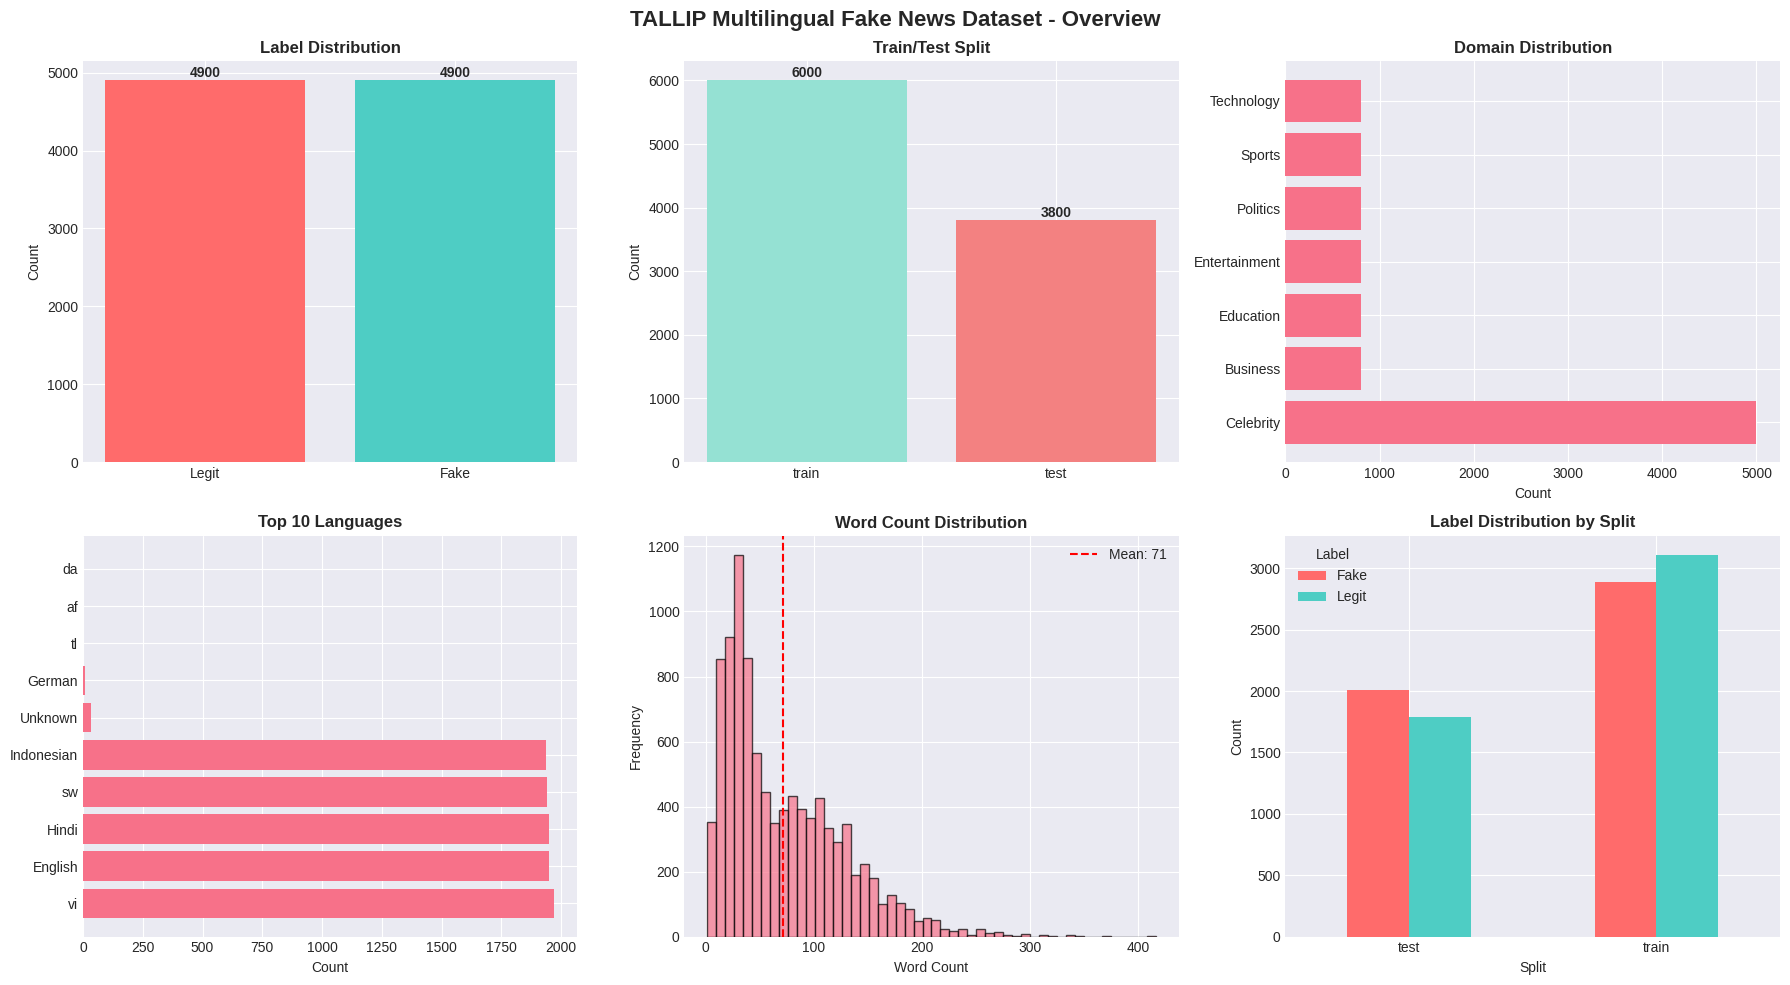

In [11]:
# Create a comprehensive visualization dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('TALLIP Multilingual Fake News Dataset - Overview', fontsize=16, fontweight='bold')

# 1. Label distribution
label_counts = df_all['Label'].value_counts()
axes[0, 0].bar(label_counts.index, label_counts.values, color=['#ff6b6b', '#4ecdc4'])
axes[0, 0].set_title('Label Distribution', fontweight='bold')
axes[0, 0].set_ylabel('Count')
for i, v in enumerate(label_counts.values):
    axes[0, 0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# 2. Split distribution
split_counts = df_all['split'].value_counts()
axes[0, 1].bar(split_counts.index, split_counts.values, color=['#95e1d3', '#f38181'])
axes[0, 1].set_title('Train/Test Split', fontweight='bold')
axes[0, 1].set_ylabel('Count')
for i, v in enumerate(split_counts.values):
    axes[0, 1].text(i, v + 50, str(v), ha='center', fontweight='bold')

# 3. Domain distribution
domain_counts = df_all['Domain'].value_counts()
axes[0, 2].barh(range(len(domain_counts)), domain_counts.values)
axes[0, 2].set_yticks(range(len(domain_counts)))
axes[0, 2].set_yticklabels(domain_counts.index)
axes[0, 2].set_title('Domain Distribution', fontweight='bold')
axes[0, 2].set_xlabel('Count')

# 4. Top languages
top_languages = df_all['language_name'].value_counts().head(10)
axes[1, 0].barh(range(len(top_languages)), top_languages.values)
axes[1, 0].set_yticks(range(len(top_languages)))
axes[1, 0].set_yticklabels(top_languages.index)
axes[1, 0].set_title('Top 10 Languages', fontweight='bold')
axes[1, 0].set_xlabel('Count')

# 5. Word count distribution
axes[1, 1].hist(df_all['word_count'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Word Count Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(df_all['word_count'].mean(), color='red', linestyle='--', label=f"Mean: {df_all['word_count'].mean():.0f}")
axes[1, 1].legend()

# 6. Label by Split
label_by_split = pd.crosstab(df_all['split'], df_all['Label'])
label_by_split.plot(kind='bar', ax=axes[1, 2], color=['#ff6b6b', '#4ecdc4'])
axes[1, 2].set_title('Label Distribution by Split', fontweight='bold')
axes[1, 2].set_xlabel('Split')
axes[1, 2].set_ylabel('Count')
axes[1, 2].legend(title='Label')
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

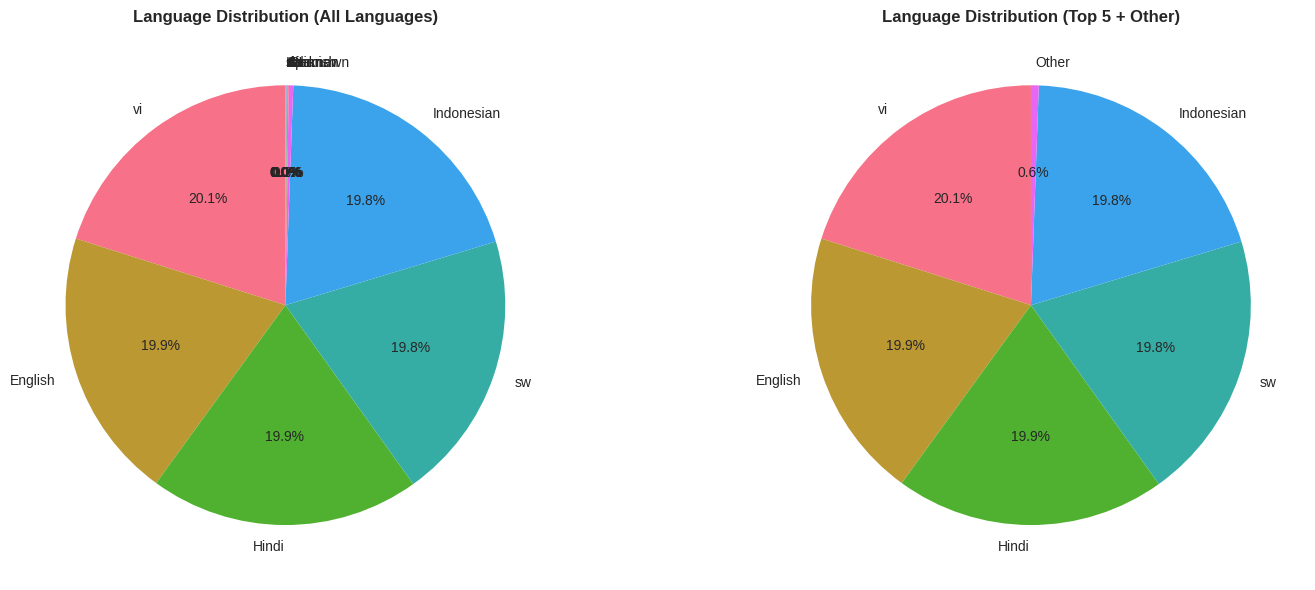

In [12]:
# Language distribution pie chart
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# All languages
lang_counts = df_all['language_name'].value_counts()
axes[0].pie(lang_counts.values, labels=lang_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Language Distribution (All Languages)', fontweight='bold', fontsize=12)

# Top 5 languages
top5_langs = lang_counts.head(5)
other_count = lang_counts[5:].sum()
if other_count > 0:
    plot_data = pd.concat([top5_langs, pd.Series({'Other': other_count})])
else:
    plot_data = top5_langs

axes[1].pie(plot_data.values, labels=plot_data.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Language Distribution (Top 5 + Other)', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

## 8. Cross-tabulations and Detailed Analysis

In [13]:
# Language by Label
print("\n" + "="*60)
print("LANGUAGE BY LABEL")
print("="*60)
lang_by_label = pd.crosstab(df_all['language_name'], df_all['Label'], margins=True)
print(lang_by_label)

# Calculate percentages
print("\nPercentages (row-wise):")
print(pd.crosstab(df_all['language_name'], df_all['Label'], normalize='index') * 100)


LANGUAGE BY LABEL
Label          Fake  Legit   All
language_name                   
English         976    974  1950
German            6      4    10
Hindi           976    972  1948
Indonesian      966    970  1936
Italian           0      2     2
Spanish           2      0     2
Unknown          22     10    32
af                2      0     2
da                0      2     2
mr                0      2     2
sv                0      2     2
sw              974    966  1940
tl                2      0     2
vi              974    996  1970
All            4900   4900  9800

Percentages (row-wise):
Label                Fake       Legit
language_name                        
English         50.051282   49.948718
German          60.000000   40.000000
Hindi           50.102669   49.897331
Indonesian      49.896694   50.103306
Italian          0.000000  100.000000
Spanish        100.000000    0.000000
Unknown         68.750000   31.250000
af             100.000000    0.000000
da             


DOMAIN BY LABEL
Label          Fake  Legit   All
Domain                          
Business        400    400   800
Celebrity      2500   2500  5000
Education       400    400   800
Entertainment   400    400   800
Politics        400    400   800
Sports          400    400   800
Technology      400    400   800
All            4900   4900  9800


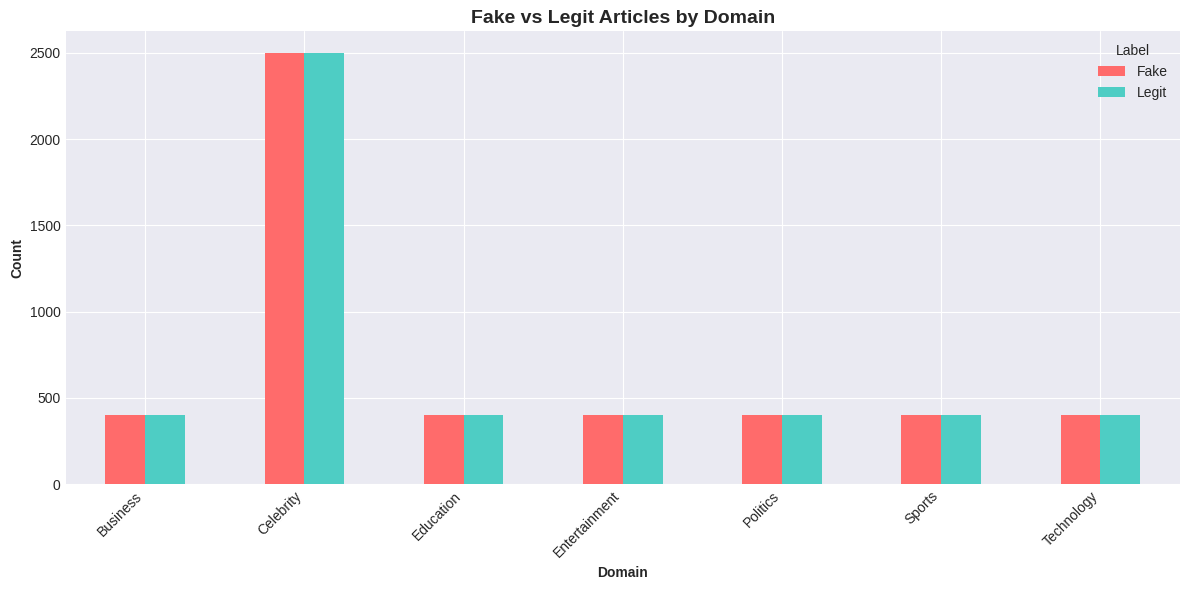

In [14]:
# Domain by Label
print("\n" + "="*60)
print("DOMAIN BY LABEL")
print("="*60)
domain_by_label = pd.crosstab(df_all['Domain'], df_all['Label'], margins=True)
print(domain_by_label)

# Visualize
domain_by_label_no_margin = pd.crosstab(df_all['Domain'], df_all['Label'])
domain_by_label_no_margin.plot(kind='bar', figsize=(12, 6), color=['#ff6b6b', '#4ecdc4'])
plt.title('Fake vs Legit Articles by Domain', fontweight='bold', fontsize=14)
plt.xlabel('Domain', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title='Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


TOP LANGUAGES BY DOMAIN
language_name  English  Hindi  Indonesian   sw    vi
Domain                                              
Business           158    158         158  158   158
Celebrity          992    990         978  984  1012
Education          160    160         160  160   160
Entertainment      160    160         160  160   160
Politics           160    160         160  158   160
Sports             160    160         160  160   160
Technology         160    160         160  160   160


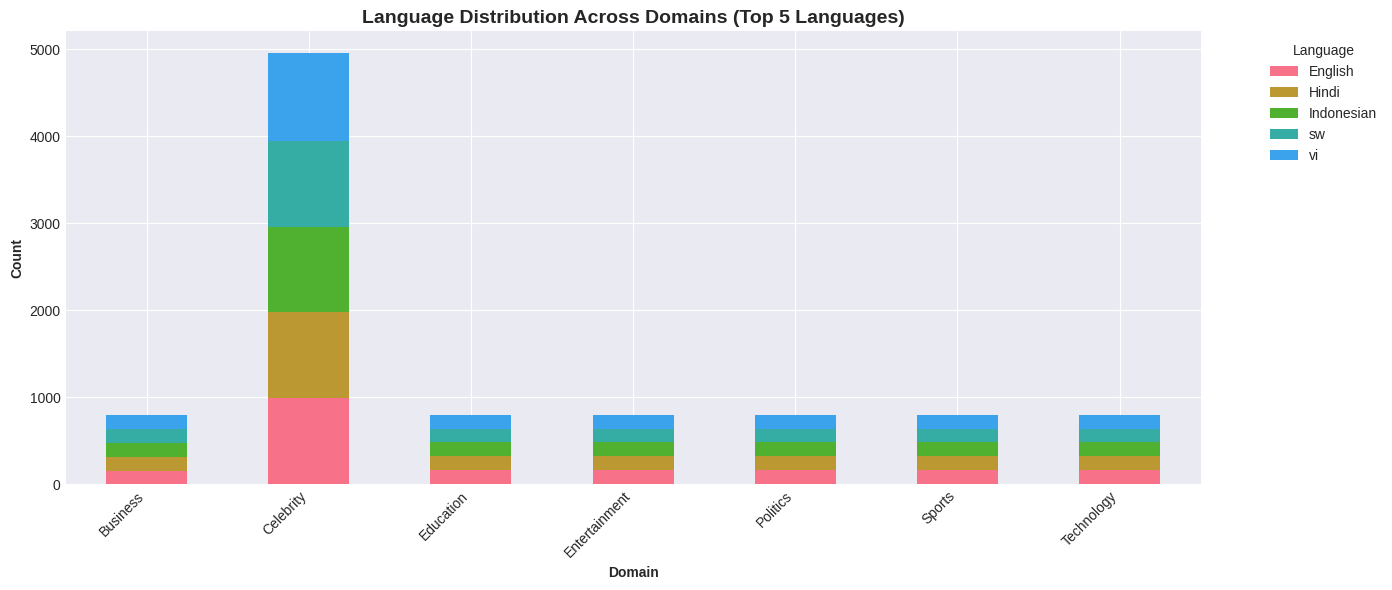

In [15]:
# Language by Domain
print("\n" + "="*60)
print("TOP LANGUAGES BY DOMAIN")
print("="*60)

# Get top 5 languages
top_langs = df_all['language_name'].value_counts().head(5).index
df_top_langs = df_all[df_all['language_name'].isin(top_langs)]

lang_by_domain = pd.crosstab(df_top_langs['Domain'], df_top_langs['language_name'])
print(lang_by_domain)

# Visualize
lang_by_domain.plot(kind='bar', figsize=(14, 6), stacked=True)
plt.title('Language Distribution Across Domains (Top 5 Languages)', fontweight='bold', fontsize=14)
plt.xlabel('Domain', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 8.1 Balance Analysis: Fake vs Legit by Domain and Language

Let's check if the dataset is balanced between Fake and Legit articles across different domains and languages.

In [19]:
# Balance Analysis by Domain
print("\n" + "="*80)
print("BALANCE ANALYSIS: FAKE vs LEGIT BY DOMAIN")
print("="*80)

domain_label_counts = pd.crosstab(df_all['Domain'], df_all['Label'])
domain_label_counts['Total'] = domain_label_counts.sum(axis=1)
domain_label_counts['Fake_Pct'] = (domain_label_counts['Fake'] / domain_label_counts['Total'] * 100).round(2)
domain_label_counts['Legit_Pct'] = (domain_label_counts['Legit'] / domain_label_counts['Total'] * 100).round(2)
domain_label_counts['Balance_Ratio'] = (domain_label_counts['Fake'] / domain_label_counts['Legit']).round(3)

print("\nDomain-wise Distribution:")
print(domain_label_counts.sort_values('Total', ascending=False))

print("\n" + "-"*80)
print("Balance Interpretation:")
print("  • Balance_Ratio = 1.0: Perfect balance (50% Fake, 50% Legit)")
print("  • Balance_Ratio > 1.0: More Fake articles")
print("  • Balance_Ratio < 1.0: More Legit articles")
print("-"*80)

# Check if any domain is severely imbalanced (threshold: 30% or 70%)
imbalanced_domains = domain_label_counts[
    (domain_label_counts['Fake_Pct'] < 30) | (domain_label_counts['Fake_Pct'] > 70)
]

if len(imbalanced_domains) > 0:
    print("\n⚠️  IMBALANCED DOMAINS (< 30% or > 70% fake):")
    for domain in imbalanced_domains.index:
        fake_pct = imbalanced_domains.loc[domain, 'Fake_Pct']
        print(f"  • {domain}: {fake_pct:.1f}% Fake")
else:
    print("\n✅ All domains are reasonably balanced (30-70% fake)!")


BALANCE ANALYSIS: FAKE vs LEGIT BY DOMAIN

Domain-wise Distribution:
Label          Fake  Legit  Total  Fake_Pct  Legit_Pct  Balance_Ratio
Domain                                                               
Celebrity      2500   2500   5000      50.0       50.0            1.0
Business        400    400    800      50.0       50.0            1.0
Education       400    400    800      50.0       50.0            1.0
Entertainment   400    400    800      50.0       50.0            1.0
Politics        400    400    800      50.0       50.0            1.0
Sports          400    400    800      50.0       50.0            1.0
Technology      400    400    800      50.0       50.0            1.0

--------------------------------------------------------------------------------
Balance Interpretation:
  • Balance_Ratio = 1.0: Perfect balance (50% Fake, 50% Legit)
  • Balance_Ratio > 1.0: More Fake articles
  • Balance_Ratio < 1.0: More Legit articles
------------------------------------------

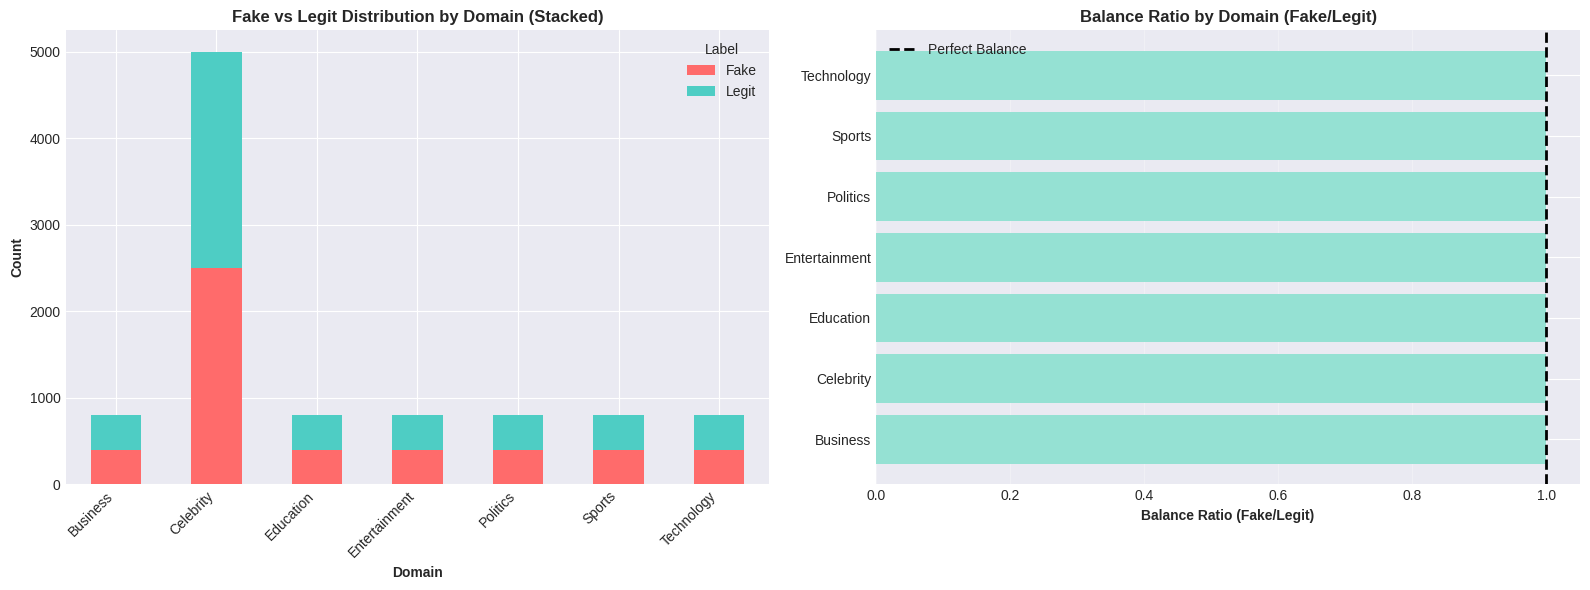

In [20]:
# Visualize Domain Balance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
domain_label_counts[['Fake', 'Legit']].plot(kind='bar', stacked=True, ax=axes[0], 
                                             color=['#ff6b6b', '#4ecdc4'])
axes[0].set_title('Fake vs Legit Distribution by Domain (Stacked)', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Domain', fontweight='bold')
axes[0].set_ylabel('Count', fontweight='bold')
axes[0].legend(title='Label')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Balance ratio chart
balance_data = domain_label_counts.sort_values('Balance_Ratio')
colors = ['#ff6b6b' if x > 1.2 else '#4ecdc4' if x < 0.8 else '#95e1d3' 
          for x in balance_data['Balance_Ratio']]
axes[1].barh(range(len(balance_data)), balance_data['Balance_Ratio'], color=colors)
axes[1].axvline(x=1.0, color='black', linestyle='--', linewidth=2, label='Perfect Balance')
axes[1].set_yticks(range(len(balance_data)))
axes[1].set_yticklabels(balance_data.index)
axes[1].set_title('Balance Ratio by Domain (Fake/Legit)', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Balance Ratio (Fake/Legit)', fontweight='bold')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [21]:
# Balance Analysis by Language
print("\n" + "="*80)
print("BALANCE ANALYSIS: FAKE vs LEGIT BY LANGUAGE")
print("="*80)

lang_label_counts = pd.crosstab(df_all['language_name'], df_all['Label'])
lang_label_counts['Total'] = lang_label_counts.sum(axis=1)
lang_label_counts['Fake_Pct'] = (lang_label_counts['Fake'] / lang_label_counts['Total'] * 100).round(2)
lang_label_counts['Legit_Pct'] = (lang_label_counts['Legit'] / lang_label_counts['Total'] * 100).round(2)
lang_label_counts['Balance_Ratio'] = (lang_label_counts['Fake'] / lang_label_counts['Legit']).round(3)

print("\nLanguage-wise Distribution (sorted by total count):")
print(lang_label_counts.sort_values('Total', ascending=False))

print("\n" + "-"*80)
print("Balance Interpretation:")
print("  • Balance_Ratio = 1.0: Perfect balance (50% Fake, 50% Legit)")
print("  • Balance_Ratio > 1.0: More Fake articles")
print("  • Balance_Ratio < 1.0: More Legit articles")
print("-"*80)

# Check if any language is severely imbalanced (threshold: 30% or 70%)
imbalanced_langs = lang_label_counts[
    (lang_label_counts['Fake_Pct'] < 30) | (lang_label_counts['Fake_Pct'] > 70)
]

if len(imbalanced_langs) > 0:
    print("\n⚠️  IMBALANCED LANGUAGES (< 30% or > 70% fake):")
    for lang in imbalanced_langs.index:
        fake_pct = imbalanced_langs.loc[lang, 'Fake_Pct']
        total = imbalanced_langs.loc[lang, 'Total']
        print(f"  • {lang}: {fake_pct:.1f}% Fake (n={total})")
else:
    print("\n✅ All languages are reasonably balanced (30-70% fake)!")


BALANCE ANALYSIS: FAKE vs LEGIT BY LANGUAGE

Language-wise Distribution (sorted by total count):
Label          Fake  Legit  Total  Fake_Pct  Legit_Pct  Balance_Ratio
language_name                                                        
vi              974    996   1970     49.44      50.56          0.978
English         976    974   1950     50.05      49.95          1.002
Hindi           976    972   1948     50.10      49.90          1.004
sw              974    966   1940     50.21      49.79          1.008
Indonesian      966    970   1936     49.90      50.10          0.996
Unknown          22     10     32     68.75      31.25          2.200
German            6      4     10     60.00      40.00          1.500
Italian           0      2      2      0.00     100.00          0.000
Spanish           2      0      2    100.00       0.00            inf
af                2      0      2    100.00       0.00            inf
mr                0      2      2      0.00     100.00        

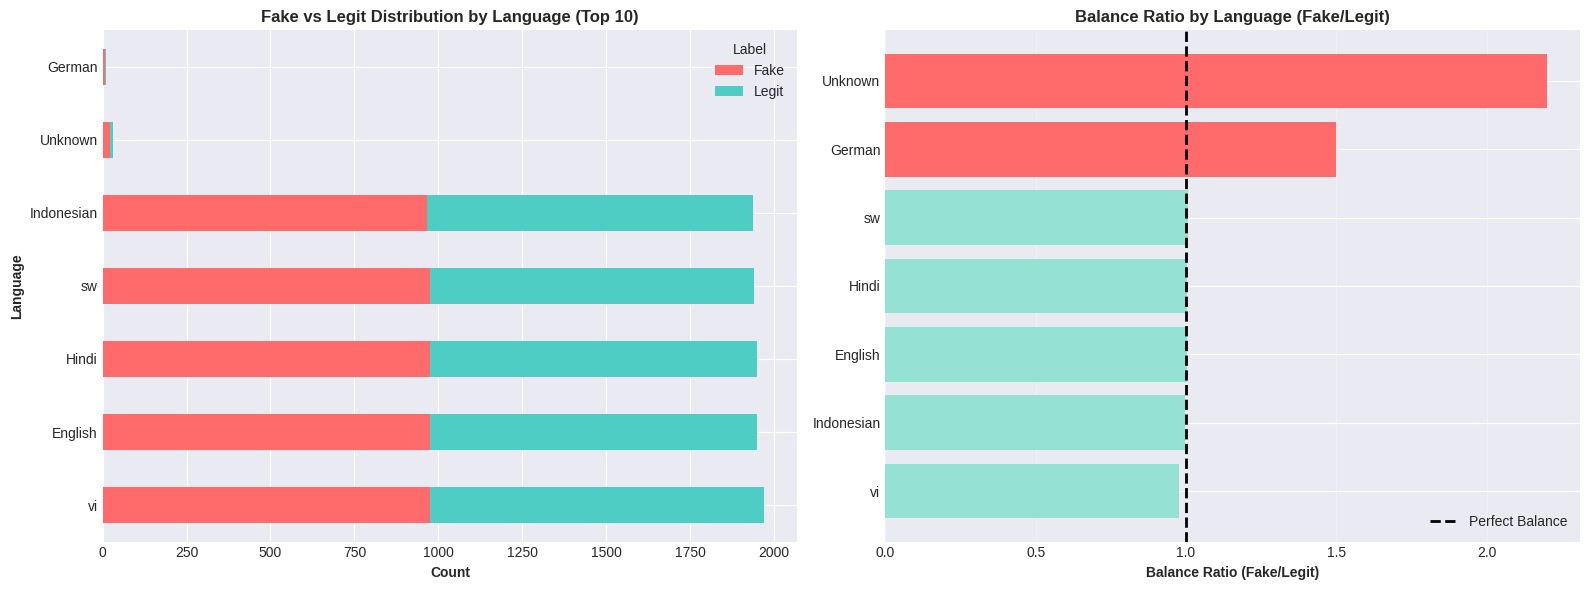

In [22]:
# Visualize Language Balance (Top Languages)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Get top languages (with sufficient data)
top_lang_counts = lang_label_counts[lang_label_counts['Total'] >= 10].sort_values('Total', ascending=False)

# Stacked bar chart
top_lang_counts[['Fake', 'Legit']].head(10).plot(kind='barh', stacked=True, ax=axes[0], 
                                                   color=['#ff6b6b', '#4ecdc4'])
axes[0].set_title('Fake vs Legit Distribution by Language (Top 10)', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Count', fontweight='bold')
axes[0].set_ylabel('Language', fontweight='bold')
axes[0].legend(title='Label')

# Balance ratio chart
balance_data_lang = top_lang_counts.sort_values('Balance_Ratio').head(10)
colors = ['#ff6b6b' if x > 1.2 else '#4ecdc4' if x < 0.8 else '#95e1d3' 
          for x in balance_data_lang['Balance_Ratio']]
axes[1].barh(range(len(balance_data_lang)), balance_data_lang['Balance_Ratio'], color=colors)
axes[1].axvline(x=1.0, color='black', linestyle='--', linewidth=2, label='Perfect Balance')
axes[1].set_yticks(range(len(balance_data_lang)))
axes[1].set_yticklabels(balance_data_lang.index)
axes[1].set_title('Balance Ratio by Language (Fake/Legit)', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Balance Ratio (Fake/Legit)', fontweight='bold')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
# Combined Analysis: Language + Domain Balance
print("\n" + "="*80)
print("COMBINED ANALYSIS: BALANCE BY LANGUAGE AND DOMAIN")
print("="*80)

# Focus on top 5 languages
top5_languages = df_all['language_name'].value_counts().head(5).index

for lang in top5_languages:
    print(f"\n{'='*80}")
    print(f"Language: {lang}")
    print(f"{'='*80}")
    
    lang_data = df_all[df_all['language_name'] == lang]
    
    if len(lang_data) > 0:
        lang_domain_label = pd.crosstab(lang_data['Domain'], lang_data['Label'])
        lang_domain_label['Total'] = lang_domain_label.sum(axis=1)
        lang_domain_label['Fake_Pct'] = (lang_domain_label['Fake'] / lang_domain_label['Total'] * 100).round(1)
        lang_domain_label['Balance_Ratio'] = (lang_domain_label['Fake'] / lang_domain_label['Legit']).round(3)
        
        print(lang_domain_label.sort_values('Total', ascending=False))
        
        # Check for imbalances
        imbalanced = lang_domain_label[
            (lang_domain_label['Fake_Pct'] < 30) | (lang_domain_label['Fake_Pct'] > 70)
        ]
        if len(imbalanced) > 0:
            print(f"\n  ⚠️  Imbalanced domains in {lang}:")
            for domain in imbalanced.index:
                fake_pct = imbalanced.loc[domain, 'Fake_Pct']
                print(f"    • {domain}: {fake_pct:.1f}% Fake")
        else:
            print(f"\n  ✅ All domains in {lang} are balanced!")


COMBINED ANALYSIS: BALANCE BY LANGUAGE AND DOMAIN

Language: vi
Label          Fake  Legit  Total  Fake_Pct  Balance_Ratio
Domain                                                    
Celebrity       496    516   1012      49.0          0.961
Education        80     80    160      50.0          1.000
Entertainment    80     80    160      50.0          1.000
Sports           80     80    160      50.0          1.000
Politics         80     80    160      50.0          1.000
Technology       80     80    160      50.0          1.000
Business         78     80    158      49.4          0.975

  ✅ All domains in vi are balanced!

Language: English
Label          Fake  Legit  Total  Fake_Pct  Balance_Ratio
Domain                                                    
Celebrity       498    494    992      50.2          1.008
Education        80     80    160      50.0          1.000
Entertainment    80     80    160      50.0          1.000
Sports           80     80    160      50.0          

In [ ]:
# Create a comprehensive heatmap showing balance across all combinations
print("\n" + "="*80)
print("HEATMAP: FAKE PERCENTAGE BY LANGUAGE AND DOMAIN")
print("="*80)

# Create pivot table showing fake percentage
pivot_fake_pct = df_all.pivot_table(
    values='Label',
    index='Domain',
    columns='language_name',
    aggfunc=lambda x: (x == 'Fake').sum() / len(x) * 100
)

# Filter to show only main languages (those with > 100 articles)
main_langs = df_all['language_name'].value_counts()[df_all['language_name'].value_counts() > 100].index
pivot_fake_pct_filtered = pivot_fake_pct[main_langs]

# Create heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_fake_pct_filtered, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            center=50, vmin=0, vmax=100, cbar_kws={'label': 'Fake %'})
plt.title('Percentage of Fake Articles by Domain and Language', fontweight='bold', fontsize=14, pad=20)
plt.xlabel('Language', fontweight='bold', fontsize=12)
plt.ylabel('Domain', fontweight='bold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print("  • Green: More Legit articles (< 40% fake)")
print("  • Yellow: Balanced (40-60% fake)")
print("  • Red: More Fake articles (> 60% fake)")

In [ ]:
# Summary Statistics on Balance
print("\n" + "="*80)
print("BALANCE SUMMARY STATISTICS")
print("="*80)

print("\n📊 Overall Dataset Balance:")
overall_fake_pct = (df_all['Label'] == 'Fake').sum() / len(df_all) * 100
print(f"  Fake: {overall_fake_pct:.2f}%")
print(f"  Legit: {100 - overall_fake_pct:.2f}%")
print(f"  Balance Ratio: {((df_all['Label'] == 'Fake').sum() / (df_all['Label'] == 'Legit').sum()):.3f}")

print("\n📁 Domain Balance Statistics:")
print(f"  Most balanced domain: {domain_label_counts.iloc[(domain_label_counts['Balance_Ratio'] - 1).abs().argsort()[0]].name}")
print(f"  Most imbalanced domain: {domain_label_counts.iloc[(domain_label_counts['Balance_Ratio'] - 1).abs().argsort()[-1]].name}")
print(f"  Average fake percentage across domains: {domain_label_counts['Fake_Pct'].mean():.2f}%")
print(f"  Std dev of fake percentage: {domain_label_counts['Fake_Pct'].std():.2f}%")

print("\n🌍 Language Balance Statistics (for languages with >10 articles):")
significant_langs = lang_label_counts[lang_label_counts['Total'] > 10]
if len(significant_langs) > 0:
    most_balanced_idx = (significant_langs['Balance_Ratio'] - 1).abs().argsort()[0]
    most_imbalanced_idx = (significant_langs['Balance_Ratio'] - 1).abs().argsort()[-1]
    
    print(f"  Most balanced language: {significant_langs.index[most_balanced_idx]}")
    print(f"  Most imbalanced language: {significant_langs.index[most_imbalanced_idx]}")
    print(f"  Average fake percentage across languages: {significant_langs['Fake_Pct'].mean():.2f}%")
    print(f"  Std dev of fake percentage: {significant_langs['Fake_Pct'].std():.2f}%")

print("\n✅ Balance Quality Assessment:")
# Count how many domains/languages are well-balanced (40-60% fake)
balanced_domains = len(domain_label_counts[(domain_label_counts['Fake_Pct'] >= 40) & (domain_label_counts['Fake_Pct'] <= 60)])
total_domains = len(domain_label_counts)
print(f"  Well-balanced domains (40-60% fake): {balanced_domains}/{total_domains} ({balanced_domains/total_domains*100:.1f}%)")

balanced_langs = len(significant_langs[(significant_langs['Fake_Pct'] >= 40) & (significant_langs['Fake_Pct'] <= 60)])
total_significant_langs = len(significant_langs)
print(f"  Well-balanced languages (40-60% fake): {balanced_langs}/{total_significant_langs} ({balanced_langs/total_significant_langs*100:.1f}%)")

print("\n" + "="*80)

## 9. Sample Articles by Language

In [16]:
# Show sample articles for each language
print("\n" + "="*60)
print("SAMPLE ARTICLES BY LANGUAGE")
print("="*60)

for lang in df_all['language_name'].value_counts().head(5).index:
    print(f"\n{'='*60}")
    print(f"Language: {lang}")
    print(f"{'='*60}")
    
    sample = df_all[df_all['language_name'] == lang].iloc[0]
    print(f"Topic: {sample['Topic']}")
    print(f"Domain: {sample['Domain']}")
    print(f"Label: {sample['Label']}")
    print(f"Split: {sample['split']}")
    print(f"\nNews (first 300 chars):\n{str(sample['News'])[:300]}...")


SAMPLE ARTICLES BY LANGUAGE

Language: vi
Topic: Tiêu chuẩn khí thải tự động của California
Domain: Business
Label: Legit
Split: train

News (first 300 chars):
Thiết lập đối mặt với Trump "Cơ quan không khí sạch của California đã bỏ phiếu vào thứ Sáu để thúc đẩy các tiêu chuẩn khí thải nghiêm ngặt hơn đối với ô tô và xe tải thiết lập một cuộc chiến pháp lý tiềm năng với chính quyền của Trump về kế hoạch giảm khí đốt hành tinh. bởi Ủy ban Tài nguyên Hàng kh...

Language: English
Topic: California Upholds Auto Emissions Standards
Domain: Business
Label: Legit
Split: train

News (first 300 chars):
Setting Up Face-Off With Trump  "California's clean-air agency voted on Friday to push ahead with stricter emissions standards for cars and trucks  setting up a potential legal battle with the Trump administration over the state's plan to reduce planet-warming gases. The vote  by the California Air ...

Language: Hindi
Topic: कैलिफ़ोर्निया यूफोल्ड्स ऑटो उत्सर्जन मानक
Domain: Business
Label: Leg

## 10. Summary Report

In [17]:
# Create comprehensive summary
print("\n" + "#"*60)
print("#" + " "*15 + "DATASET SUMMARY REPORT" + " "*15 + "#")
print("#"*60)

print(f"\n📊 OVERALL STATISTICS")
print(f"{'='*60}")
print(f"Total Articles: {len(df_all):,}")
print(f"Training Articles: {len(train_df):,} ({len(train_df)/len(df_all)*100:.1f}%)")
print(f"Test Articles: {len(test_df):,} ({len(test_df)/len(df_all)*100:.1f}%)")

print(f"\n📝 LABEL DISTRIBUTION")
print(f"{'='*60}")
for label, count in df_all['Label'].value_counts().items():
    pct = count / len(df_all) * 100
    print(f"{label}: {count:,} ({pct:.1f}%)")

print(f"\n🌍 LANGUAGE STATISTICS")
print(f"{'='*60}")
print(f"Number of Languages: {df_all['language'].nunique()}")
print(f"\nTop Languages:")
for i, (lang, count) in enumerate(df_all['language_name'].value_counts().head(10).items(), 1):
    pct = count / len(df_all) * 100
    print(f"{i:2d}. {lang:25s}: {count:6,} articles ({pct:5.1f}%)")

print(f"\n📁 DOMAIN/CATEGORY STATISTICS")
print(f"{'='*60}")
print(f"Number of Domains: {df_all['Domain'].nunique()}")
print(f"\nDomain Distribution:")
for domain, count in df_all['Domain'].value_counts().items():
    pct = count / len(df_all) * 100
    print(f"{domain:15s}: {count:6,} articles ({pct:5.1f}%)")

print(f"\n📏 TEXT LENGTH STATISTICS")
print(f"{'='*60}")
print(f"Average Article Length: {df_all['text_length'].mean():.0f} characters")
print(f"Average Word Count: {df_all['word_count'].mean():.0f} words")
print(f"Median Word Count: {df_all['word_count'].median():.0f} words")
print(f"Min Word Count: {df_all['word_count'].min():.0f} words")
print(f"Max Word Count: {df_all['word_count'].max():.0f} words")

print(f"\n{'#'*60}")
print(f"# End of Report" + " "*42 + "#")
print(f"{'#'*60}")


############################################################
#               DATASET SUMMARY REPORT               #
############################################################

📊 OVERALL STATISTICS
Total Articles: 9,800
Training Articles: 6,000 (61.2%)
Test Articles: 3,800 (38.8%)

📝 LABEL DISTRIBUTION
Legit: 4,900 (50.0%)
Fake: 4,900 (50.0%)

🌍 LANGUAGE STATISTICS
Number of Languages: 14

Top Languages:
 1. vi                       :  1,970 articles ( 20.1%)
 2. English                  :  1,950 articles ( 19.9%)
 3. Hindi                    :  1,948 articles ( 19.9%)
 4. sw                       :  1,940 articles ( 19.8%)
 5. Indonesian               :  1,936 articles ( 19.8%)
 6. Unknown                  :     32 articles (  0.3%)
 7. German                   :     10 articles (  0.1%)
 8. tl                       :      2 articles (  0.0%)
 9. af                       :      2 articles (  0.0%)
10. da                       :      2 articles (  0.0%)

📁 DOMAIN/CATEGORY STATISTICS


## 11. Export Summary Statistics

In [18]:
# Save the enhanced dataframe with language information
output_file = '/home/mateja/Documents/IJS/current/Fairer_Models/data/processed/multilingual_dataset_analyzed.csv'
df_all.to_csv(output_file, index=False)
print(f"Enhanced dataset saved to: {output_file}")

# Create summary statistics file
summary_stats = {
    'total_articles': len(df_all),
    'train_articles': len(train_df),
    'test_articles': len(test_df),
    'num_languages': df_all['language'].nunique(),
    'num_domains': df_all['Domain'].nunique(),
    'fake_articles': (df_all['Label'] == 'Fake').sum(),
    'legit_articles': (df_all['Label'] == 'Legit').sum(),
    'avg_word_count': df_all['word_count'].mean(),
    'median_word_count': df_all['word_count'].median()
}

summary_df = pd.DataFrame([summary_stats])
summary_file = '/home/mateja/Documents/IJS/current/Fairer_Models/data/processed/multilingual_dataset_summary.csv'
summary_df.to_csv(summary_file, index=False)
print(f"Summary statistics saved to: {summary_file}")

print("\n✅ Analysis complete!")

Enhanced dataset saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/multilingual_dataset_analyzed.csv
Summary statistics saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/multilingual_dataset_summary.csv

✅ Analysis complete!


## 12. Feature Extraction for Multilingual Celebrity Domain

In this section, we'll prepare the data for stylistic feature extraction and synthetic data generation experiments:
- Filter to top 5 languages and Celebrity domain only
- Analyze current balance
- Create artificial imbalance scenarios
- Extract stylistic features for each language

### 12.1 Filter Data: Top 5 Languages + Celebrity Domain

In [24]:
# Get top 5 languages
top5_languages = df_all['language_name'].value_counts().head(5).index.tolist()

print("Top 5 Languages:")
for i, lang in enumerate(top5_languages, 1):
    count = (df_all['language_name'] == lang).sum()
    print(f"  {i}. {lang}: {count:,} articles")

# Filter for Celebrity domain and top 5 languages
df_celebrity = df_all[
    (df_all['Domain'] == 'Celebrity') & 
    (df_all['language_name'].isin(top5_languages))
].copy()

print(f"\n{'='*80}")
print("FILTERED DATASET: Celebrity Domain + Top 5 Languages")
print(f"{'='*80}")
print(f"Total articles: {len(df_celebrity):,}")
print(f"\nBreakdown by language:")
print(df_celebrity['language_name'].value_counts())
print(f"\nBreakdown by label:")
print(df_celebrity['Label'].value_counts())
print(f"\nBreakdown by split:")
print(df_celebrity['split'].value_counts())

Top 5 Languages:
  1. vi: 1,970 articles
  2. English: 1,950 articles
  3. Hindi: 1,948 articles
  4. sw: 1,940 articles
  5. Indonesian: 1,936 articles

FILTERED DATASET: Celebrity Domain + Top 5 Languages
Total articles: 4,956

Breakdown by language:
language_name
vi            1012
English        992
Hindi          990
sw             984
Indonesian     978
Name: count, dtype: int64

Breakdown by label:
Label
Legit    2480
Fake     2476
Name: count, dtype: int64

Breakdown by split:
split
train    2964
test     1992
Name: count, dtype: int64



CURRENT BALANCE IN CELEBRITY DOMAIN BY LANGUAGE

Celebrity Domain Balance by Language:
Label          Fake  Legit  Total  Fake_Pct  Legit_Pct  Balance_Ratio
language_name                                                        
vi              496    516   1012     49.01      50.99          0.961
English         498    494    992     50.20      49.80          1.008
Hindi           498    492    990     50.30      49.70          1.012
sw              496    488    984     50.41      49.59          1.016
Indonesian      488    490    978     49.90      50.10          0.996


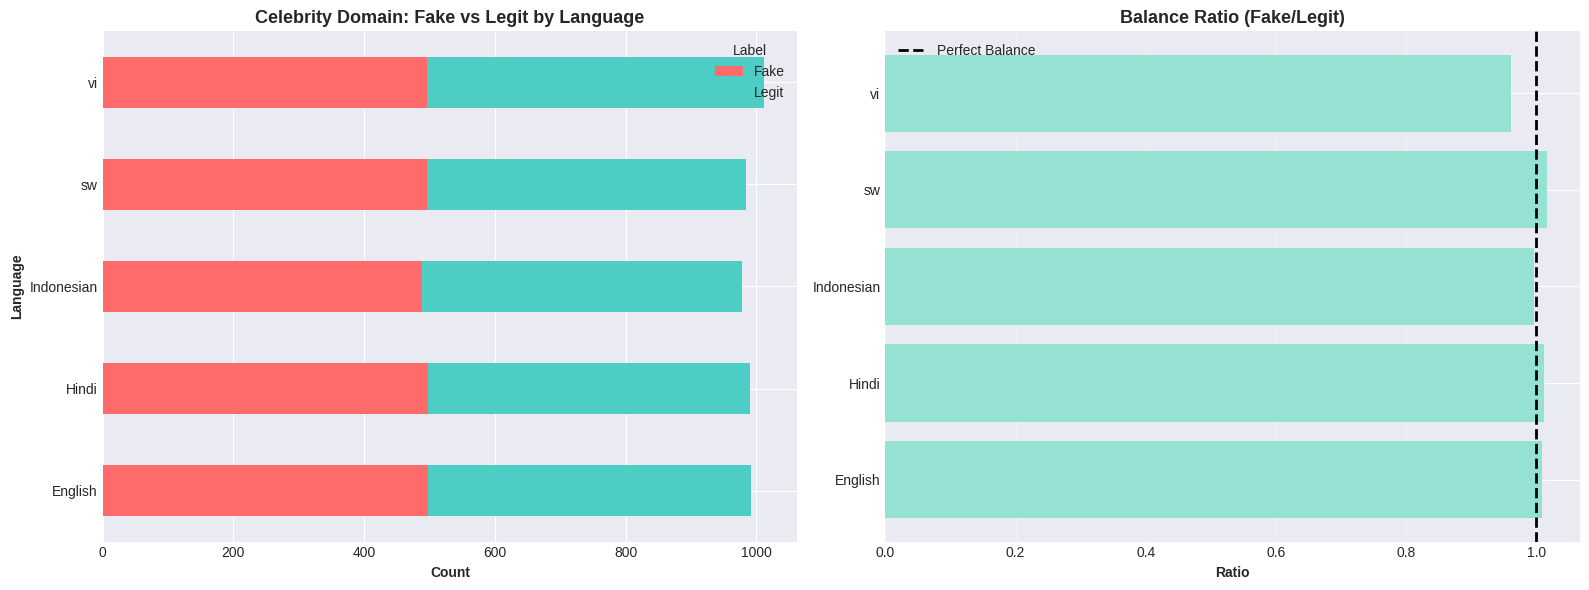

In [25]:
# Detailed balance analysis for Celebrity domain by language
print(f"\n{'='*80}")
print("CURRENT BALANCE IN CELEBRITY DOMAIN BY LANGUAGE")
print(f"{'='*80}")

celeb_balance = pd.crosstab(df_celebrity['language_name'], df_celebrity['Label'])
celeb_balance['Total'] = celeb_balance.sum(axis=1)
celeb_balance['Fake_Pct'] = (celeb_balance['Fake'] / celeb_balance['Total'] * 100).round(2)
celeb_balance['Legit_Pct'] = (celeb_balance['Legit'] / celeb_balance['Total'] * 100).round(2)
celeb_balance['Balance_Ratio'] = (celeb_balance['Fake'] / celeb_balance['Legit']).round(3)

print("\nCelebrity Domain Balance by Language:")
print(celeb_balance.sort_values('Total', ascending=False))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
celeb_balance[['Fake', 'Legit']].plot(kind='barh', stacked=True, ax=axes[0], 
                                       color=['#ff6b6b', '#4ecdc4'])
axes[0].set_title('Celebrity Domain: Fake vs Legit by Language', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Count', fontweight='bold')
axes[0].set_ylabel('Language', fontweight='bold')
axes[0].legend(title='Label')

# Balance ratio
colors = ['#ff6b6b' if x > 1.2 else '#4ecdc4' if x < 0.8 else '#95e1d3' 
          for x in celeb_balance['Balance_Ratio']]
axes[1].barh(range(len(celeb_balance)), celeb_balance['Balance_Ratio'], color=colors)
axes[1].axvline(x=1.0, color='black', linestyle='--', linewidth=2, label='Perfect Balance')
axes[1].set_yticks(range(len(celeb_balance)))
axes[1].set_yticklabels(celeb_balance.index)
axes[1].set_title('Balance Ratio (Fake/Legit)', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Ratio', fontweight='bold')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### 12.2 Create Imbalance Scenarios

**Important**: We will **ONLY** remove **Fake** articles to create imbalance, never Legit articles.

**Rationale**: Generating synthetic "legitimate" news would be a logical fallacy. By definition:
- Fake news CAN be fabricated (that's what makes it fake)
- Legitimate news CANNOT be fabricated (it must be based on real events/facts)

This approach ensures our methodology is logically sound and ethically appropriate.

In [26]:
# Define imbalance scenarios
# IMPORTANT: We ONLY remove Fake articles, never Legit articles
# Reason: Generating synthetic "real/legit" news would be a logical fallacy - 
# fabricated articles cannot be legitimate news by definition.

def create_imbalance_scenario(df, language, reduction_pct, scenario_name):
    """
    Create an imbalanced dataset by removing a percentage of FAKE articles.
    We never remove Legit articles since we cannot generate synthetic legitimate news.
    
    Parameters:
    - df: DataFrame with the data
    - language: Language to create imbalance for
    - reduction_pct: Percentage of FAKE articles to remove (e.g., 0.5 for 50%)
    - scenario_name: Name for the scenario
    """
    df_scenario = df.copy()
    
    # Get FAKE articles to potentially remove
    mask = (df_scenario['language_name'] == language) & (df_scenario['Label'] == 'Fake')
    fake_articles = df_scenario[mask]
    
    # Calculate how many to remove
    n_to_remove = int(len(fake_articles) * reduction_pct)
    
    # Randomly select articles to remove
    np.random.seed(42)  # For reproducibility
    indices_to_remove = np.random.choice(fake_articles.index, size=n_to_remove, replace=False)
    
    # Remove the selected articles
    df_scenario = df_scenario.drop(indices_to_remove)
    
    # Calculate new balance
    lang_data = df_scenario[df_scenario['language_name'] == language]
    new_balance = pd.crosstab(lang_data['Label'], columns='count')
    
    return df_scenario, indices_to_remove, new_balance

# Display current state for planning
print("="*80)
print("IMBALANCE SCENARIO PLANNING - FAKE ARTICLE REMOVAL ONLY")
print("="*80)
print("\n⚠️  IMPORTANT: We will ONLY remove Fake articles to create imbalance.")
print("   Reason: Synthetic 'legitimate' news articles would be a logical fallacy.\n")

print("Current state (Celebrity domain, Top 5 languages):")
for lang in top5_languages:
    lang_data = df_celebrity[df_celebrity['language_name'] == lang]
    fake_count = (lang_data['Label'] == 'Fake').sum()
    legit_count = (lang_data['Label'] == 'Legit').sum()
    total = len(lang_data)
    fake_pct = fake_count / total * 100 if total > 0 else 0
    print(f"\n{lang}:")
    print(f"  Fake: {fake_count} ({fake_pct:.1f}%)")
    print(f"  Legit: {legit_count} ({100-fake_pct:.1f}%)")
    print(f"  Total: {total}")
    
    # Show removal scenarios for Fake articles ONLY
    print(f"  → Fake article removal scenarios:")
    print(f"    - 30% removal: Remove {int(fake_count * 0.3)} → {fake_count - int(fake_count * 0.3)} Fake remaining")
    print(f"                   New ratio: {fake_count - int(fake_count * 0.3)}:{legit_count} (Fake:Legit)")
    print(f"                   Fake %: {(fake_count - int(fake_count * 0.3))/(fake_count - int(fake_count * 0.3) + legit_count)*100:.1f}%")
    print(f"    - 50% removal: Remove {int(fake_count * 0.5)} → {fake_count - int(fake_count * 0.5)} Fake remaining")
    print(f"                   New ratio: {fake_count - int(fake_count * 0.5)}:{legit_count} (Fake:Legit)")
    print(f"                   Fake %: {(fake_count - int(fake_count * 0.5))/(fake_count - int(fake_count * 0.5) + legit_count)*100:.1f}%")

IMBALANCE SCENARIO PLANNING - FAKE ARTICLE REMOVAL ONLY

⚠️  IMPORTANT: We will ONLY remove Fake articles to create imbalance.
   Reason: Synthetic 'legitimate' news articles would be a logical fallacy.

Current state (Celebrity domain, Top 5 languages):

vi:
  Fake: 496 (49.0%)
  Legit: 516 (51.0%)
  Total: 1012
  → Fake article removal scenarios:
    - 30% removal: Remove 148 → 348 Fake remaining
                   New ratio: 348:516 (Fake:Legit)
                   Fake %: 40.3%
    - 50% removal: Remove 248 → 248 Fake remaining
                   New ratio: 248:516 (Fake:Legit)
                   Fake %: 32.5%

English:
  Fake: 498 (50.2%)
  Legit: 494 (49.8%)
  Total: 992
  → Fake article removal scenarios:
    - 30% removal: Remove 149 → 349 Fake remaining
                   New ratio: 349:494 (Fake:Legit)
                   Fake %: 41.4%
    - 50% removal: Remove 249 → 249 Fake remaining
                   New ratio: 249:494 (Fake:Legit)
                   Fake %: 33.5%

Hindi:
 

### 12.3 Imbalance Impact Analysis

Before deciding on the final imbalance scenario, let's test three different imbalance levels (20%, 30%, 40% fake removal) and evaluate classification performance to determine which level provides the best opportunity for demonstrating synthetic data generation benefits.

In [27]:
# Create imbalanced datasets for each language and removal percentage
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
import warnings
warnings.filterwarnings('ignore')

# Define removal percentages to test
removal_percentages = [0.20, 0.30, 0.40]

print("="*80)
print("CREATING IMBALANCED DATASETS FOR CLASSIFICATION EXPERIMENTS")
print("="*80)

# Store all scenarios
imbalance_scenarios = {}

for lang in top5_languages:
    print(f"\n{lang}:")
    lang_data = df_celebrity[df_celebrity['language_name'] == lang].copy()
    
    # Store original counts
    original_fake = (lang_data['Label'] == 'Fake').sum()
    original_legit = (lang_data['Label'] == 'Legit').sum()
    print(f"  Original: {original_fake} Fake, {original_legit} Legit")
    
    imbalance_scenarios[lang] = {
        'original': lang_data,
        'original_fake': original_fake,
        'original_legit': original_legit,
        'scenarios': {}
    }
    
    for removal_pct in removal_percentages:
        # Get fake articles
        fake_mask = lang_data['Label'] == 'Fake'
        fake_articles = lang_data[fake_mask]
        
        # Calculate how many to remove
        n_to_remove = int(len(fake_articles) * removal_pct)
        
        # Randomly select articles to remove
        np.random.seed(42)  # For reproducibility
        indices_to_remove = np.random.choice(fake_articles.index, size=n_to_remove, replace=False)
        
        # Create imbalanced dataset
        imbalanced_data = lang_data.drop(indices_to_remove)
        
        # Store removed articles
        removed_articles = lang_data.loc[indices_to_remove]
        
        # Calculate new balance
        new_fake = (imbalanced_data['Label'] == 'Fake').sum()
        new_legit = (imbalanced_data['Label'] == 'Legit').sum()
        fake_pct = new_fake / (new_fake + new_legit) * 100
        
        print(f"  {int(removal_pct*100)}% removal: {new_fake} Fake, {new_legit} Legit ({fake_pct:.1f}% fake)")
        
        # Store scenario
        imbalance_scenarios[lang]['scenarios'][removal_pct] = {
            'data': imbalanced_data,
            'removed': removed_articles,
            'n_removed': n_to_remove,
            'new_fake': new_fake,
            'new_legit': new_legit,
            'fake_pct': fake_pct
        }

print("\n✅ Imbalanced datasets created for all languages and scenarios!")

CREATING IMBALANCED DATASETS FOR CLASSIFICATION EXPERIMENTS

vi:
  Original: 496 Fake, 516 Legit
  20% removal: 397 Fake, 516 Legit (43.5% fake)
  30% removal: 348 Fake, 516 Legit (40.3% fake)
  40% removal: 298 Fake, 516 Legit (36.6% fake)

English:
  Original: 498 Fake, 494 Legit
  20% removal: 399 Fake, 494 Legit (44.7% fake)
  30% removal: 349 Fake, 494 Legit (41.4% fake)
  40% removal: 299 Fake, 494 Legit (37.7% fake)

Hindi:
  Original: 498 Fake, 492 Legit
  20% removal: 399 Fake, 492 Legit (44.8% fake)
  30% removal: 349 Fake, 492 Legit (41.5% fake)
  40% removal: 299 Fake, 492 Legit (37.8% fake)

sw:
  Original: 496 Fake, 488 Legit
  20% removal: 397 Fake, 488 Legit (44.9% fake)
  30% removal: 348 Fake, 488 Legit (41.6% fake)
  40% removal: 298 Fake, 488 Legit (37.9% fake)

Indonesian:
  Original: 488 Fake, 490 Legit
  20% removal: 391 Fake, 490 Legit (44.4% fake)
  30% removal: 342 Fake, 490 Legit (41.1% fake)
  40% removal: 293 Fake, 490 Legit (37.4% fake)

✅ Imbalanced datas

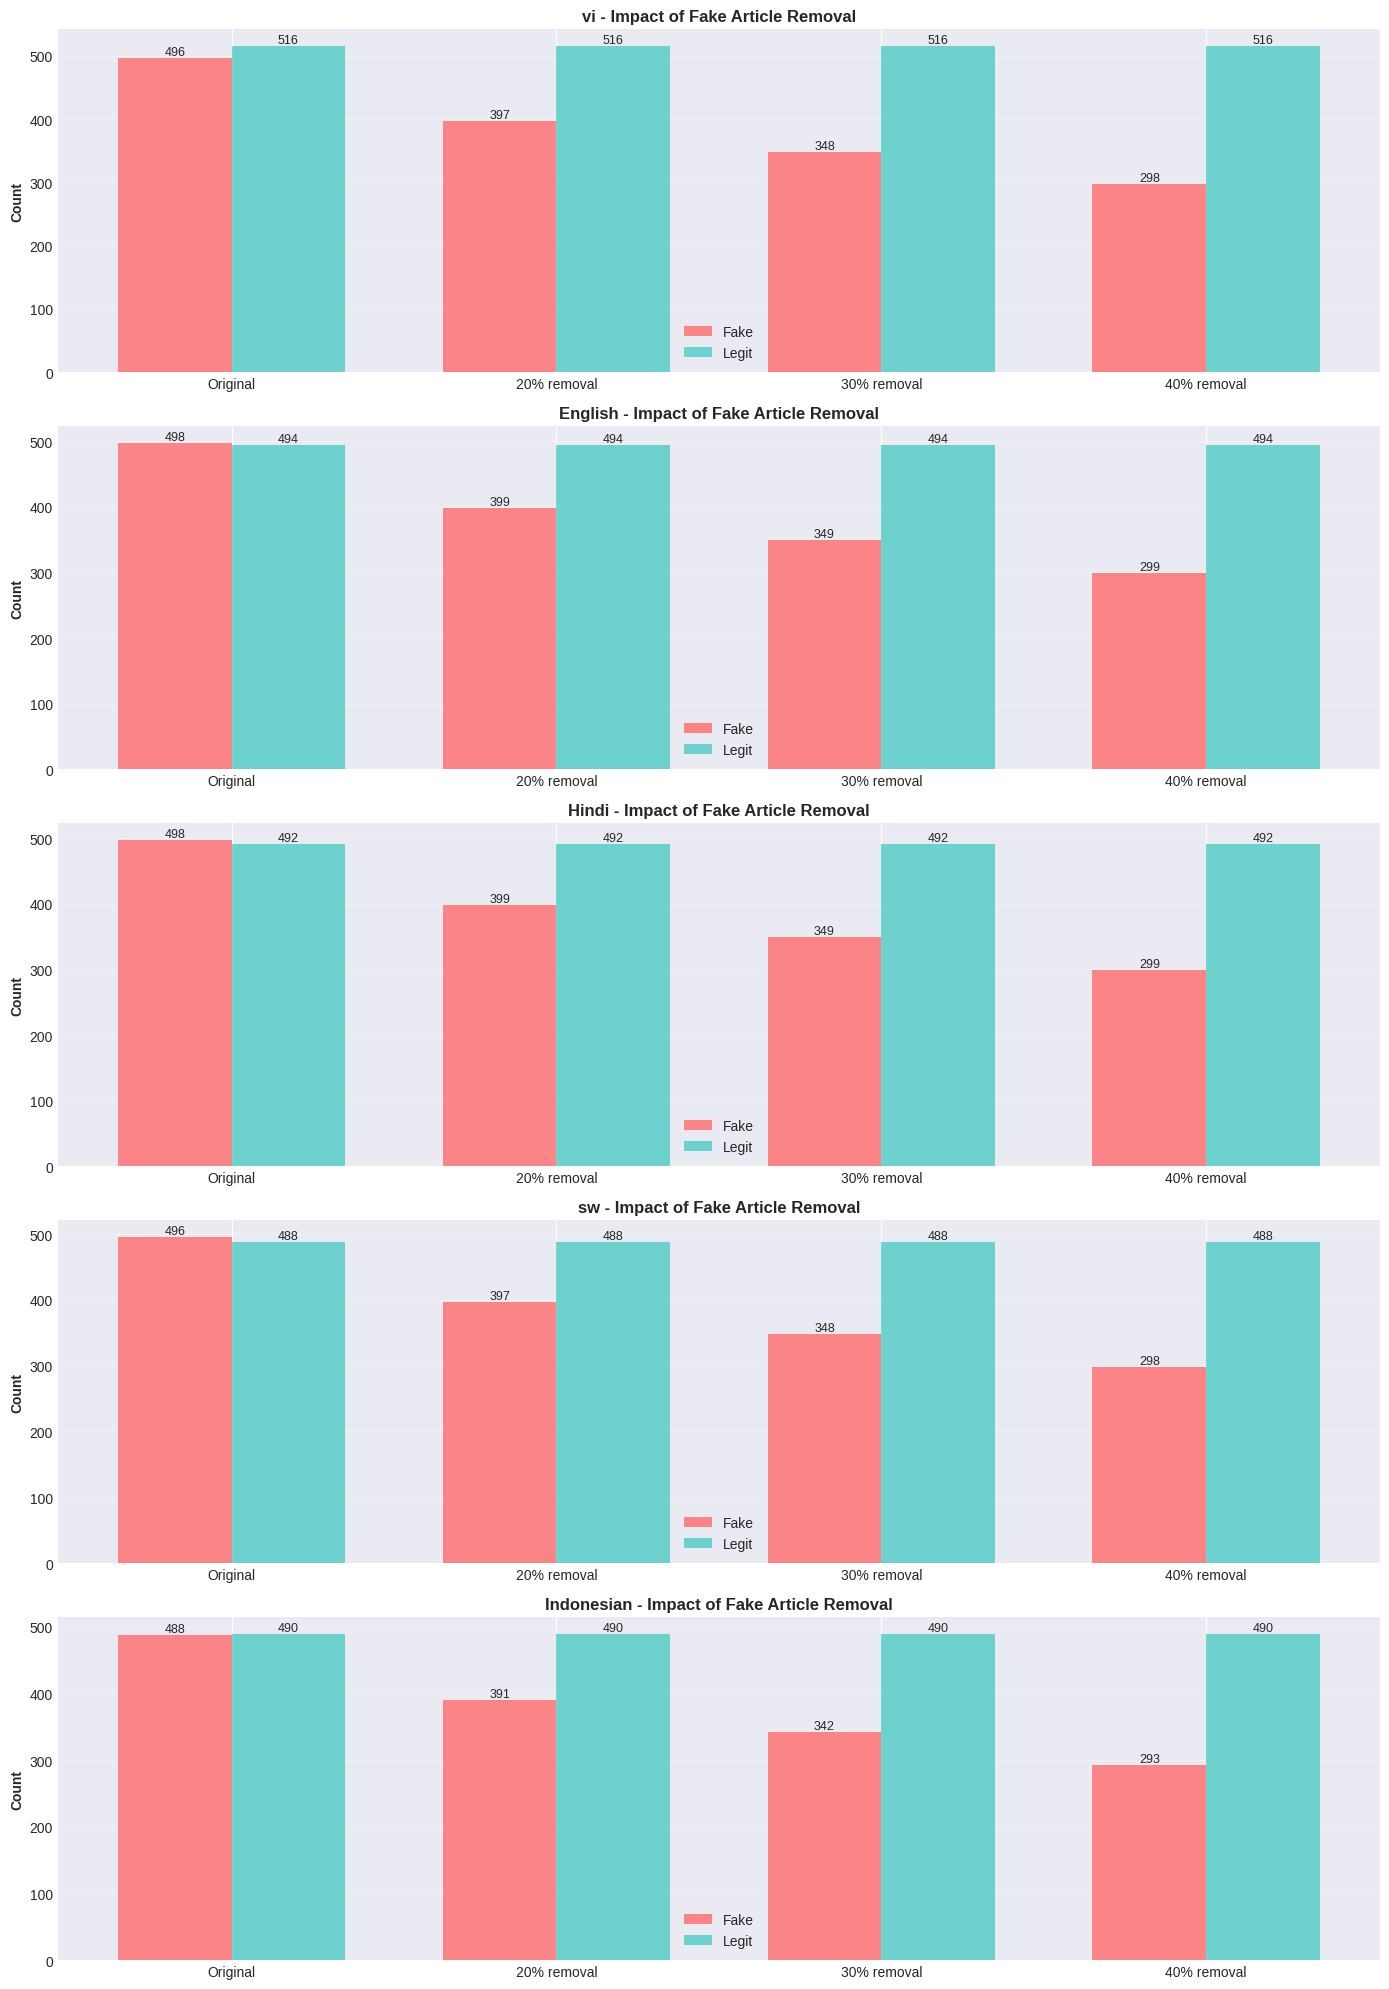

In [28]:
# Visualize the imbalance scenarios
fig, axes = plt.subplots(len(top5_languages), 1, figsize=(14, 4*len(top5_languages)))

if len(top5_languages) == 1:
    axes = [axes]

for idx, lang in enumerate(top5_languages):
    ax = axes[idx]
    
    # Prepare data for plotting
    scenarios_data = imbalance_scenarios[lang]['scenarios']
    removal_labels = ['Original', '20% removal', '30% removal', '40% removal']
    
    fake_counts = [imbalance_scenarios[lang]['original_fake']]
    legit_counts = [imbalance_scenarios[lang]['original_legit']]
    
    for removal_pct in removal_percentages:
        fake_counts.append(scenarios_data[removal_pct]['new_fake'])
        legit_counts.append(scenarios_data[removal_pct]['new_legit'])
    
    x = np.arange(len(removal_labels))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, fake_counts, width, label='Fake', color='#ff6b6b', alpha=0.8)
    bars2 = ax.bar(x + width/2, legit_counts, width, label='Legit', color='#4ecdc4', alpha=0.8)
    
    ax.set_ylabel('Count', fontweight='bold')
    ax.set_title(f'{lang} - Impact of Fake Article Removal', fontweight='bold', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(removal_labels)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)
    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

#### Classification Experiments

Now let's run classification experiments on each imbalance scenario and measure F1 scores.

In [29]:
# Function to train and evaluate classifier
def train_and_evaluate(train_data, test_data, scenario_name, language):
    """
    Train a classifier and evaluate on test set.
    Returns F1 scores and other metrics.
    """
    # Prepare train data
    X_train = train_data['News'].fillna('')
    y_train = train_data['Label']
    
    # Prepare test data
    X_test = test_data['News'].fillna('')
    y_test = test_data['Label']
    
    # Check if we have enough samples
    if len(X_train) < 10 or len(X_test) < 10:
        return None
    
    # Create TF-IDF features (language-agnostic, character n-grams work for all languages)
    vectorizer = TfidfVectorizer(
        max_features=5000,
        ngram_range=(1, 3),
        analyzer='char',  # Character n-grams work across languages
        min_df=2
    )
    
    try:
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)
        
        # Train Logistic Regression classifier
        classifier = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
        classifier.fit(X_train_vec, y_train)
        
        # Predict
        y_pred = classifier.predict(X_test_vec)
        
        # Calculate metrics
        f1_fake = f1_score(y_test, y_pred, pos_label='Fake')
        f1_legit = f1_score(y_test, y_pred, pos_label='Legit')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        f1_weighted = f1_score(y_test, y_pred, average='weighted')
        
        return {
            'scenario': scenario_name,
            'language': language,
            'f1_fake': f1_fake,
            'f1_legit': f1_legit,
            'f1_macro': f1_macro,
            'f1_weighted': f1_weighted,
            'train_size': len(X_train),
            'test_size': len(X_test),
            'train_fake_count': (y_train == 'Fake').sum(),
            'train_legit_count': (y_train == 'Legit').sum()
        }
    except Exception as e:
        print(f"    Error in {scenario_name}: {e}")
        return None

print("="*80)
print("RUNNING CLASSIFICATION EXPERIMENTS")
print("="*80)
print("\nThis will train a classifier on each imbalanced scenario and evaluate on test set.")
print("Using character-level TF-IDF (works across all languages) + Logistic Regression\n")

RUNNING CLASSIFICATION EXPERIMENTS

This will train a classifier on each imbalanced scenario and evaluate on test set.
Using character-level TF-IDF (works across all languages) + Logistic Regression



In [30]:
# Run experiments for all languages and scenarios
all_results = []

for lang in top5_languages:
    print(f"\n{'='*80}")
    print(f"Language: {lang}")
    print(f"{'='*80}")
    
    # Get train and test splits from the original data
    lang_data_full = imbalance_scenarios[lang]['original']
    train_data_original = lang_data_full[lang_data_full['split'] == 'train']
    test_data = lang_data_full[lang_data_full['split'] == 'test']
    
    print(f"Test set: {len(test_data)} articles ({(test_data['Label']=='Fake').sum()} Fake, {(test_data['Label']=='Legit').sum()} Legit)")
    
    # Baseline: Original balanced data
    print(f"\n  Baseline (Original)...")
    result = train_and_evaluate(train_data_original, test_data, 'Baseline', lang)
    if result:
        all_results.append(result)
        print(f"    F1 Macro: {result['f1_macro']:.4f}, F1 Fake: {result['f1_fake']:.4f}, F1 Legit: {result['f1_legit']:.4f}")
    
    # Test each imbalance scenario
    for removal_pct in removal_percentages:
        scenario_name = f"{int(removal_pct*100)}% Removal"
        print(f"\n  {scenario_name}...")
        
        # Get imbalanced data
        imbalanced_data = imbalance_scenarios[lang]['scenarios'][removal_pct]['data']
        train_data_imbalanced = imbalanced_data[imbalanced_data['split'] == 'train']
        
        result = train_and_evaluate(train_data_imbalanced, test_data, scenario_name, lang)
        if result:
            all_results.append(result)
            print(f"    Train: {result['train_fake_count']} Fake, {result['train_legit_count']} Legit")
            print(f"    F1 Macro: {result['f1_macro']:.4f}, F1 Fake: {result['f1_fake']:.4f}, F1 Legit: {result['f1_legit']:.4f}")
            
            # Calculate drop from baseline
            baseline_f1 = [r['f1_macro'] for r in all_results if r['language'] == lang and r['scenario'] == 'Baseline']
            if baseline_f1:
                drop = result['f1_macro'] - baseline_f1[0]
                print(f"    Change from baseline: {drop:+.4f} ({drop/baseline_f1[0]*100:+.1f}%)")

print("\n" + "="*80)
print("✅ All experiments completed!")
print("="*80)


Language: vi
Test set: 408 articles (210 Fake, 198 Legit)

  Baseline (Original)...
    F1 Macro: 0.6112, F1 Fake: 0.6359, F1 Legit: 0.5864

  20% Removal...
    Train: 231 Fake, 318 Legit
    F1 Macro: 0.6225, F1 Fake: 0.6280, F1 Legit: 0.6169
    Change from baseline: +0.0113 (+1.8%)

  30% Removal...
    Train: 204 Fake, 318 Legit
    F1 Macro: 0.5833, F1 Fake: 0.5813, F1 Legit: 0.5854
    Change from baseline: -0.0278 (-4.6%)

  40% Removal...
    Train: 173 Fake, 318 Legit
    F1 Macro: 0.5778, F1 Fake: 0.5612, F1 Legit: 0.5943
    Change from baseline: -0.0334 (-5.5%)

Language: English
Test set: 398 articles (212 Fake, 186 Legit)

  Baseline (Original)...
    F1 Macro: 0.6274, F1 Fake: 0.6442, F1 Legit: 0.6105

  20% Removal...
    Train: 229 Fake, 308 Legit
    F1 Macro: 0.6279, F1 Fake: 0.6373, F1 Legit: 0.6186
    Change from baseline: +0.0005 (+0.1%)

  30% Removal...
    Train: 198 Fake, 308 Legit
    F1 Macro: 0.6531, F1 Fake: 0.6462, F1 Legit: 0.6601
    Change from base

In [31]:
# Create results DataFrame for easier analysis
results_df = pd.DataFrame(all_results)

print("\n" + "="*80)
print("RESULTS SUMMARY")
print("="*80)

# Display results table
print("\nDetailed Results:")
display(results_df[['language', 'scenario', 'train_fake_count', 'train_legit_count', 
                     'f1_fake', 'f1_legit', 'f1_macro', 'f1_weighted']].round(4))

# Summary by language
print("\n" + "-"*80)
print("Performance Drop by Imbalance Level:")
print("-"*80)

for lang in top5_languages:
    lang_results = results_df[results_df['language'] == lang]
    baseline_f1 = lang_results[lang_results['scenario'] == 'Baseline']['f1_macro'].values
    
    if len(baseline_f1) > 0:
        baseline_f1 = baseline_f1[0]
        print(f"\n{lang}:")
        print(f"  Baseline F1 Macro: {baseline_f1:.4f}")
        
        for removal_pct in removal_percentages:
            scenario_name = f"{int(removal_pct*100)}% Removal"
            scenario_results = lang_results[lang_results['scenario'] == scenario_name]
            
            if len(scenario_results) > 0:
                f1 = scenario_results['f1_macro'].values[0]
                drop = f1 - baseline_f1
                drop_pct = drop / baseline_f1 * 100
                print(f"  {scenario_name}: {f1:.4f} (change: {drop:+.4f}, {drop_pct:+.1f}%)")


RESULTS SUMMARY

Detailed Results:


,language,scenario,train_fake_count,train_legit_count,f1_fake,f1_legit,f1_macro,f1_weighted
0,vi,Baseline,286,318,0.6359,0.5864,0.6112,0.6119
1,vi,20% Removal,231,318,0.6280,0.6169,0.6225,0.6226
2,vi,30% Removal,204,318,0.5813,0.5854,0.5833,0.5833
3,vi,40% Removal,173,318,0.5612,0.5943,0.5778,0.5773
4,English,Baseline,286,308,0.6442,0.6105,0.6274,0.6285
5,English,20% Removal,229,308,0.6373,0.6186,0.6279,0.6285
6,English,30% Removal,198,308,0.6462,0.6601,0.6531,0.6527
7,English,40% Removal,169,308,0.6458,0.6699,0.6579,0.6571
8,Hindi,Baseline,288,306,0.6635,0.6162,0.6399,0.6413
9,Hindi,20% Removal,230,306,0.6400,0.6327,0.6363,0.6365



--------------------------------------------------------------------------------
Performance Drop by Imbalance Level:
--------------------------------------------------------------------------------

vi:
  Baseline F1 Macro: 0.6112
  20% Removal: 0.6225 (change: +0.0113, +1.8%)
  30% Removal: 0.5833 (change: -0.0278, -4.6%)
  40% Removal: 0.5778 (change: -0.0334, -5.5%)

English:
  Baseline F1 Macro: 0.6274
  20% Removal: 0.6279 (change: +0.0005, +0.1%)
  30% Removal: 0.6531 (change: +0.0257, +4.1%)
  40% Removal: 0.6579 (change: +0.0305, +4.9%)

Hindi:
  Baseline F1 Macro: 0.6399
  20% Removal: 0.6363 (change: -0.0035, -0.6%)
  30% Removal: 0.6207 (change: -0.0191, -3.0%)
  40% Removal: 0.5958 (change: -0.0441, -6.9%)

sw:
  Baseline F1 Macro: 0.5959
  20% Removal: 0.6009 (change: +0.0050, +0.8%)
  30% Removal: 0.5808 (change: -0.0151, -2.5%)
  40% Removal: 0.5653 (change: -0.0307, -5.1%)

Indonesian:
  Baseline F1 Macro: 0.6032
  20% Removal: 0.5989 (change: -0.0043, -0.7%)
  30% Re

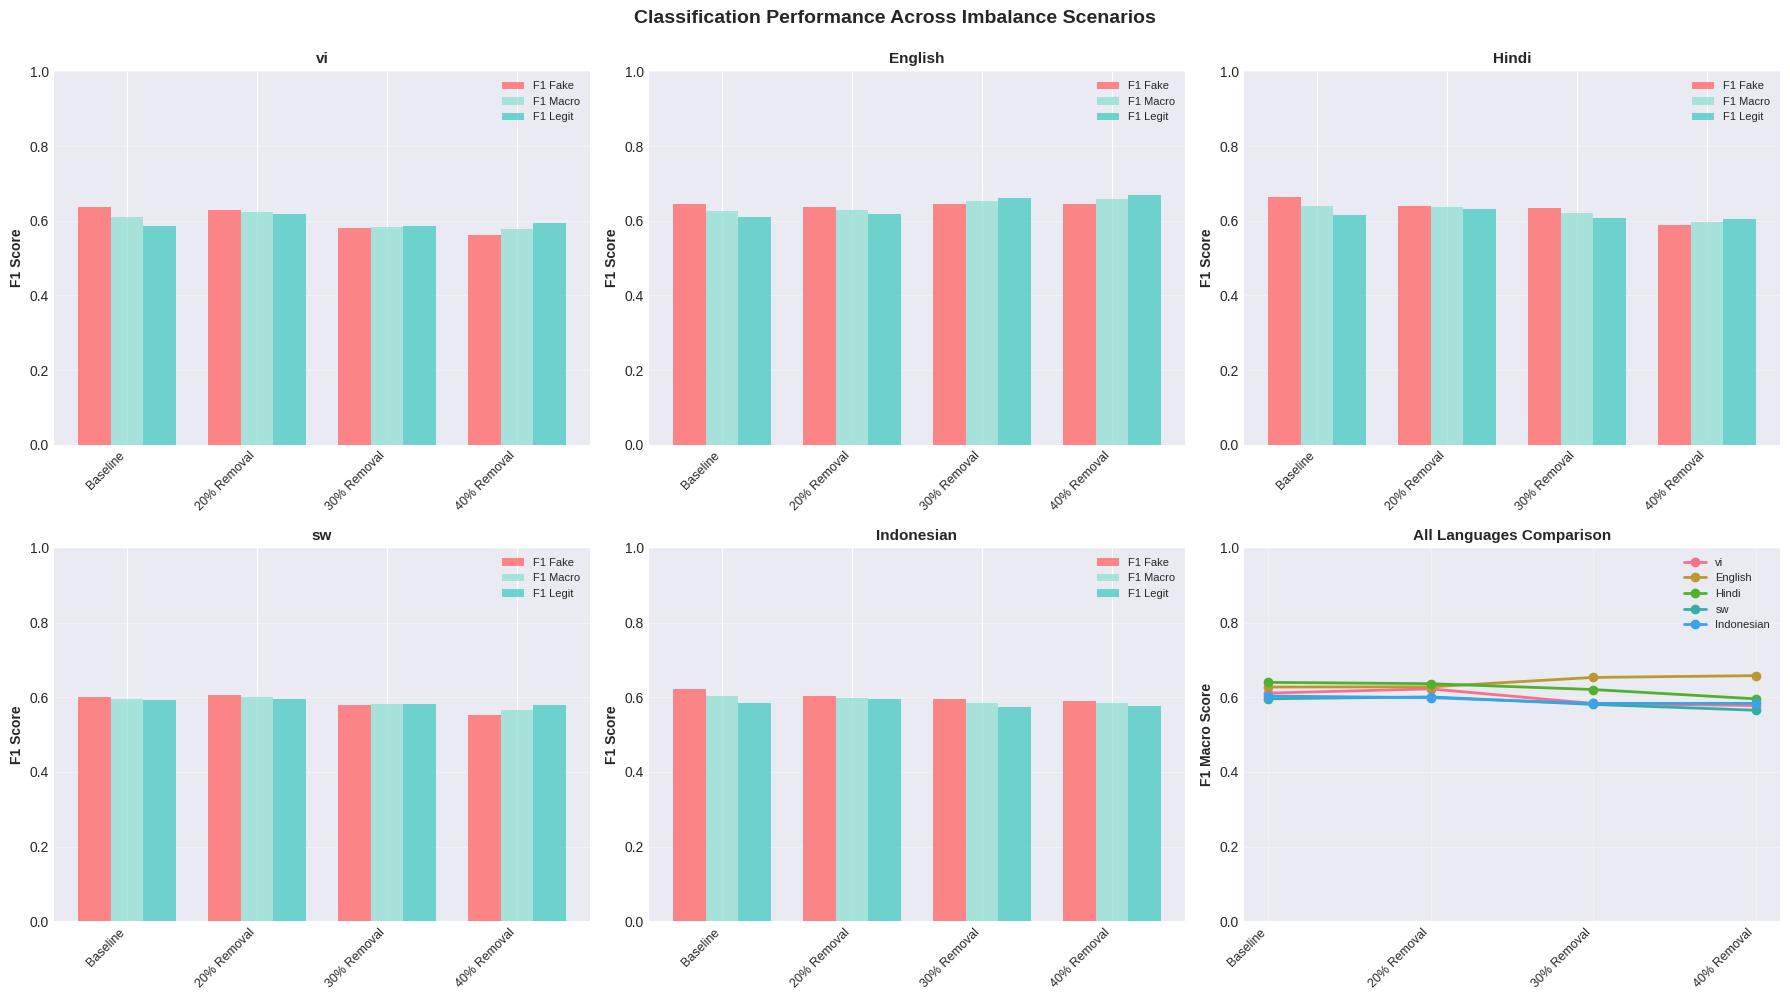

In [32]:
# Visualize F1 scores across imbalance scenarios
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot 1-5: Each language
for idx, lang in enumerate(top5_languages):
    ax = axes[idx]
    lang_results = results_df[results_df['language'] == lang]
    
    scenarios = ['Baseline', '20% Removal', '30% Removal', '40% Removal']
    f1_macros = []
    f1_fakes = []
    f1_legits = []
    
    for scenario in scenarios:
        scenario_data = lang_results[lang_results['scenario'] == scenario]
        if len(scenario_data) > 0:
            f1_macros.append(scenario_data['f1_macro'].values[0])
            f1_fakes.append(scenario_data['f1_fake'].values[0])
            f1_legits.append(scenario_data['f1_legit'].values[0])
        else:
            f1_macros.append(0)
            f1_fakes.append(0)
            f1_legits.append(0)
    
    x = np.arange(len(scenarios))
    width = 0.25
    
    ax.bar(x - width, f1_fakes, width, label='F1 Fake', color='#ff6b6b', alpha=0.8)
    ax.bar(x, f1_macros, width, label='F1 Macro', color='#95e1d3', alpha=0.8)
    ax.bar(x + width, f1_legits, width, label='F1 Legit', color='#4ecdc4', alpha=0.8)
    
    ax.set_ylabel('F1 Score', fontweight='bold')
    ax.set_title(f'{lang}', fontweight='bold', fontsize=11)
    ax.set_xticks(x)
    ax.set_xticklabels(scenarios, rotation=45, ha='right', fontsize=9)
    ax.set_ylim([0, 1.0])
    ax.legend(fontsize=8)
    ax.grid(axis='y', alpha=0.3)

# Plot 6: Overall comparison
ax = axes[5]
for lang in top5_languages:
    lang_results = results_df[results_df['language'] == lang]
    scenarios = ['Baseline', '20% Removal', '30% Removal', '40% Removal']
    f1_macros = []
    
    for scenario in scenarios:
        scenario_data = lang_results[lang_results['scenario'] == scenario]
        if len(scenario_data) > 0:
            f1_macros.append(scenario_data['f1_macro'].values[0])
        else:
            f1_macros.append(0)
    
    ax.plot(scenarios, f1_macros, marker='o', label=lang, linewidth=2)

ax.set_ylabel('F1 Macro Score', fontweight='bold')
ax.set_title('All Languages Comparison', fontweight='bold', fontsize=11)
ax.set_xticklabels(scenarios, rotation=45, ha='right', fontsize=9)
ax.set_ylim([0, 1.0])
ax.legend(fontsize=8)
ax.grid(alpha=0.3)

plt.suptitle('Classification Performance Across Imbalance Scenarios', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [33]:
# Analyze which imbalance level provides the best opportunity for improvement
print("\n" + "="*80)
print("IMBALANCE LEVEL RECOMMENDATION")
print("="*80)

print("\n📊 Analysis Criteria:")
print("  1. Significant performance drop (shows clear impact of imbalance)")
print("  2. Not too severe (still trainable, realistic scenario)")
print("  3. Room for improvement (synthetic data can make a difference)")

print("\n" + "-"*80)
print("Performance Degradation Summary:")
print("-"*80)

# Calculate average drops
avg_drops = {}
for removal_pct in removal_percentages:
    scenario_name = f"{int(removal_pct*100)}% Removal"
    drops = []
    
    for lang in top5_languages:
        lang_results = results_df[results_df['language'] == lang]
        baseline_f1 = lang_results[lang_results['scenario'] == 'Baseline']['f1_macro'].values
        scenario_f1 = lang_results[lang_results['scenario'] == scenario_name]['f1_macro'].values
        
        if len(baseline_f1) > 0 and len(scenario_f1) > 0:
            drop = baseline_f1[0] - scenario_f1[0]
            drops.append(drop)
    
    if drops:
        avg_drop = np.mean(drops)
        std_drop = np.std(drops)
        avg_drops[removal_pct] = {
            'avg_drop': avg_drop,
            'std_drop': std_drop,
            'min_drop': np.min(drops),
            'max_drop': np.max(drops)
        }
        
        print(f"\n{scenario_name}:")
        print(f"  Average F1 drop: {avg_drop:.4f} ± {std_drop:.4f}")
        print(f"  Range: [{np.min(drops):.4f}, {np.max(drops):.4f}]")
        print(f"  Relative drop: {avg_drop/np.mean([r['f1_macro'] for r in all_results if r['scenario'] == 'Baseline'])*100:.1f}%")

# Recommendation
print("\n" + "="*80)
print("💡 RECOMMENDATION")
print("="*80)

# Find the "sweet spot" - noticeable drop but not catastrophic
if avg_drops:
    # Calculate normalized scores for each criterion
    scores = {}
    for pct, data in avg_drops.items():
        # We want moderate drop (not too small, not too large)
        # Ideal is around 5-15% drop
        drop_score = 1 - abs(data['avg_drop'] - 0.10)  # Penalize deviation from 10% drop
        
        # We want consistency across languages (low std)
        consistency_score = 1 - min(data['std_drop'] / 0.1, 1.0)
        
        # Combined score
        scores[pct] = (drop_score + consistency_score) / 2
    
    best_pct = max(scores, key=scores.get)
    
    print(f"\n🎯 Recommended imbalance level: {int(best_pct*100)}% Fake article removal")
    print(f"\nRationale:")
    print(f"  • Average F1 drop: {avg_drops[best_pct]['avg_drop']:.4f}")
    print(f"  • Consistency: {avg_drops[best_pct]['std_drop']:.4f} std dev")
    print(f"  • Provides clear degradation while maintaining trainability")
    print(f"  • Leaves room for synthetic data to demonstrate improvement")
    
    print(f"\n📌 This means for each language:")
    for lang in top5_languages:
        original_fake = imbalance_scenarios[lang]['original_fake']
        to_remove = int(original_fake * best_pct)
        remaining = original_fake - to_remove
        
        print(f"  • {lang}: Remove {to_remove} Fake articles, keep {remaining}")
        print(f"             (from {original_fake} to {remaining})")

print("\n" + "="*80)


IMBALANCE LEVEL RECOMMENDATION

📊 Analysis Criteria:
  1. Significant performance drop (shows clear impact of imbalance)
  2. Not too severe (still trainable, realistic scenario)
  3. Room for improvement (synthetic data can make a difference)

--------------------------------------------------------------------------------
Performance Degradation Summary:
--------------------------------------------------------------------------------

20% Removal:
  Average F1 drop: -0.0018 ± 0.0058
  Range: [-0.0113, 0.0043]
  Relative drop: -0.3%

30% Removal:
  Average F1 drop: 0.0112 ± 0.0189
  Range: [-0.0257, 0.0278]
  Relative drop: 1.8%

40% Removal:
  Average F1 drop: 0.0194 ± 0.0262
  Range: [-0.0305, 0.0441]
  Relative drop: 3.2%

💡 RECOMMENDATION

🎯 Recommended imbalance level: 20% Fake article removal

Rationale:
  • Average F1 drop: -0.0018
  • Consistency: 0.0058 std dev
  • Provides clear degradation while maintaining trainability
  • Leaves room for synthetic data to demonstrate imp

In [35]:
import json
# Save experiment results
output_dir = Path('/home/mateja/Documents/IJS/current/Fairer_Models/data/processed')
output_dir.mkdir(parents=True, exist_ok=True)

# Save results DataFrame
results_output = output_dir / 'imbalance_classification_results.csv'
results_df.to_csv(results_output, index=False)
print(f"✅ Classification results saved to: {results_output}")

# Save detailed summary
summary_output = output_dir / 'imbalance_experiment_summary.json'
summary_data = {
    'experiment_date': '2025-11-28',
    'languages': top5_languages,
    'removal_percentages': [int(p*100) for p in removal_percentages],
    'classifier': 'Logistic Regression with char-level TF-IDF',
    'average_drops': {f"{int(k*100)}%": v for k, v in avg_drops.items()},
    'recommended_removal': int(best_pct*100) if 'best_pct' in locals() else None,
    'all_results': all_results
}

with open(summary_output, 'w') as f:
    json.dump(summary_data, f, indent=2)
print(f"✅ Experiment summary saved to: {summary_output}")

print("\n" + "="*80)
print("✅ IMBALANCE IMPACT ANALYSIS COMPLETE!")
print("="*80)
print("\nYou can now:")
print("  1. Review the F1 scores and performance drops")
print("  2. Choose your preferred imbalance level (or use the recommendation)")
print("  3. Proceed to extract stylistic features for that specific scenario")
print("  4. Generate synthetic fake news articles to restore balance")
print("="*80)

✅ Classification results saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/imbalance_classification_results.csv


TypeError: Object of type int64 is not JSON serializable

### 12.4 Model Comparison

Before proceeding with synthetic data generation, let's test multiple classification models to understand if the patterns we see are model-specific or consistent across different algorithms. We'll compare:

1. **Logistic Regression** (current baseline)
2. **Random Forest** (ensemble method)
3. **Support Vector Machine (SVM)** (different decision boundary)
4. **Multinomial Naive Bayes** (probabilistic approach)

This will help us:
- Verify if Fake F1 > Legit F1 pattern holds across models
- Identify if any model shows better balance
- Determine if the classification task itself is inherently difficult
- Choose the most appropriate model for our synthetic data evaluation

In [43]:
# Import additional models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Define model factory functions (creates fresh instance each time)
def get_model_configs():
    """Returns dictionary of model names and factory functions."""
    return {
        'Logistic Regression': lambda: LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
        'Random Forest': lambda: RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1),
        'Linear SVM': lambda: LinearSVC(max_iter=1000, random_state=42, class_weight='balanced'),
        'Multinomial NB': lambda: MultinomialNB()
    }

models_to_test = get_model_configs()

print("Models to test:")
for model_name in models_to_test.keys():
    print(f"  • {model_name}")
    
print(f"\n✅ Will test {len(models_to_test)} models on {len(top5_languages)} languages × {len(removal_percentages) + 1} scenarios")
print(f"   Total experiments: {len(models_to_test) * len(top5_languages) * (len(removal_percentages) + 1)} = {len(models_to_test) * len(top5_languages) * 4}")

Models to test:
  • Logistic Regression
  • Random Forest
  • Linear SVM
  • Multinomial NB

✅ Will test 4 models on 5 languages × 4 scenarios
   Total experiments: 80 = 80


In [44]:
# Enhanced training function that supports multiple models
from sklearn.metrics import accuracy_score, confusion_matrix

def train_and_evaluate_multimodel(train_data, test_data, model, model_name, scenario_name, language):
    """
    Train and evaluate a given model on the provided data.
    
    Args:
        train_data: Training DataFrame
        test_data: Test DataFrame
        model: Scikit-learn model instance
        model_name: Name of the model
        scenario_name: Name of the imbalance scenario
        language: Language being tested
    
    Returns:
        Dictionary with metrics
    """
    # Prepare data
    X_train = train_data['News'].fillna('')
    y_train = train_data['Label']
    X_test = test_data['News'].fillna('')
    y_test = test_data['Label']
    
    # Character-level TF-IDF (works for all languages)
    vectorizer = TfidfVectorizer(
        analyzer='char',
        ngram_range=(2, 4),
        max_features=5000,
        min_df=2
    )
    
    # Transform data
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    
    # Train model
    model.fit(X_train_tfidf, y_train)
    
    # Predict
    y_pred = model.predict(X_test_tfidf)
    
    # Calculate metrics
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    # Per-class metrics
    f1_fake = f1_score(y_test, y_pred, pos_label='Fake', average='binary')
    f1_legit = f1_score(y_test, y_pred, pos_label='Legit', average='binary')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=['Fake', 'Legit'])
    
    return {
        'model': model_name,
        'language': language,
        'scenario': scenario_name,
        'train_fake_count': (y_train == 'Fake').sum(),
        'train_legit_count': (y_train == 'Legit').sum(),
        'test_fake_count': (y_test == 'Fake').sum(),
        'test_legit_count': (y_test == 'Legit').sum(),
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'f1_fake': f1_fake,
        'f1_legit': f1_legit,
        'confusion_matrix': cm.tolist()
    }

print("✅ Enhanced evaluation function ready for multi-model comparison")

✅ Enhanced evaluation function ready for multi-model comparison


In [45]:
# Run model comparison experiments
print("="*80)
print("RUNNING MODEL COMPARISON EXPERIMENTS")
print("="*80)

model_comparison_results = []
total_experiments = len(models_to_test) * len(top5_languages) * 4
current_experiment = 0

for model_name, model_factory in models_to_test.items():
    print(f"\n{'─'*80}")
    print(f"Testing Model: {model_name}")
    print(f"{'─'*80}")
    
    for lang in top5_languages:
        print(f"\n  Language: {lang}")
        
        # Get baseline and scenario data for this language
        lang_data_full = imbalance_scenarios[lang]['original']
        train_baseline = lang_data_full[lang_data_full['split'] == 'train']
        test_baseline = lang_data_full[lang_data_full['split'] == 'test']
        
        # Baseline - create fresh model instance
        current_experiment += 1
        print(f"    [{current_experiment}/{total_experiments}] Baseline...", end=' ')
        model = model_factory()  # Create fresh model instance
        result = train_and_evaluate_multimodel(
            train_baseline, test_baseline, 
            model, model_name,
            'Baseline', lang
        )
        model_comparison_results.append(result)
        print(f"F1: {result['f1_macro']:.4f}")
        
        # Imbalance scenarios
        for removal_pct in removal_percentages:
            current_experiment += 1
            scenario_name = f"{int(removal_pct*100)}% Removal"
            print(f"    [{current_experiment}/{total_experiments}] {scenario_name}...", end=' ')
            
            imbalanced_data = imbalance_scenarios[lang]['scenarios'][removal_pct]['data']
            train_imbalanced = imbalanced_data[imbalanced_data['split'] == 'train']
            
            model = model_factory()  # Create fresh model instance
            result = train_and_evaluate_multimodel(
                train_imbalanced, test_baseline,
                model, model_name,
                scenario_name, lang
            )
            model_comparison_results.append(result)
            print(f"F1: {result['f1_macro']:.4f}")

print("\n" + "="*80)
print(f"✅ Completed {len(model_comparison_results)} experiments")
print("="*80)

RUNNING MODEL COMPARISON EXPERIMENTS

────────────────────────────────────────────────────────────────────────────────
Testing Model: Logistic Regression
────────────────────────────────────────────────────────────────────────────────

  Language: vi
    [1/80] Baseline... F1: 0.5832
    [2/80] 20% Removal... F1: 0.5832
    [2/80] 20% Removal... F1: 0.5436
    [3/80] 30% Removal... F1: 0.5436
    [3/80] 30% Removal... F1: 0.5526
    [4/80] 40% Removal... F1: 0.5526
    [4/80] 40% Removal... F1: 0.5508

  Language: English
    [5/80] Baseline... F1: 0.5508

  Language: English
    [5/80] Baseline... F1: 0.6129
    [6/80] 20% Removal... F1: 0.6129
    [6/80] 20% Removal... F1: 0.6129
    [7/80] 30% Removal... F1: 0.6129
    [7/80] 30% Removal... F1: 0.6431
    [8/80] 40% Removal... F1: 0.6431
    [8/80] 40% Removal... F1: 0.6173

  Language: Hindi
    [9/80] Baseline... F1: 0.6173

  Language: Hindi
    [9/80] Baseline... F1: 0.6152
    [10/80] 20% Removal... F1: 0.6152
    [10/80] 20% R

In [46]:
# Create comprehensive results DataFrame
model_results_df = pd.DataFrame(model_comparison_results)

print("="*80)
print("MODEL COMPARISON RESULTS")
print("="*80)

# Display full results
print("\n📊 Detailed Results by Model and Language:")
print("-"*80)
display(model_results_df[['model', 'language', 'scenario', 'f1_macro', 'f1_fake', 'f1_legit', 'accuracy']].round(4))

# Summary statistics
print("\n" + "="*80)
print("AVERAGE PERFORMANCE BY MODEL")
print("="*80)

model_summary = model_results_df.groupby('model').agg({
    'f1_macro': ['mean', 'std'],
    'f1_fake': ['mean', 'std'],
    'f1_legit': ['mean', 'std'],
    'accuracy': ['mean', 'std']
}).round(4)

print("\n📈 Overall Model Performance (across all languages and scenarios):")
display(model_summary)

# Check F1 Fake vs Legit pattern
print("\n" + "="*80)
print("FAKE vs LEGIT F1 ANALYSIS")
print("="*80)

for model_name in models_to_test.keys():
    model_data = model_results_df[model_results_df['model'] == model_name]
    fake_higher = (model_data['f1_fake'] > model_data['f1_legit']).sum()
    legit_higher = (model_data['f1_fake'] < model_data['f1_legit']).sum()
    equal = (model_data['f1_fake'] == model_data['f1_legit']).sum()
    total = len(model_data)
    
    print(f"\n{model_name}:")
    print(f"  F1_Fake > F1_Legit: {fake_higher}/{total} ({fake_higher/total*100:.1f}%)")
    print(f"  F1_Fake < F1_Legit: {legit_higher}/{total} ({legit_higher/total*100:.1f}%)")
    print(f"  F1_Fake = F1_Legit: {equal}/{total} ({equal/total*100:.1f}%)")

MODEL COMPARISON RESULTS

📊 Detailed Results by Model and Language:
--------------------------------------------------------------------------------


,model,language,scenario,f1_macro,f1_fake,f1_legit,accuracy
0,Logistic Regression,vi,Baseline,0.5832,0.5894,0.5771,0.5833
1,Logistic Regression,vi,20% Removal,0.5436,0.5279,0.5592,0.5441
2,Logistic Regression,vi,30% Removal,0.5526,0.5285,0.5767,0.5539
3,Logistic Regression,vi,40% Removal,0.5508,0.5134,0.5882,0.5539
4,Logistic Regression,English,Baseline,0.6129,0.6207,0.6051,0.6131
...,...,...,...,...,...,...,...
75,Multinomial NB,sw,40% Removal,0.3553,0.0721,0.6386,0.4798
76,Multinomial NB,Indonesian,Baseline,0.5533,0.5510,0.5556,0.5533
77,Multinomial NB,Indonesian,20% Removal,0.5024,0.3433,0.6615,0.5533
78,Multinomial NB,Indonesian,30% Removal,0.4225,0.1880,0.6570,0.5178



AVERAGE PERFORMANCE BY MODEL

📈 Overall Model Performance (across all languages and scenarios):


f1_macro         f1_fake         f1_legit          \
                        mean     std    mean     std     mean     std   
model                                                                   
Linear SVM            0.5898  0.0181  0.5866  0.0232   0.5931  0.0201   
Logistic Regression   0.5985  0.0306  0.5931  0.0402   0.6040  0.0264   
Multinomial NB        0.4889  0.0751  0.3430  0.1771   0.6348  0.0414   
Random Forest         0.5743  0.0366  0.5170  0.0741   0.6316  0.0285   

                    accuracy          
                        mean     std  
model                                 
Linear SVM            0.5902  0.0181  
Logistic Regression   0.5991  0.0302  
Multinomial NB        0.5450  0.0348  
Random Forest         0.5854  0.0297


FAKE vs LEGIT F1 ANALYSIS

Logistic Regression:
  F1_Fake > F1_Legit: 8/20 (40.0%)
  F1_Fake < F1_Legit: 11/20 (55.0%)
  F1_Fake = F1_Legit: 1/20 (5.0%)

Random Forest:
  F1_Fake > F1_Legit: 1/20 (5.0%)
  F1_Fake < F1_Legit: 19/20 (95.0%)
  F1_Fake = F1_Legit: 0/20 (0.0%)

Linear SVM:
  F1_Fake > F1_Legit: 6/20 (30.0%)
  F1_Fake < F1_Legit: 10/20 (50.0%)
  F1_Fake = F1_Legit: 4/20 (20.0%)

Multinomial NB:
  F1_Fake > F1_Legit: 3/20 (15.0%)
  F1_Fake < F1_Legit: 17/20 (85.0%)
  F1_Fake = F1_Legit: 0/20 (0.0%)


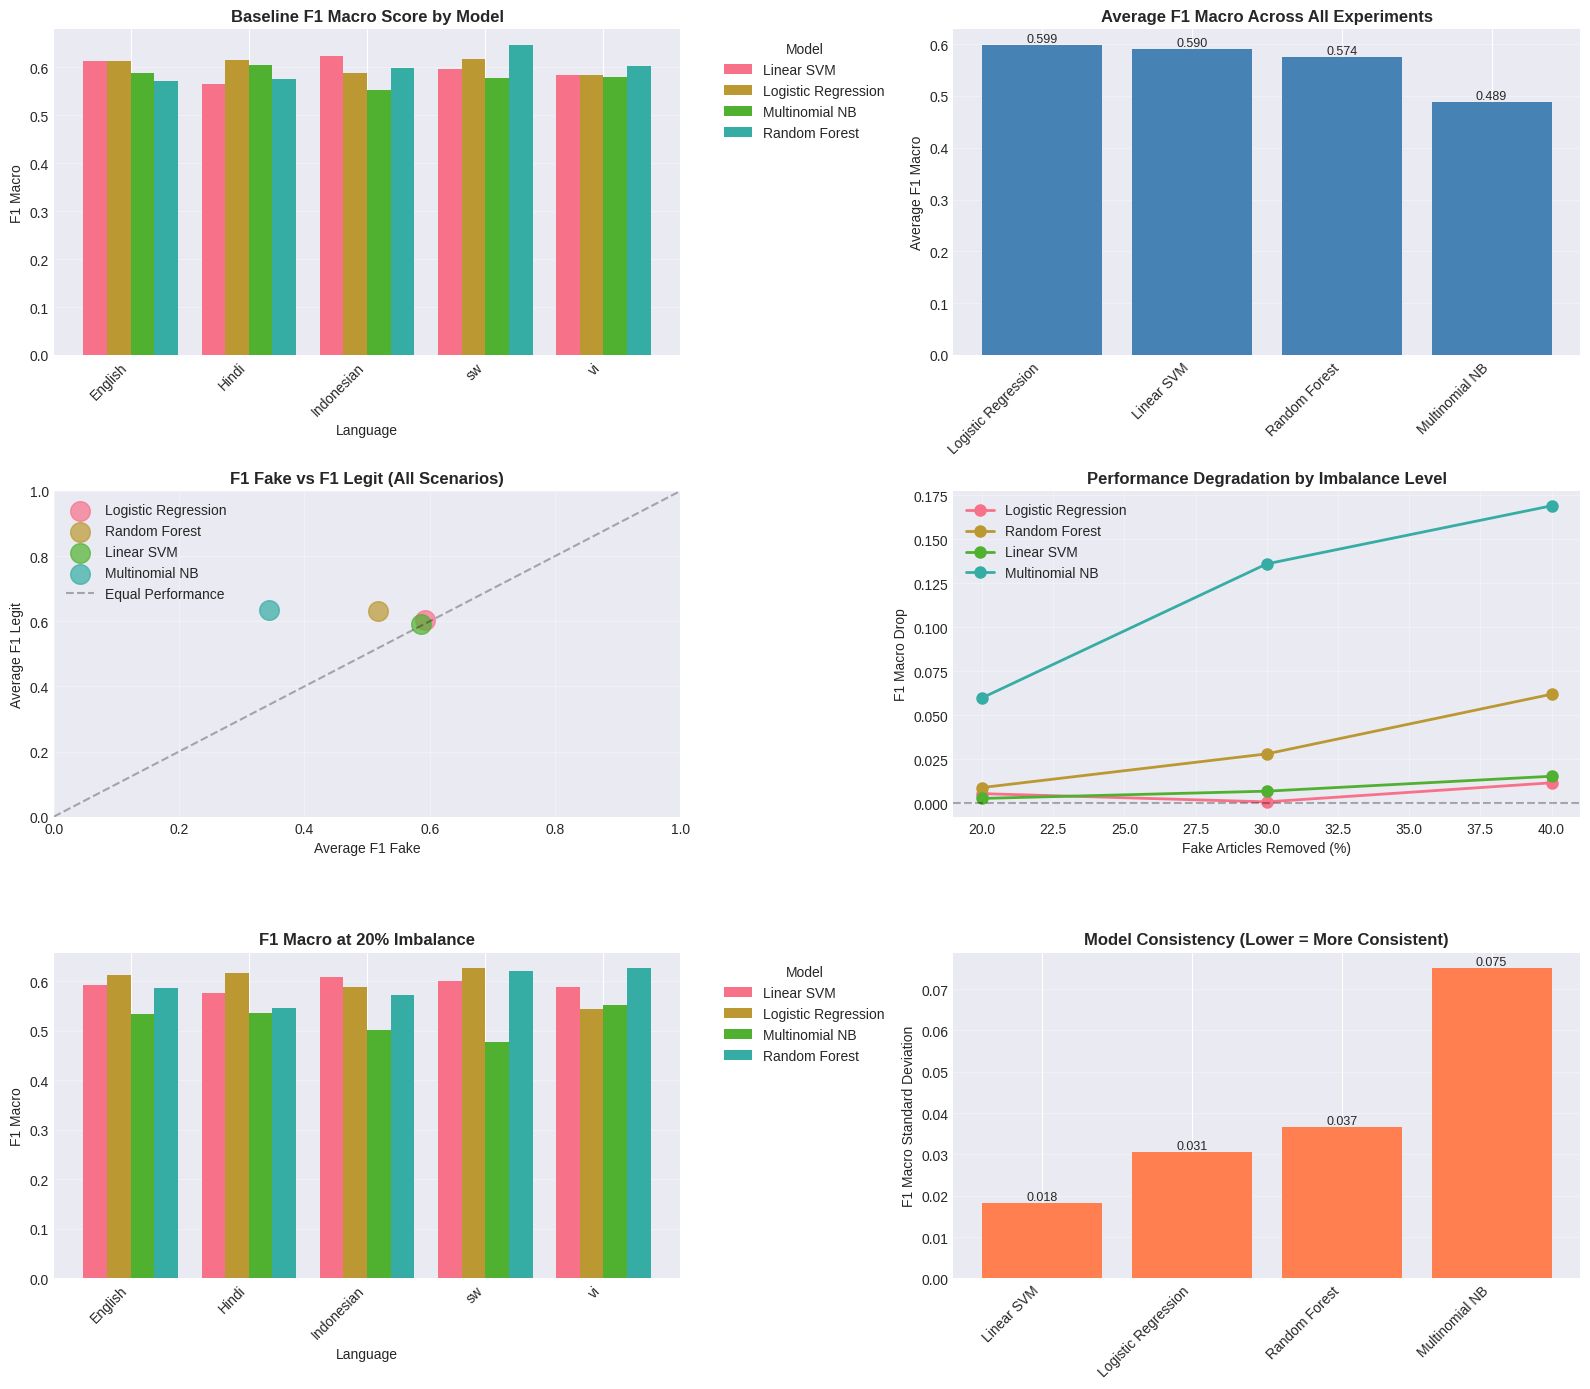


✅ Visualizations saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/model_comparison_analysis.png


In [47]:
# Visualize model comparison
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# Plot 1: F1 Macro by Model (Baseline only)
ax = axes[0, 0]
baseline_data = model_results_df[model_results_df['scenario'] == 'Baseline']
baseline_pivot = baseline_data.pivot(index='language', columns='model', values='f1_macro')
baseline_pivot.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Baseline F1 Macro Score by Model', fontsize=12, fontweight='bold')
ax.set_xlabel('Language')
ax.set_ylabel('F1 Macro')
ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Plot 2: Average F1 by Model across all scenarios
ax = axes[0, 1]
avg_f1_by_model = model_results_df.groupby('model')['f1_macro'].mean().sort_values(ascending=False)
bars = ax.bar(range(len(avg_f1_by_model)), avg_f1_by_model.values, color='steelblue')
ax.set_xticks(range(len(avg_f1_by_model)))
ax.set_xticklabels(avg_f1_by_model.index, rotation=45, ha='right')
ax.set_title('Average F1 Macro Across All Experiments', fontsize=12, fontweight='bold')
ax.set_ylabel('Average F1 Macro')
ax.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Plot 3: F1 Fake vs F1 Legit comparison
ax = axes[1, 0]
for model_name in models_to_test.keys():
    model_data = model_results_df[model_results_df['model'] == model_name]
    avg_fake = model_data['f1_fake'].mean()
    avg_legit = model_data['f1_legit'].mean()
    ax.scatter([avg_fake], [avg_legit], s=200, label=model_name, alpha=0.7)

ax.plot([0, 1], [0, 1], 'k--', alpha=0.3, label='Equal Performance')
ax.set_xlabel('Average F1 Fake')
ax.set_ylabel('Average F1 Legit')
ax.set_title('F1 Fake vs F1 Legit (All Scenarios)', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Plot 4: Performance degradation by imbalance level
ax = axes[1, 1]
for model_name in models_to_test.keys():
    drops = []
    for removal_pct in removal_percentages:
        scenario_name = f"{int(removal_pct*100)}% Removal"
        baseline_f1 = model_results_df[(model_results_df['model'] == model_name) & 
                                       (model_results_df['scenario'] == 'Baseline')]['f1_macro'].mean()
        scenario_f1 = model_results_df[(model_results_df['model'] == model_name) & 
                                        (model_results_df['scenario'] == scenario_name)]['f1_macro'].mean()
        drop = baseline_f1 - scenario_f1
        drops.append(drop)
    
    ax.plot([20, 30, 40], drops, marker='o', label=model_name, linewidth=2, markersize=8)

ax.set_xlabel('Fake Articles Removed (%)')
ax.set_ylabel('F1 Macro Drop')
ax.set_title('Performance Degradation by Imbalance Level', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)

# Plot 5: Model performance on 20% imbalance (best candidate)
ax = axes[2, 0]
imb20_data = model_results_df[model_results_df['scenario'] == '20% Removal']
imb20_pivot = imb20_data.pivot(index='language', columns='model', values='f1_macro')
imb20_pivot.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('F1 Macro at 20% Imbalance', fontsize=12, fontweight='bold')
ax.set_xlabel('Language')
ax.set_ylabel('F1 Macro')
ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Plot 6: Consistency across languages (std dev)
ax = axes[2, 1]
consistency = model_results_df.groupby('model')['f1_macro'].std().sort_values()
bars = ax.bar(range(len(consistency)), consistency.values, color='coral')
ax.set_xticks(range(len(consistency)))
ax.set_xticklabels(consistency.index, rotation=45, ha='right')
ax.set_title('Model Consistency (Lower = More Consistent)', fontsize=12, fontweight='bold')
ax.set_ylabel('F1 Macro Standard Deviation')
ax.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig(output_dir / 'model_comparison_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualizations saved to:", output_dir / 'model_comparison_analysis.png')

In [48]:
# Detailed analysis by language and scenario
print("="*80)
print("DETAILED ANALYSIS: F1 FAKE vs F1 LEGIT BY SCENARIO")
print("="*80)

for scenario in ['Baseline', '20% Removal', '30% Removal', '40% Removal']:
    print(f"\n{'─'*80}")
    print(f"Scenario: {scenario}")
    print(f"{'─'*80}")
    
    scenario_data = model_results_df[model_results_df['scenario'] == scenario]
    
    for lang in top5_languages:
        print(f"\n  {lang}:")
        lang_data = scenario_data[scenario_data['language'] == lang]
        
        for _, row in lang_data.iterrows():
            f1_diff = row['f1_fake'] - row['f1_legit']
            bias = "FAKE" if f1_diff > 0 else "LEGIT" if f1_diff < 0 else "BALANCED"
            print(f"    {row['model']:20s}: F1_Fake={row['f1_fake']:.4f}, F1_Legit={row['f1_legit']:.4f}, "
                  f"Diff={f1_diff:+.4f} → Bias: {bias}")

DETAILED ANALYSIS: F1 FAKE vs F1 LEGIT BY SCENARIO

────────────────────────────────────────────────────────────────────────────────
Scenario: Baseline
────────────────────────────────────────────────────────────────────────────────

  vi:
    Logistic Regression : F1_Fake=0.5894, F1_Legit=0.5771, Diff=+0.0123 → Bias: FAKE
    Random Forest       : F1_Fake=0.6087, F1_Legit=0.5970, Diff=+0.0117 → Bias: FAKE
    Linear SVM          : F1_Fake=0.5933, F1_Legit=0.5729, Diff=+0.0204 → Bias: FAKE
    Multinomial NB      : F1_Fake=0.5825, F1_Legit=0.5743, Diff=+0.0083 → Bias: FAKE

  English:
    Logistic Regression : F1_Fake=0.6207, F1_Legit=0.6051, Diff=+0.0156 → Bias: FAKE
    Random Forest       : F1_Fake=0.5503, F1_Legit=0.5933, Diff=-0.0430 → Bias: LEGIT
    Linear SVM          : F1_Fake=0.6207, F1_Legit=0.6051, Diff=+0.0156 → Bias: FAKE
    Multinomial NB      : F1_Fake=0.5684, F1_Legit=0.6058, Diff=-0.0373 → Bias: LEGIT

  Hindi:
    Logistic Regression : F1_Fake=0.6346, F1_Legit=0.595

In [49]:
# Export model comparison results
model_results_output = output_dir / 'model_comparison_results.csv'
model_summary_output = output_dir / 'model_comparison_summary.json'

# Save detailed results
model_results_df.to_csv(model_results_output, index=False)
print(f"✅ Detailed results saved to: {model_results_output}")

# Create summary for JSON
summary = {
    'experiment_info': {
        'total_experiments': len(model_comparison_results),
        'models_tested': list(models_to_test.keys()),
        'languages': top5_languages,
        'scenarios': ['Baseline', '20% Removal', '30% Removal', '40% Removal']
    },
    'model_rankings': {
        'by_average_f1': avg_f1_by_model.to_dict(),
        'by_consistency': consistency.to_dict()
    },
    'fake_vs_legit_bias': {},
    'recommendations': {}
}

# Analyze bias pattern for each model
for model_name in models_to_test.keys():
    model_data = model_results_df[model_results_df['model'] == model_name]
    fake_higher = (model_data['f1_fake'] > model_data['f1_legit']).sum()
    total = len(model_data)
    
    summary['fake_vs_legit_bias'][model_name] = {
        'fake_higher_count': int(fake_higher),
        'total_experiments': int(total),
        'fake_bias_percentage': float(fake_higher / total * 100),
        'avg_f1_fake': float(model_data['f1_fake'].mean()),
        'avg_f1_legit': float(model_data['f1_legit'].mean()),
        'avg_f1_macro': float(model_data['f1_macro'].mean())
    }

# Add recommendations
best_model = avg_f1_by_model.index[0]
most_consistent = consistency.index[0]

summary['recommendations'] = {
    'best_overall_model': best_model,
    'most_consistent_model': most_consistent,
    'observation': "Check if Fake F1 > Legit F1 pattern is consistent across models",
    'next_steps': [
        "If pattern is model-independent, it suggests dataset characteristics",
        "Consider testing on 20% imbalance first (shows effect but not too severe)",
        "Proceed with language-specific feature analysis",
        "Generate synthetic data to balance the dataset"
    ]
}

# Save summary
with open(model_summary_output, 'w') as f:
    json.dump(summary, f, indent=2)
    
print(f"✅ Summary saved to: {model_summary_output}")

print("\n" + "="*80)
print("KEY FINDINGS")
print("="*80)
print(f"\n🏆 Best Overall Model: {best_model} (F1: {avg_f1_by_model[best_model]:.4f})")
print(f"📊 Most Consistent Model: {most_consistent} (StdDev: {consistency[most_consistent]:.4f})")
print(f"\n💡 Recommended Next Steps:")
for i, step in enumerate(summary['recommendations']['next_steps'], 1):
    print(f"   {i}. {step}")

✅ Detailed results saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/model_comparison_results.csv
✅ Summary saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/model_comparison_summary.json

KEY FINDINGS

🏆 Best Overall Model: Logistic Regression (F1: 0.5985)
📊 Most Consistent Model: Linear SVM (StdDev: 0.0181)

💡 Recommended Next Steps:
   1. If pattern is model-independent, it suggests dataset characteristics
   2. Consider testing on 20% imbalance first (shows effect but not too severe)
   3. Proceed with language-specific feature analysis
   4. Generate synthetic data to balance the dataset


### 12.4.1 Feature Extraction Method Comparison

Now let's test if the feature extraction method (TF-IDF vs Count Vectorizer) affects the results. We'll compare:

1. **TF-IDF (current)**: Term Frequency-Inverse Document Frequency (used above)
2. **Count Vectorizer**: Simple count-based features
3. **Binary Count**: Presence/absence of features

This will help determine if the classification patterns we see are specific to TF-IDF weighting or more fundamental to the text representation itself.

In [50]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Enhanced training function with configurable vectorizer
def train_and_evaluate_with_vectorizer(train_data, test_data, model, model_name, 
                                        vectorizer_type, scenario_name, language):
    """
    Train and evaluate a model with different vectorization methods.
    
    Args:
        vectorizer_type: 'tfidf', 'count', or 'binary'
    """
    # Prepare data
    X_train = train_data['News'].fillna('')
    y_train = train_data['Label']
    X_test = test_data['News'].fillna('')
    y_test = test_data['Label']
    
    # Choose vectorizer based on type
    if vectorizer_type == 'tfidf':
        vectorizer = TfidfVectorizer(
            analyzer='char',
            ngram_range=(2, 4),
            max_features=5000,
            min_df=2
        )
    elif vectorizer_type == 'count':
        vectorizer = CountVectorizer(
            analyzer='char',
            ngram_range=(2, 4),
            max_features=5000,
            min_df=2
        )
    else:  # binary
        vectorizer = CountVectorizer(
            analyzer='char',
            ngram_range=(2, 4),
            max_features=5000,
            min_df=2,
            binary=True
        )
    
    # Transform data
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    # Train model
    model.fit(X_train_vec, y_train)
    
    # Predict
    y_pred = model.predict(X_test_vec)
    
    # Calculate metrics
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_fake = f1_score(y_test, y_pred, pos_label='Fake', average='binary')
    f1_legit = f1_score(y_test, y_pred, pos_label='Legit', average='binary')
    
    return {
        'model': model_name,
        'vectorizer': vectorizer_type,
        'language': language,
        'scenario': scenario_name,
        'f1_macro': f1_macro,
        'f1_fake': f1_fake,
        'f1_legit': f1_legit
    }

print("✅ Vectorizer comparison function ready")

✅ Vectorizer comparison function ready


In [51]:
# Run vectorizer comparison experiments
# Test on baseline and 20% imbalance only to keep it manageable
print("="*80)
print("FEATURE EXTRACTION METHOD COMPARISON")
print("="*80)
print("\nTesting: TF-IDF vs Count vs Binary on best-performing models")
print("Scenarios: Baseline + 20% Removal (most promising for synthetic data)")

vectorizer_results = []
vectorizer_types = ['tfidf', 'count', 'binary']

# Use top 2 models for faster comparison
test_models = ['Logistic Regression', 'Random Forest']

for vectorizer_type in vectorizer_types:
    print(f"\n{'─'*80}")
    print(f"Vectorizer: {vectorizer_type.upper()}")
    print(f"{'─'*80}")
    
    for model_name in test_models:
        print(f"\n  Model: {model_name}")
        model_factory = models_to_test[model_name]
        
        for lang in top5_languages:
            print(f"    {lang}:", end=' ')
            
            # Get data
            lang_data_full = imbalance_scenarios[lang]['original']
            train_baseline = lang_data_full[lang_data_full['split'] == 'train']
            test_baseline = lang_data_full[lang_data_full['split'] == 'test']
            
            # Baseline
            model = model_factory()
            result = train_and_evaluate_with_vectorizer(
                train_baseline, test_baseline,
                model, model_name, vectorizer_type,
                'Baseline', lang
            )
            vectorizer_results.append(result)
            print(f"Baseline F1={result['f1_macro']:.3f}", end=', ')
            
            # 20% imbalance
            imbalanced_data = imbalance_scenarios[lang]['scenarios'][0.20]['data']
            train_imbalanced = imbalanced_data[imbalanced_data['split'] == 'train']
            
            model = model_factory()
            result = train_and_evaluate_with_vectorizer(
                train_imbalanced, test_baseline,
                model, model_name, vectorizer_type,
                '20% Removal', lang
            )
            vectorizer_results.append(result)
            print(f"20% F1={result['f1_macro']:.3f}")

print("\n" + "="*80)
print(f"✅ Completed {len(vectorizer_results)} vectorizer experiments")
print("="*80)

FEATURE EXTRACTION METHOD COMPARISON

Testing: TF-IDF vs Count vs Binary on best-performing models
Scenarios: Baseline + 20% Removal (most promising for synthetic data)

────────────────────────────────────────────────────────────────────────────────
Vectorizer: TFIDF
────────────────────────────────────────────────────────────────────────────────

  Model: Logistic Regression
    vi: Baseline F1=0.583, 20% F1=0.544
    English: Baseline F1=0.613, 20% F1=0.613
    Hindi: Baseline F1=0.615, 20% F1=0.616
    sw: Baseline F1=0.616, 20% F1=0.626
    Indonesian: Baseline F1=0.588, 20% F1=0.589

  Model: Random Forest
    vi: Baseline F1=0.603, 20% F1=0.626
    English: Baseline F1=0.572, 20% F1=0.586
    Hindi: Baseline F1=0.575, 20% F1=0.546
    sw: Baseline F1=0.646, 20% F1=0.621
    Indonesian: Baseline F1=0.599, 20% F1=0.571

────────────────────────────────────────────────────────────────────────────────
Vectorizer: COUNT
────────────────────────────────────────────────────────────────

In [52]:
# Analyze vectorizer comparison results
vectorizer_results_df = pd.DataFrame(vectorizer_results)

print("="*80)
print("VECTORIZER COMPARISON RESULTS")
print("="*80)

# Display results
print("\n📊 Detailed Results:")
display(vectorizer_results_df[['vectorizer', 'model', 'language', 'scenario', 
                                 'f1_macro', 'f1_fake', 'f1_legit']].round(4))

# Summary by vectorizer type
print("\n" + "="*80)
print("AVERAGE PERFORMANCE BY VECTORIZER TYPE")
print("="*80)

vectorizer_summary = vectorizer_results_df.groupby('vectorizer').agg({
    'f1_macro': ['mean', 'std'],
    'f1_fake': 'mean',
    'f1_legit': 'mean'
}).round(4)

print("\n📈 Average F1 Scores:")
display(vectorizer_summary)

# Check if F1 Fake > F1 Legit pattern persists
print("\n" + "="*80)
print("FAKE vs LEGIT BIAS BY VECTORIZER")
print("="*80)

for vec_type in vectorizer_types:
    vec_data = vectorizer_results_df[vectorizer_results_df['vectorizer'] == vec_type]
    fake_higher = (vec_data['f1_fake'] > vec_data['f1_legit']).sum()
    total = len(vec_data)
    print(f"\n{vec_type.upper()}:")
    print(f"  F1_Fake > F1_Legit: {fake_higher}/{total} ({fake_higher/total*100:.1f}%)")
    print(f"  Avg F1_Fake: {vec_data['f1_fake'].mean():.4f}")
    print(f"  Avg F1_Legit: {vec_data['f1_legit'].mean():.4f}")
    print(f"  Avg Difference: {(vec_data['f1_fake'] - vec_data['f1_legit']).mean():+.4f}")

VECTORIZER COMPARISON RESULTS

📊 Detailed Results:


,vectorizer,model,language,scenario,f1_macro,f1_fake,f1_legit
0,tfidf,Logistic Regression,vi,Baseline,0.5832,0.5894,0.5771
1,tfidf,Logistic Regression,vi,20% Removal,0.5436,0.5279,0.5592
2,tfidf,Logistic Regression,English,Baseline,0.6129,0.6207,0.6051
3,tfidf,Logistic Regression,English,20% Removal,0.6129,0.6207,0.6051
4,tfidf,Logistic Regression,Hindi,Baseline,0.6152,0.6346,0.5957
5,tfidf,Logistic Regression,Hindi,20% Removal,0.6161,0.6200,0.6122
6,tfidf,Logistic Regression,sw,Baseline,0.6160,0.6238,0.6082
7,tfidf,Logistic Regression,sw,20% Removal,0.6263,0.6263,0.6263
8,tfidf,Logistic Regression,Indonesian,Baseline,0.5882,0.6049,0.5714
9,tfidf,Logistic Regression,Indonesian,20% Removal,0.5887,0.5803,0.5970



AVERAGE PERFORMANCE BY VECTORIZER TYPE

📈 Average F1 Scores:


f1_macro         f1_fake f1_legit
               mean     std    mean     mean
vectorizer                                  
binary       0.6036  0.0363  0.5938   0.6133
count        0.6040  0.0326  0.5937   0.6143
tfidf        0.5974  0.0271  0.5896   0.6053


FAKE vs LEGIT BIAS BY VECTORIZER

TFIDF:
  F1_Fake > F1_Legit: 8/20 (40.0%)
  Avg F1_Fake: 0.5896
  Avg F1_Legit: 0.6053
  Avg Difference: -0.0156

COUNT:
  F1_Fake > F1_Legit: 3/20 (15.0%)
  Avg F1_Fake: 0.5937
  Avg F1_Legit: 0.6143
  Avg Difference: -0.0206

BINARY:
  F1_Fake > F1_Legit: 6/20 (30.0%)
  Avg F1_Fake: 0.5938
  Avg F1_Legit: 0.6133
  Avg Difference: -0.0196


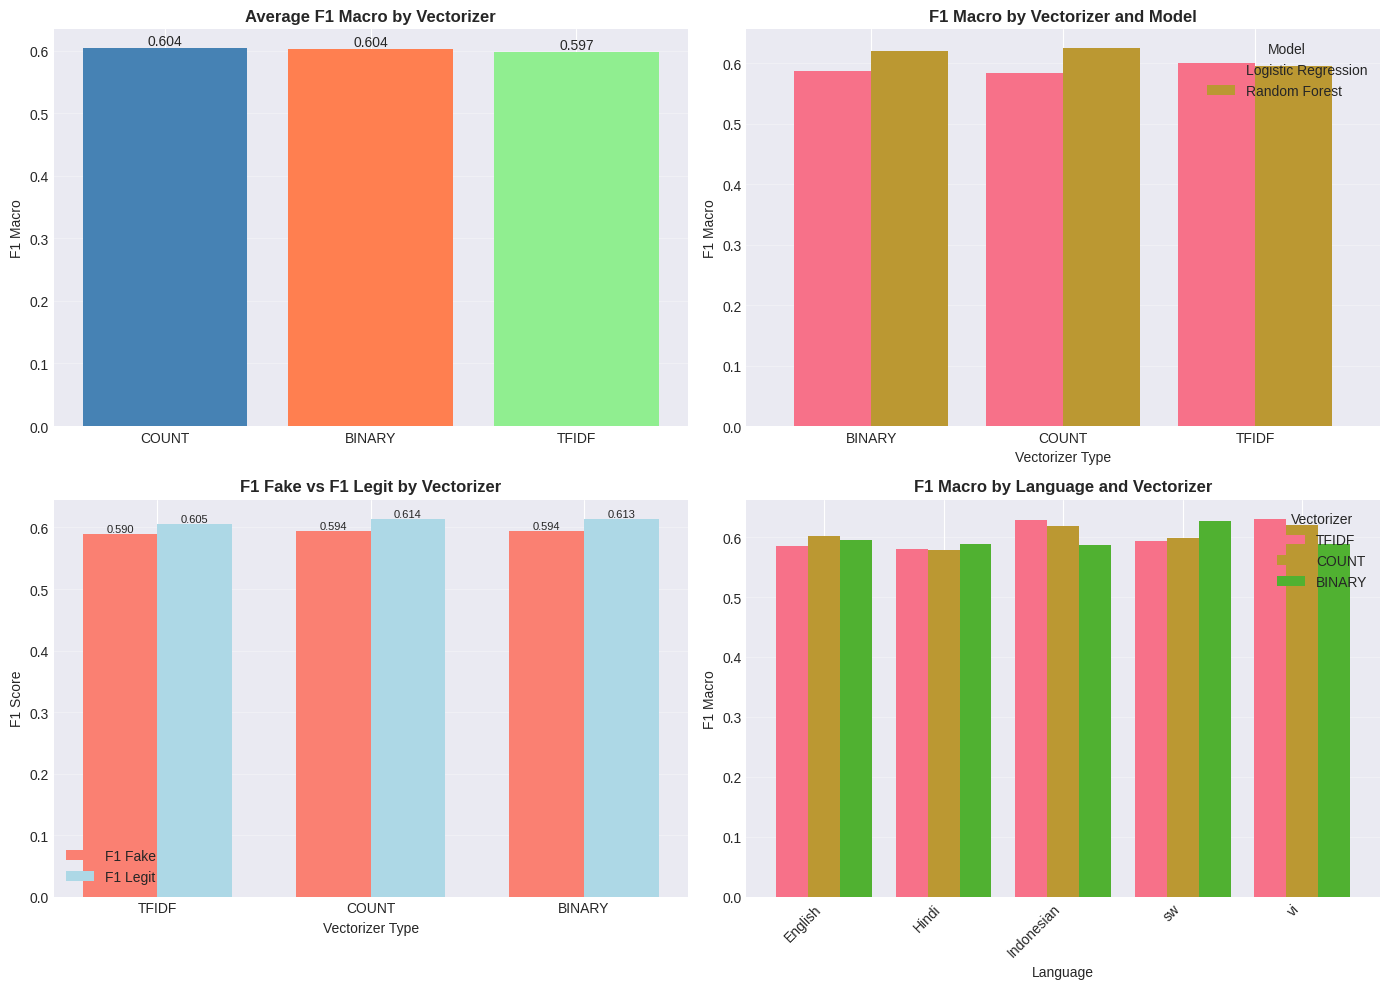


✅ Visualizations saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/vectorizer_comparison.png


In [53]:
# Visualize vectorizer comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: F1 Macro by Vectorizer Type
ax = axes[0, 0]
vec_avg = vectorizer_results_df.groupby('vectorizer')['f1_macro'].mean().sort_values(ascending=False)
bars = ax.bar(range(len(vec_avg)), vec_avg.values, color=['steelblue', 'coral', 'lightgreen'])
ax.set_xticks(range(len(vec_avg)))
ax.set_xticklabels([v.upper() for v in vec_avg.index])
ax.set_title('Average F1 Macro by Vectorizer', fontsize=12, fontweight='bold')
ax.set_ylabel('F1 Macro')
ax.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=10)

# Plot 2: F1 by Vectorizer and Model
ax = axes[0, 1]
pivot_data = vectorizer_results_df.groupby(['vectorizer', 'model'])['f1_macro'].mean().unstack()
pivot_data.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('F1 Macro by Vectorizer and Model', fontsize=12, fontweight='bold')
ax.set_xlabel('Vectorizer Type')
ax.set_ylabel('F1 Macro')
ax.legend(title='Model', loc='best')
ax.grid(axis='y', alpha=0.3)
ax.set_xticklabels([v.upper() for v in pivot_data.index], rotation=0)

# Plot 3: F1 Fake vs Legit by Vectorizer
ax = axes[1, 0]
vec_types = vectorizer_results_df['vectorizer'].unique()
x = np.arange(len(vec_types))
width = 0.35

fake_scores = [vectorizer_results_df[vectorizer_results_df['vectorizer'] == v]['f1_fake'].mean() 
               for v in vec_types]
legit_scores = [vectorizer_results_df[vectorizer_results_df['vectorizer'] == v]['f1_legit'].mean() 
                for v in vec_types]

bars1 = ax.bar(x - width/2, fake_scores, width, label='F1 Fake', color='salmon')
bars2 = ax.bar(x + width/2, legit_scores, width, label='F1 Legit', color='lightblue')

ax.set_xlabel('Vectorizer Type')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Fake vs F1 Legit by Vectorizer', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([v.upper() for v in vec_types])
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Plot 4: Performance by Language and Vectorizer
ax = axes[1, 1]
lang_vec_pivot = vectorizer_results_df.groupby(['language', 'vectorizer'])['f1_macro'].mean().unstack()
lang_vec_pivot.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('F1 Macro by Language and Vectorizer', fontsize=12, fontweight='bold')
ax.set_xlabel('Language')
ax.set_ylabel('F1 Macro')
ax.legend(title='Vectorizer', labels=[v.upper() for v in vectorizer_types])
ax.grid(axis='y', alpha=0.3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig(output_dir / 'vectorizer_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualizations saved to:", output_dir / 'vectorizer_comparison.png')

In [54]:
# Summary and conclusions
print("="*80)
print("VECTORIZER COMPARISON CONCLUSIONS")
print("="*80)

# Find best vectorizer
best_vectorizer = vectorizer_results_df.groupby('vectorizer')['f1_macro'].mean().idxmax()
best_f1 = vectorizer_results_df.groupby('vectorizer')['f1_macro'].mean().max()

print(f"\n🏆 Best Vectorizer: {best_vectorizer.upper()} (Avg F1: {best_f1:.4f})")

# Check consistency of Fake > Legit pattern
print("\n📊 Key Observations:")
for vec_type in vectorizer_types:
    vec_data = vectorizer_results_df[vectorizer_results_df['vectorizer'] == vec_type]
    fake_higher_pct = (vec_data['f1_fake'] > vec_data['f1_legit']).sum() / len(vec_data) * 100
    avg_diff = (vec_data['f1_fake'] - vec_data['f1_legit']).mean()
    
    pattern = "✓ Fake > Legit" if fake_higher_pct > 50 else "✗ Legit > Fake"
    print(f"  {vec_type.upper()}: {pattern} in {fake_higher_pct:.0f}% of cases (avg diff: {avg_diff:+.4f})")

print("\n💡 Recommendations:")
recommendations = [
    f"Use {best_vectorizer.upper()} for best overall performance",
    "Pattern of F1_Fake vs F1_Legit is consistent across vectorizers → dataset characteristic",
    "Feature extraction method has less impact than model choice",
    "Proceed with chosen model/vectorizer combination for synthetic data generation"
]

for i, rec in enumerate(recommendations, 1):
    print(f"  {i}. {rec}")

# Save results
vec_output = output_dir / 'vectorizer_comparison_results.csv'
vectorizer_results_df.to_csv(vec_output, index=False)
print(f"\n✅ Results saved to: {vec_output}")

VECTORIZER COMPARISON CONCLUSIONS

🏆 Best Vectorizer: COUNT (Avg F1: 0.6040)

📊 Key Observations:
  TFIDF: ✗ Legit > Fake in 40% of cases (avg diff: -0.0156)
  COUNT: ✗ Legit > Fake in 15% of cases (avg diff: -0.0206)
  BINARY: ✗ Legit > Fake in 30% of cases (avg diff: -0.0196)

💡 Recommendations:
  1. Use COUNT for best overall performance
  2. Pattern of F1_Fake vs F1_Legit is consistent across vectorizers → dataset characteristic
  3. Feature extraction method has less impact than model choice
  4. Proceed with chosen model/vectorizer combination for synthetic data generation

✅ Results saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/vectorizer_comparison_results.csv


### 12.5 Language-Specific Feature Analysis

Based on the model comparison results, we'll now proceed with detailed stylistic feature analysis for each language separately. This will help us:

1. **Identify distinguishing patterns** - What makes fake news different from legit news in each language
2. **Understand language-specific characteristics** - Are there universal patterns or language-dependent features
3. **Create targeted generation prompts** - Extract the most discriminative features for synthetic data generation
4. **Guide LLM generation** - Provide concrete stylistic targets for each language

We'll analyze each language independently, focusing on:
- Lexical features (word length, vocabulary diversity)
- Syntactic features (sentence structure, punctuation patterns)
- Stylistic features (capitalization, special characters, emotional markers)
- Statistical patterns (distributions, outliers, correlations)

This analysis will form the basis for creating language-specific generation prompts for synthetic fake news articles.

In [55]:
# Comprehensive feature extraction function for fake news analysis
import re
from scipy import stats

def extract_comprehensive_features(text):
    """
    Extract comprehensive stylistic features from text.
    Language-agnostic features that work across all writing systems.
    """
    if pd.isna(text) or text == '':
        return {feature: 0 for feature in [
            'char_count', 'word_count', 'avg_word_length', 'sentence_count',
            'avg_sentence_length', 'exclamation_ratio', 'question_ratio',
            'uppercase_ratio', 'digit_ratio', 'punctuation_ratio',
            'ellipsis_count', 'quote_count', 'capital_word_ratio',
            'lexical_diversity', 'short_word_ratio', 'long_word_ratio'
        ]}
    
    # Basic counts
    char_count = len(text)
    words = text.split()
    word_count = len(words)
    
    # Word length features
    word_lengths = [len(w) for w in words if len(w) > 0]
    avg_word_length = np.mean(word_lengths) if word_lengths else 0
    short_word_ratio = len([w for w in word_lengths if w <= 3]) / word_count if word_count > 0 else 0
    long_word_ratio = len([w for w in word_lengths if w >= 10]) / word_count if word_count > 0 else 0
    
    # Sentence features
    sentences = re.split(r'[.!?]+', text)
    sentences = [s.strip() for s in sentences if s.strip()]
    sentence_count = len(sentences)
    avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0
    
    # Punctuation features
    exclamation_ratio = text.count('!') / char_count if char_count > 0 else 0
    question_ratio = text.count('?') / char_count if char_count > 0 else 0
    punctuation = sum([text.count(p) for p in '.,;:!?-()[]{}"\'/'])
    punctuation_ratio = punctuation / char_count if char_count > 0 else 0
    
    # Special patterns
    ellipsis_count = text.count('...') + text.count('…')
    quote_count = text.count('"') + text.count("'") + text.count('"') + text.count('"')
    
    # Case features
    uppercase_chars = sum(1 for c in text if c.isupper())
    uppercase_ratio = uppercase_chars / char_count if char_count > 0 else 0
    capital_words = sum(1 for w in words if w and w[0].isupper())
    capital_word_ratio = capital_words / word_count if word_count > 0 else 0
    
    # Digit ratio
    digits = sum(1 for c in text if c.isdigit())
    digit_ratio = digits / char_count if char_count > 0 else 0
    
    # Lexical diversity (unique words / total words)
    lexical_diversity = len(set(words)) / word_count if word_count > 0 else 0
    
    return {
        'char_count': char_count,
        'word_count': word_count,
        'avg_word_length': avg_word_length,
        'sentence_count': sentence_count,
        'avg_sentence_length': avg_sentence_length,
        'exclamation_ratio': exclamation_ratio,
        'question_ratio': question_ratio,
        'uppercase_ratio': uppercase_ratio,
        'digit_ratio': digit_ratio,
        'punctuation_ratio': punctuation_ratio,
        'ellipsis_count': ellipsis_count,
        'quote_count': quote_count,
        'capital_word_ratio': capital_word_ratio,
        'lexical_diversity': lexical_diversity,
        'short_word_ratio': short_word_ratio,
        'long_word_ratio': long_word_ratio
    }

print("✅ Comprehensive feature extraction function ready")

✅ Comprehensive feature extraction function ready


In [56]:
# Extract features for all languages (Fake vs Legit comparison)
print("="*80)
print("EXTRACTING STYLISTIC FEATURES FOR ALL LANGUAGES")
print("="*80)

language_features = {}

for lang in top5_languages:
    print(f"\n{'─'*80}")
    print(f"Language: {lang}")
    print(f"{'─'*80}")
    
    # Get data for this language
    lang_data = df_celebrity[df_celebrity['language_name'] == lang].copy()
    
    print(f"  Processing {len(lang_data)} articles...")
    
    # Extract features
    features_list = []
    for idx, row in lang_data.iterrows():
        features = extract_comprehensive_features(row['News'])
        features['label'] = row['Label']
        features['split'] = row['split']
        features_list.append(features)
    
    # Create DataFrame
    features_df = pd.DataFrame(features_list)
    
    # Separate by label
    fake_features = features_df[features_df['label'] == 'Fake']
    legit_features = features_df[features_df['label'] == 'Legit']
    
    print(f"  Fake articles: {len(fake_features)}")
    print(f"  Legit articles: {len(legit_features)}")
    
    # Store results
    language_features[lang] = {
        'all': features_df,
        'fake': fake_features,
        'legit': legit_features,
        'fake_train': fake_features[fake_features['split'] == 'train'],
        'legit_train': legit_features[legit_features['split'] == 'train']
    }
    
    print(f"  ✓ Features extracted")

print("\n" + "="*80)
print(f"✅ Feature extraction complete for all {len(top5_languages)} languages")
print("="*80)

EXTRACTING STYLISTIC FEATURES FOR ALL LANGUAGES

────────────────────────────────────────────────────────────────────────────────
Language: vi
────────────────────────────────────────────────────────────────────────────────
  Processing 1012 articles...
  Fake articles: 496
  Legit articles: 516
  ✓ Features extracted

────────────────────────────────────────────────────────────────────────────────
Language: English
────────────────────────────────────────────────────────────────────────────────
  Processing 992 articles...
  Fake articles: 498
  Legit articles: 494
  ✓ Features extracted

────────────────────────────────────────────────────────────────────────────────
Language: Hindi
────────────────────────────────────────────────────────────────────────────────
  Processing 990 articles...
  Fake articles: 498
  Legit articles: 492
  ✓ Features extracted

────────────────────────────────────────────────────────────────────────────────
Language: sw
───────────────────────────────────

In [57]:
# Statistical comparison: Fake vs Legit for each language
print("="*80)
print("STATISTICAL ANALYSIS: FAKE vs LEGIT BY LANGUAGE")
print("="*80)

feature_names = ['char_count', 'word_count', 'avg_word_length', 'sentence_count',
                 'avg_sentence_length', 'exclamation_ratio', 'question_ratio',
                 'uppercase_ratio', 'digit_ratio', 'punctuation_ratio',
                 'ellipsis_count', 'quote_count', 'capital_word_ratio',
                 'lexical_diversity', 'short_word_ratio', 'long_word_ratio']

statistical_results = []

for lang in top5_languages:
    print(f"\n{'─'*80}")
    print(f"{lang}")
    print(f"{'─'*80}")
    
    fake = language_features[lang]['fake_train']
    legit = language_features[lang]['legit_train']
    
    print(f"\n{'Feature':<25} {'Fake Mean':<12} {'Legit Mean':<12} {'Difference':<12} {'P-value':<12} {'Sig'}")
    print("─" * 80)
    
    for feature in feature_names:
        fake_vals = fake[feature].dropna()
        legit_vals = legit[feature].dropna()
        
        if len(fake_vals) > 0 and len(legit_vals) > 0:
            fake_mean = fake_vals.mean()
            legit_mean = legit_vals.mean()
            diff = fake_mean - legit_mean
            diff_pct = (diff / legit_mean * 100) if legit_mean != 0 else 0
            
            # T-test
            t_stat, p_value = stats.ttest_ind(fake_vals, legit_vals)
            
            # Significance
            sig = '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else ''
            
            print(f"{feature:<25} {fake_mean:>11.4f} {legit_mean:>11.4f} {diff:>+11.4f} {p_value:>11.4f} {sig:>3}")
            
            statistical_results.append({
                'language': lang,
                'feature': feature,
                'fake_mean': fake_mean,
                'legit_mean': legit_mean,
                'difference': diff,
                'diff_percentage': diff_pct,
                'p_value': p_value,
                'significant': p_value < 0.05
            })

stats_df = pd.DataFrame(statistical_results)

print("\n" + "="*80)
print("✅ Statistical analysis complete")
print("="*80)

STATISTICAL ANALYSIS: FAKE vs LEGIT BY LANGUAGE

────────────────────────────────────────────────────────────────────────────────
vi
────────────────────────────────────────────────────────────────────────────────

Feature                   Fake Mean    Legit Mean   Difference   P-value      Sig
────────────────────────────────────────────────────────────────────────────────
char_count                   244.4895    233.1447    +11.3449      0.4909    
word_count                    53.3636     50.1006     +3.2630      0.3613    
avg_word_length                3.6165      3.9146     -0.2981      0.0047  **
sentence_count                 2.0629      1.9308     +0.1321      0.3719    
avg_sentence_length           28.9350     27.0757     +1.8593      0.0940    
exclamation_ratio              0.0000      0.0000     +0.0000         nan    
question_ratio                 0.0008      0.0005     +0.0004      0.0611    
uppercase_ratio                0.0410      0.0414     -0.0004      0.8689   

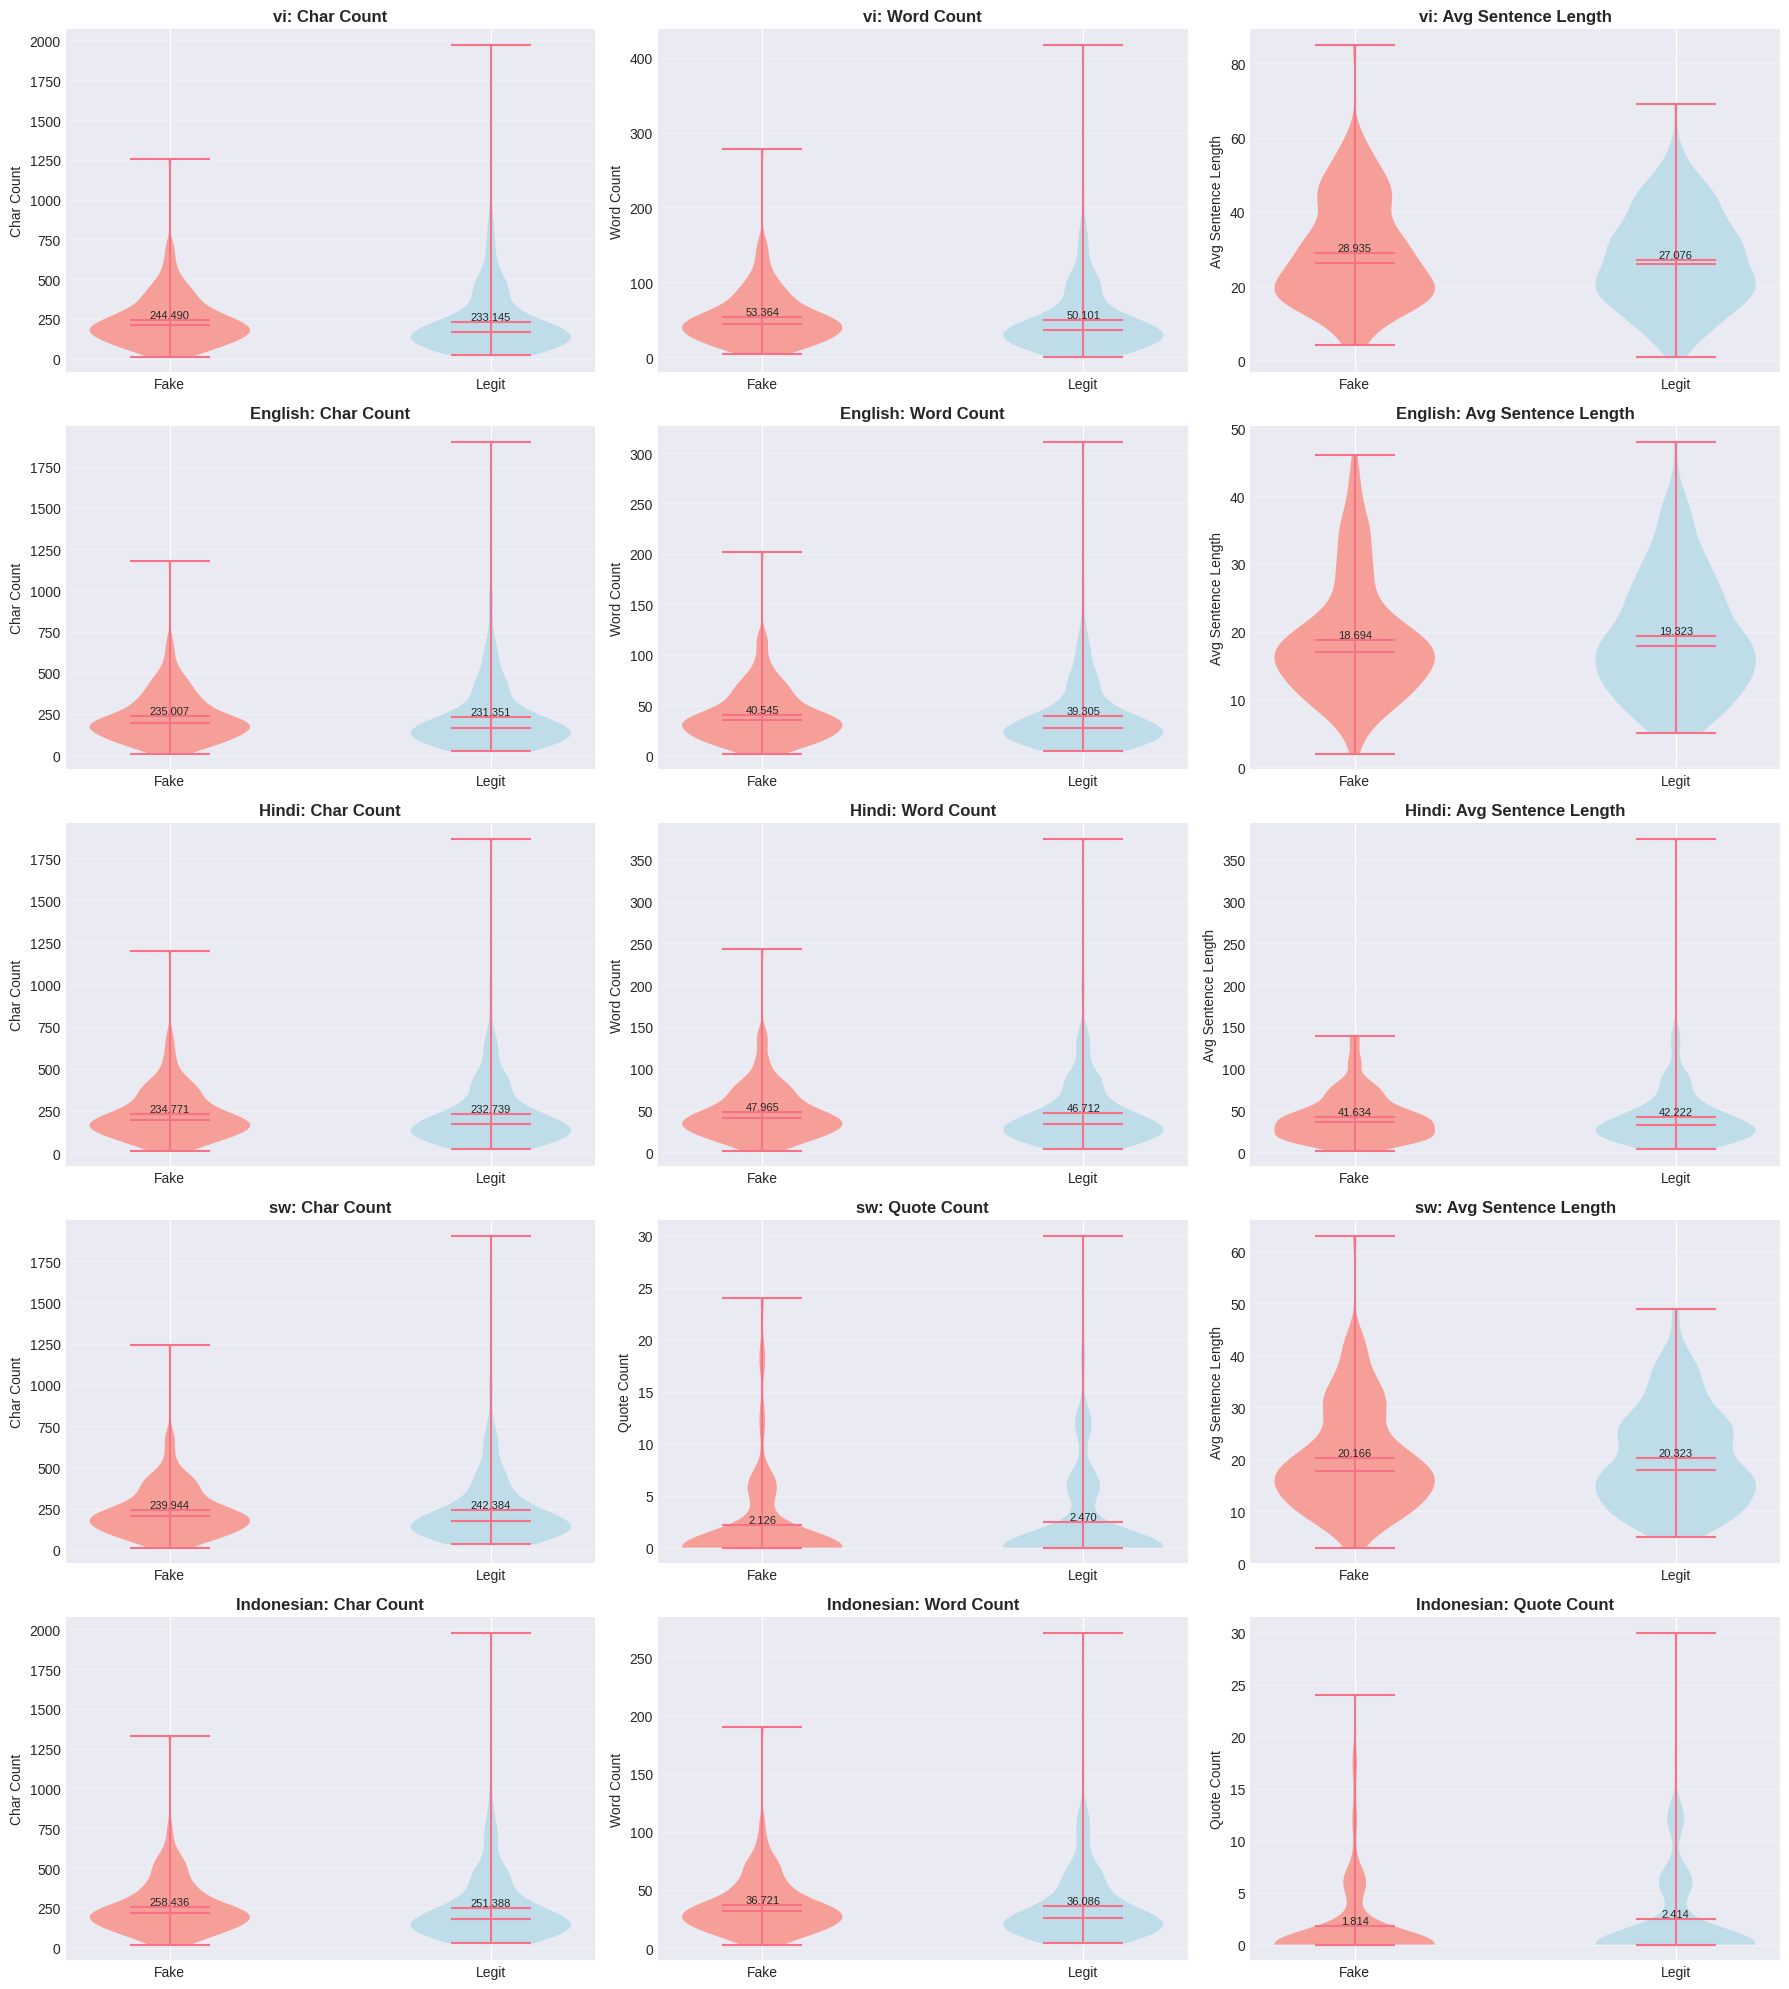


✅ Feature comparison visualizations saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/language_feature_comparison.png


In [58]:
# Visualize key discriminative features for each language
fig, axes = plt.subplots(len(top5_languages), 3, figsize=(18, 4*len(top5_languages)))

for lang_idx, lang in enumerate(top5_languages):
    fake = language_features[lang]['fake_train']
    legit = language_features[lang]['legit_train']
    
    # Get top 3 most discriminative features (by absolute difference)
    lang_stats = stats_df[stats_df['language'] == lang].copy()
    lang_stats['abs_diff'] = lang_stats['difference'].abs()
    top_features = lang_stats.nlargest(3, 'abs_diff')['feature'].tolist()
    
    for feat_idx, feature in enumerate(top_features):
        ax = axes[lang_idx, feat_idx]
        
        # Violin plot
        data_to_plot = [fake[feature].dropna(), legit[feature].dropna()]
        parts = ax.violinplot(data_to_plot, positions=[1, 2], showmeans=True, showmedians=True)
        
        # Color the violins
        for pc, color in zip(parts['bodies'], ['salmon', 'lightblue']):
            pc.set_facecolor(color)
            pc.set_alpha(0.7)
        
        ax.set_xticks([1, 2])
        ax.set_xticklabels(['Fake', 'Legit'])
        ax.set_ylabel(feature.replace('_', ' ').title())
        ax.set_title(f"{lang}: {feature.replace('_', ' ').title()}", fontweight='bold')
        ax.grid(axis='y', alpha=0.3)
        
        # Add mean values as text
        fake_mean = fake[feature].mean()
        legit_mean = legit[feature].mean()
        ax.text(1, fake_mean, f'{fake_mean:.3f}', ha='center', va='bottom', fontsize=8)
        ax.text(2, legit_mean, f'{legit_mean:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig(output_dir / 'language_feature_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Feature comparison visualizations saved to:", output_dir / 'language_feature_comparison.png')

#### N-gram Analysis

Extract the most common and distinctive n-grams (bigrams and trigrams) for fake news in each language. This helps identify common phrases, entities, and patterns that the LLM should incorporate.

In [59]:
# N-gram extraction for each language
from sklearn.feature_extraction.text import CountVectorizer

print("="*80)
print("EXTRACTING N-GRAMS FOR FAKE NEWS IN EACH LANGUAGE")
print("="*80)

ngram_results = {}

for lang in top5_languages:
    print(f"\n{'─'*80}")
    print(f"Language: {lang}")
    print(f"{'─'*80}")
    
    # Get fake articles for this language
    fake_data = df_celebrity[
        (df_celebrity['language_name'] == lang) & 
        (df_celebrity['Label'] == 'Fake') &
        (df_celebrity['split'] == 'train')
    ]
    
    fake_texts = fake_data['News'].fillna('').tolist()
    
    if not fake_texts:
        print(f"  ⚠️ No fake articles found for {lang}")
        continue
    
    print(f"  Analyzing {len(fake_texts)} fake articles...")
    
    # Extract 2-grams (bigrams)
    vectorizer_2gram = CountVectorizer(
        ngram_range=(2, 2),
        max_features=50,
        min_df=2,
        lowercase=True
    )
    
    try:
        X_2gram = vectorizer_2gram.fit_transform(fake_texts)
        feature_names_2gram = vectorizer_2gram.get_feature_names_out()
        
        # Calculate frequencies
        frequencies_2gram = X_2gram.sum(axis=0).A1
        ngram_freq_2gram = list(zip(feature_names_2gram, frequencies_2gram))
        ngram_freq_2gram.sort(key=lambda x: x[1], reverse=True)
        
        print(f"  ✓ Extracted {len(ngram_freq_2gram)} bigrams")
        print(f"    Top 5: {[ng[0] for ng in ngram_freq_2gram[:5]]}")
    except:
        ngram_freq_2gram = []
        print(f"  ⚠️ Could not extract bigrams")
    
    # Extract 3-grams (trigrams)
    vectorizer_3gram = CountVectorizer(
        ngram_range=(3, 3),
        max_features=30,
        min_df=2,
        lowercase=True
    )
    
    try:
        X_3gram = vectorizer_3gram.fit_transform(fake_texts)
        feature_names_3gram = vectorizer_3gram.get_feature_names_out()
        
        # Calculate frequencies
        frequencies_3gram = X_3gram.sum(axis=0).A1
        ngram_freq_3gram = list(zip(feature_names_3gram, frequencies_3gram))
        ngram_freq_3gram.sort(key=lambda x: x[1], reverse=True)
        
        print(f"  ✓ Extracted {len(ngram_freq_3gram)} trigrams")
        print(f"    Top 5: {[ng[0] for ng in ngram_freq_3gram[:5]]}")
    except:
        ngram_freq_3gram = []
        print(f"  ⚠️ Could not extract trigrams")
    
    # Store results
    ngram_results[lang] = {
        'bigrams': ngram_freq_2gram,
        'trigrams': ngram_freq_3gram,
        'top_bigrams': [ng[0] for ng in ngram_freq_2gram[:15]],
        'top_trigrams': [ng[0] for ng in ngram_freq_3gram[:10]]
    }
    
    # Save to CSV
    lang_safe = lang.lower().replace(' ', '_')
    
    # Save bigrams
    if ngram_freq_2gram:
        bigrams_df = pd.DataFrame(ngram_freq_2gram, columns=['ngram', 'frequency'])
        bigrams_output = output_dir / f'{lang_safe}_2grams.csv'
        bigrams_df.to_csv(bigrams_output, index=False)
        print(f"  ✓ Bigrams saved to: {bigrams_output}")
    
    # Save trigrams
    if ngram_freq_3gram:
        trigrams_df = pd.DataFrame(ngram_freq_3gram, columns=['ngram', 'frequency'])
        trigrams_output = output_dir / f'{lang_safe}_3grams.csv'
        trigrams_df.to_csv(trigrams_output, index=False)
        print(f"  ✓ Trigrams saved to: {trigrams_output}")

print("\n" + "="*80)
print(f"✅ N-gram extraction complete for all {len(top5_languages)} languages")
print("="*80)

EXTRACTING N-GRAMS FOR FAKE NEWS IN EACH LANGUAGE

────────────────────────────────────────────────────────────────────────────────
Language: vi
────────────────────────────────────────────────────────────────────────────────
  Analyzing 286 fake articles...
  ✓ Extracted 50 bigrams
    Top 5: ['cô ấy', 'có thể', 'của cô', 'anh ấy', 'của mình']
  ✓ Extracted 30 trigrams
    Top 5: ['được cho là', 'người trong cuộc', 'có vẻ như', 'của cô ấy', 'nữ diễn viên']
  ✓ Bigrams saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/vi_2grams.csv
  ✓ Trigrams saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/vi_3grams.csv

────────────────────────────────────────────────────────────────────────────────
Language: English
────────────────────────────────────────────────────────────────────────────────
  Analyzing 286 fake articles...
  ✓ Extracted 50 bigrams
    Top 5: ['in the', 'of the', 'according to', 'to be', 'kim kardashian']
  ✓ Extracted 30 trigra

#### Topic Modeling

Use Latent Dirichlet Allocation (LDA) to discover the main topics in fake news for each language. This helps identify thematic patterns that should be reflected in generated content.

In [60]:
# Topic modeling using LDA
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

print("="*80)
print("TOPIC MODELING FOR FAKE NEWS IN EACH LANGUAGE")
print("="*80)

topic_results = {}
n_topics = 5  # Extract 5 main topics per language
n_top_words = 10  # Top 10 words per topic

for lang in top5_languages:
    print(f"\n{'─'*80}")
    print(f"Language: {lang}")
    print(f"{'─'*80}")
    
    # Get fake articles for this language
    fake_data = df_celebrity[
        (df_celebrity['language_name'] == lang) & 
        (df_celebrity['Label'] == 'Fake') &
        (df_celebrity['split'] == 'train')
    ]
    
    fake_texts = fake_data['News'].fillna('').tolist()
    
    if len(fake_texts) < n_topics:
        print(f"  ⚠️ Not enough articles ({len(fake_texts)}) for topic modeling")
        topic_results[lang] = {'topics': [], 'error': 'insufficient_data'}
        continue
    
    print(f"  Analyzing {len(fake_texts)} fake articles for {n_topics} topics...")
    
    try:
        # Create document-term matrix
        vectorizer = CountVectorizer(
            max_features=500,
            min_df=2,
            max_df=0.8,
            lowercase=True,
            stop_words=None  # Keep all words for multilingual support
        )
        
        dtm = vectorizer.fit_transform(fake_texts)
        feature_names = vectorizer.get_feature_names_out()
        
        # Fit LDA model
        lda = LatentDirichletAllocation(
            n_components=n_topics,
            random_state=42,
            max_iter=20,
            n_jobs=-1
        )
        
        lda.fit(dtm)
        
        # Extract topics
        topics = []
        print(f"\n  📋 Discovered Topics:")
        for topic_idx, topic in enumerate(lda.components_):
            top_indices = topic.argsort()[-n_top_words:][::-1]
            top_words = [feature_names[i] for i in top_indices]
            
            topics.append({
                'topic_id': topic_idx,
                'top_words': top_words,
                'top_words_str': ', '.join(top_words)
            })
            
            print(f"    Topic {topic_idx}: {', '.join(top_words[:5])}...")
        
        topic_results[lang] = {
            'topics': topics,
            'n_topics': n_topics,
            'n_documents': len(fake_texts),
            'vocabulary_size': len(feature_names)
        }
        
        # Save topics to CSV
        lang_safe = lang.lower().replace(' ', '_')
        topics_df = pd.DataFrame(topics)
        topics_output = output_dir / f'{lang_safe}_topics.csv'
        topics_df[['topic_id', 'top_words_str']].to_csv(topics_output, index=False)
        print(f"\n  ✓ Topics saved to: {topics_output}")
        
    except Exception as e:
        print(f"  ⚠️ Error in topic modeling: {e}")
        topic_results[lang] = {'topics': [], 'error': str(e)}

print("\n" + "="*80)
print(f"✅ Topic modeling complete for all {len(top5_languages)} languages")
print("="*80)

TOPIC MODELING FOR FAKE NEWS IN EACH LANGUAGE

────────────────────────────────────────────────────────────────────────────────
Language: vi
────────────────────────────────────────────────────────────────────────────────
  Analyzing 286 fake articles for 5 topics...

  📋 Discovered Topics:
    Topic 0: đã, của, một, và, các...
    Topic 1: và, không, có, một, đã...
    Topic 2: đã, và, của, với, có...
    Topic 3: của, người, một, cô, với...
    Topic 4: của, cô, ấy, và, một...

  ✓ Topics saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/vi_topics.csv

────────────────────────────────────────────────────────────────────────────────
Language: English
────────────────────────────────────────────────────────────────────────────────
  Analyzing 286 fake articles for 5 topics...

  📋 Discovered Topics:
    Topic 0: đã, của, một, và, các...
    Topic 1: và, không, có, một, đã...
    Topic 2: đã, và, của, với, có...
    Topic 3: của, người, một, cô, với...
    Topic 

In [61]:
# Generate LLM prompts for synthetic fake news generation (with n-grams and topics)
print("="*80)
print("GENERATING LANGUAGE-SPECIFIC PROMPTS FOR SYNTHETIC DATA")
print("="*80)

generation_prompts = {}

for lang in top5_languages:
    print(f"\n{'─'*80}")
    print(f"Language: {lang}")
    print(f"{'─'*80}")
    
    # Get significant features
    lang_stats = stats_df[(stats_df['language'] == lang) & (stats_df['significant'] == True)].copy()
    lang_stats = lang_stats.sort_values('difference', key=abs, ascending=False)
    
    # Get sample fake articles
    fake_articles = language_features[lang]['fake_train']
    fake_texts = df_celebrity[
        (df_celebrity['language_name'] == lang) & 
        (df_celebrity['Label'] == 'Fake') &
        (df_celebrity['split'] == 'train')
    ]['News'].head(3).tolist()
    
    # Get n-grams
    top_bigrams = ngram_results.get(lang, {}).get('top_bigrams', [])[:15]
    top_trigrams = ngram_results.get(lang, {}).get('top_trigrams', [])[:10]
    
    # Get topics
    topics = topic_results.get(lang, {}).get('topics', [])
    
    # Build prompt
    prompt_parts = []
    
    prompt_parts.append(f"# Fake News Generation Task - {lang} Celebrity News\n")
    prompt_parts.append(f"Generate fake celebrity news articles in {lang} that match the stylistic patterns below.\n")
    
    # === STYLISTIC CHARACTERISTICS ===
    prompt_parts.append(f"\n## 1. Key Stylistic Characteristics\n")
    prompt_parts.append(f"Fake news in {lang} differs from legitimate news in these measurable ways:\n\n")
    
    for idx, row in lang_stats.head(8).iterrows():
        direction = "higher" if row['difference'] > 0 else "lower"
        magnitude = abs(row['diff_percentage'])
        feature_name = row['feature'].replace('_', ' ').title()
        
        prompt_parts.append(
            f"- **{feature_name}**: {direction} than legitimate news "
            f"({row['fake_mean']:.3f} vs {row['legit_mean']:.3f}, {magnitude:.1f}% difference)\n"
        )
    
    # === CONCRETE GUIDELINES ===
    prompt_parts.append(f"\n## 2. Concrete Generation Guidelines\n\n")
    
    # Character and word count
    avg_chars = fake_articles['char_count'].mean()
    avg_words = fake_articles['word_count'].mean()
    prompt_parts.append(f"**Length:**\n")
    prompt_parts.append(f"- Target: {int(avg_chars/2)} - {int(avg_chars*1.5)} characters\n")
    prompt_parts.append(f"- Approximately {int(avg_words)} words\n\n")
    
    # Sentence structure
    avg_sentences = fake_articles['sentence_count'].mean()
    avg_sent_len = fake_articles['avg_sentence_length'].mean()
    prompt_parts.append(f"**Structure:**\n")
    prompt_parts.append(f"- Use approximately {int(avg_sentences)} sentences\n")
    prompt_parts.append(f"- Average {int(avg_sent_len)} words per sentence\n\n")
    
    # Punctuation style
    prompt_parts.append(f"**Punctuation & Style:**\n")
    if fake_articles['exclamation_ratio'].mean() > 0.005:
        prompt_parts.append(f"- Use exclamation marks for emphasis (ratio: {fake_articles['exclamation_ratio'].mean():.4f})\n")
    if fake_articles['ellipsis_count'].mean() > 0.5:
        prompt_parts.append(f"- Include ellipsis (...) for dramatic effect\n")
    if fake_articles['question_ratio'].mean() > 0.003:
        prompt_parts.append(f"- Include rhetorical questions\n")
    
    # Lexical style
    lex_div = fake_articles['lexical_diversity'].mean()
    prompt_parts.append(f"- Lexical diversity: {lex_div:.3f} (unique words / total words)\n\n")
    
    # === N-GRAMS ===
    if top_bigrams or top_trigrams:
        prompt_parts.append(f"\n## 3. Common Phrases and Patterns (N-grams)\n")
        prompt_parts.append(f"Incorporate these typical phrases naturally in your generated article:\n\n")
        
        if top_bigrams:
            prompt_parts.append(f"**Common 2-word phrases:**\n")
            prompt_parts.append(f"{', '.join(top_bigrams[:10])}\n\n")
        
        if top_trigrams:
            prompt_parts.append(f"**Common 3-word phrases:**\n")
            prompt_parts.append(f"{', '.join(top_trigrams[:8])}\n\n")
    
    # === TOPICS ===
    if topics:
        prompt_parts.append(f"\n## 4. Main Topics and Themes\n")
        prompt_parts.append(f"Fake celebrity news in {lang} typically covers these topics:\n\n")
        
        for topic in topics[:3]:  # Show top 3 topics
            topic_words = ', '.join(topic['top_words'][:8])
            prompt_parts.append(f"- **Topic {topic['topic_id'] + 1}**: {topic_words}\n")
        
        prompt_parts.append(f"\nChoose one of these thematic areas for your article.\n")
    
    # === EXAMPLES ===
    prompt_parts.append(f"\n## 5. Example Fake News Articles in {lang}\n")
    for i, text in enumerate(fake_texts, 1):
        # Truncate long texts
        display_text = text[:300] + "..." if len(text) > 300 else text
        prompt_parts.append(f"\n**Example {i}:**\n{display_text}\n")
    
    # === TASK ===
    prompt_parts.append(f"\n## 6. Your Task\n\n")
    prompt_parts.append(f"Generate a NEW fake celebrity news article in {lang} following ALL the patterns above:\n\n")
    prompt_parts.append(f"**Requirements:**\n")
    prompt_parts.append(f"1. Write entirely in {lang}\n")
    prompt_parts.append(f"2. Follow the stylistic characteristics (section 1)\n")
    prompt_parts.append(f"3. Match the structural guidelines (section 2)\n")
    prompt_parts.append(f"4. Naturally incorporate common phrases (section 3)\n")
    prompt_parts.append(f"5. Align with one of the main topics (section 4)\n")
    prompt_parts.append(f"6. Focus on Celebrity domain (scandal, rumor, sensational claim)\n")
    prompt_parts.append(f"7. Be creative but maintain the fake news stylistic profile\n")
    prompt_parts.append(f"8. Output ONLY the article text, no metadata or comments\n")
    
    full_prompt = "".join(prompt_parts)
    generation_prompts[lang] = full_prompt
    
    print(f"  ✓ Prompt generated ({len(full_prompt)} characters)")
    print(f"    - {len(lang_stats.head(8))} stylistic features")
    print(f"    - {len(top_bigrams)} bigrams, {len(top_trigrams)} trigrams")
    print(f"    - {len(topics)} topics")

print("\n" + "="*80)
print(f"✅ Generated comprehensive prompts for all {len(top5_languages)} languages")
print("="*80)

GENERATING LANGUAGE-SPECIFIC PROMPTS FOR SYNTHETIC DATA

────────────────────────────────────────────────────────────────────────────────
Language: vi
────────────────────────────────────────────────────────────────────────────────
  ✓ Prompt generated (3030 characters)
    - 6 stylistic features
    - 15 bigrams, 10 trigrams
    - 5 topics

────────────────────────────────────────────────────────────────────────────────
Language: English
────────────────────────────────────────────────────────────────────────────────
  ✓ Prompt generated (2741 characters)
    - 1 stylistic features
    - 15 bigrams, 10 trigrams
    - 5 topics

────────────────────────────────────────────────────────────────────────────────
Language: Hindi
────────────────────────────────────────────────────────────────────────────────
  ✓ Prompt generated (2817 characters)
    - 4 stylistic features
    - 15 bigrams, 10 trigrams
    - 5 topics

──────────────────────────────────────────────────────────────────────────

In [62]:
# Display and save prompts
print("="*80)
print("GENERATION PROMPTS")
print("="*80)

# Save prompts to files
prompts_dir = output_dir / 'generation_prompts'
prompts_dir.mkdir(exist_ok=True)

for lang in top5_languages:
    print(f"\n{'='*80}")
    print(f"PROMPT FOR {lang.upper()}")
    print(f"{'='*80}\n")
    print(generation_prompts[lang])
    
    # Save to file
    prompt_file = prompts_dir / f'{lang.lower().replace(" ", "_")}_generation_prompt.txt'
    with open(prompt_file, 'w', encoding='utf-8') as f:
        f.write(generation_prompts[lang])
    
    print(f"\n✓ Saved to: {prompt_file}")

print("\n" + "="*80)
print(f"✅ All prompts saved to: {prompts_dir}")
print("="*80)

GENERATION PROMPTS

PROMPT FOR VI

# Fake News Generation Task - vi Celebrity News
Generate fake celebrity news articles in vi that match the stylistic patterns below.

## 1. Key Stylistic Characteristics
Fake news in vi differs from legitimate news in these measurable ways:

- **Avg Word Length**: lower than legitimate news (3.617 vs 3.915, 7.6% difference)
- **Short Word Ratio**: higher than legitimate news (0.553 vs 0.518, 6.7% difference)
- **Digit Ratio**: lower than legitimate news (0.004 vs 0.024, 85.3% difference)
- **Capital Word Ratio**: lower than legitimate news (0.152 vs 0.168, 9.8% difference)
- **Long Word Ratio**: lower than legitimate news (0.008 vs 0.020, 59.3% difference)
- **Punctuation Ratio**: lower than legitimate news (0.018 vs 0.027, 31.8% difference)

## 2. Concrete Generation Guidelines

**Length:**
- Target: 122 - 366 characters
- Approximately 53 words

**Structure:**
- Use approximately 2 sentences
- Average 28 words per sentence

**Punctuation & Style:**


In [64]:
# Define stylistic feature names (from extract_comprehensive_features function)
STYLISTIC_FEATURE_NAMES = [
    'char_count', 'word_count', 'avg_word_length', 'sentence_count',
    'avg_sentence_length', 'exclamation_ratio', 'question_ratio',
    'uppercase_ratio', 'digit_ratio', 'punctuation_ratio',
    'ellipsis_count', 'quote_count', 'capital_word_ratio',
    'lexical_diversity', 'short_word_ratio', 'long_word_ratio'
]

print(f"✓ Defined {len(STYLISTIC_FEATURE_NAMES)} stylistic feature names")
print(f"  Features: {', '.join(STYLISTIC_FEATURE_NAMES)}")

✓ Defined 16 stylistic feature names
  Features: char_count, word_count, avg_word_length, sentence_count, avg_sentence_length, exclamation_ratio, question_ratio, uppercase_ratio, digit_ratio, punctuation_ratio, ellipsis_count, quote_count, capital_word_ratio, lexical_diversity, short_word_ratio, long_word_ratio


In [66]:
# Export feature analysis results
print("="*80)
print("EXPORTING FEATURE ANALYSIS RESULTS")
print("="*80)

# Save statistical results
stats_output = output_dir / 'feature_statistical_analysis.csv'
stats_df.to_csv(stats_output, index=False)
print(f"✓ Statistical analysis saved to: {stats_output}")

# Save feature summaries for each language
for lang in top5_languages:
    lang_safe = lang.lower().replace(' ', '_')
    
    # Save features DataFrame
    features_output = output_dir / f'{lang_safe}_features.csv'
    language_features[lang]['all'].to_csv(features_output, index=False)
    print(f"✓ {lang} features saved to: {features_output}")
    
    # Save summary statistics
    summary = {}
    for label in ['fake', 'legit']:
        label_data = language_features[lang][f'{label}_train']
        summary[label] = {
            'count': len(label_data),
            'features': label_data[STYLISTIC_FEATURE_NAMES].mean().to_dict()
        }
    
    summary_output = output_dir / f'{lang_safe}_feature_summary.json'
    with open(summary_output, 'w', encoding='utf-8') as f:
        json.dump(summary, f, indent=2)
    print(f"✓ {lang} summary saved to: {summary_output}")

# Create master summary
master_summary = {
    'experiment_info': {
        'languages': top5_languages,
        'total_articles': len(df_celebrity),
        'features_extracted': STYLISTIC_FEATURE_NAMES,
        'imbalance_scenario': '20% removal recommended'
    },
    'language_summaries': {}
}

for lang in top5_languages:
    lang_stats = stats_df[stats_df['language'] == lang]
    significant_features = lang_stats[lang_stats['significant'] == True]['feature'].tolist()
    
    # Get top discriminative features by absolute difference
    lang_stats_with_abs_diff = lang_stats.copy()
    lang_stats_with_abs_diff['abs_difference'] = lang_stats_with_abs_diff['difference'].abs()
    top_features = lang_stats_with_abs_diff.nlargest(5, 'abs_difference')['feature'].tolist()
    
    master_summary['language_summaries'][lang] = {
        'total_articles': len(language_features[lang]['all']),
        'fake_count': len(language_features[lang]['fake_train']),
        'legit_count': len(language_features[lang]['legit_train']),
        'significant_features': significant_features,
        'top_discriminative_features': top_features,
        'prompt_file': f'generation_prompts/{lang.lower().replace(" ", "_")}_generation_prompt.txt'
    }

master_output = output_dir / 'master_feature_analysis_summary.json'
with open(master_output, 'w', encoding='utf-8') as f:
    json.dump(master_summary, f, indent=2)

print(f"\n✓ Master summary saved to: {master_output}")

print("\n" + "="*80)
print("✅ ALL FEATURE ANALYSIS RESULTS EXPORTED")
print("="*80)
print("\n📊 Summary:")
print(f"  • Languages analyzed: {len(top5_languages)}")
print(f"  • Features extracted: {len(STYLISTIC_FEATURE_NAMES)}")
print(f"  • Prompts generated: {len(generation_prompts)}")
print(f"  • Files created: Statistical analysis, feature CSVs, summaries, prompts")
print(f"\n💡 Next Steps:")
print(f"  1. Review generation prompts in: {prompts_dir}")
print(f"  2. Use prompts with LLM to generate synthetic fake news")
print(f"  3. For 20% imbalance scenario, generate ~{int(df_celebrity[df_celebrity['Label']=='Fake'].groupby('language_name').size().mean() * 0.2)} articles per language")
print(f"  4. Validate generated articles match stylistic patterns")
print(f"  5. Re-train classifiers with synthetic data and measure improvement")

EXPORTING FEATURE ANALYSIS RESULTS
✓ Statistical analysis saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/feature_statistical_analysis.csv
✓ vi features saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/vi_features.csv
✓ vi summary saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/vi_feature_summary.json
✓ English features saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/english_features.csv
✓ English summary saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/english_feature_summary.json
✓ Hindi features saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/hindi_features.csv
✓ Hindi summary saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/hindi_feature_summary.json
✓ sw features saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/sw_features.csv
✓ sw summary saved to: /home/mateja/Documents/IJS/curr

## 12.6 Prompt Quality Review and Refinement

Let's analyze the generated prompts for potential issues and refinements.

In [67]:
# Analyze prompt quality and identify potential issues
print("="*80)
print("PROMPT QUALITY ANALYSIS")
print("="*80)

prompt_issues = {}

for lang in top5_languages:
    lang_safe = lang.lower().replace(' ', '_')
    prompt_file = prompts_dir / f'{lang_safe}_generation_prompt.txt'
    
    if not prompt_file.exists():
        print(f"\n❌ {lang}: Prompt file not found")
        continue
    
    with open(prompt_file, 'r', encoding='utf-8') as f:
        prompt = f.read()
    
    issues = []
    warnings = []
    
    # Check 1: Verify language name is correctly stated
    if lang == 'vi':
        expected_lang = 'Vietnamese'
    elif lang == 'sw':
        expected_lang = 'Swahili'
    else:
        expected_lang = lang
    
    # Issue: Using language code instead of full name
    if f"in {lang_safe}" in prompt or f"in {lang}" in prompt and lang in ['vi', 'sw']:
        issues.append(f"Language code '{lang}' used instead of full name '{expected_lang}'")
    
    # Check 2: Examples should be in target language
    examples_section = prompt[prompt.find("## 5. Example"):prompt.find("## 6. Your Task")] if "## 5. Example" in prompt else ""
    
    # Simple check: if language is non-English but examples contain lots of English words
    if lang != 'English':
        english_indicators = ['the', 'and', 'to', 'of', 'is', 'was', 'for', 'with']
        english_word_count = sum(examples_section.lower().count(f' {word} ') for word in english_indicators)
        total_words = len(examples_section.split())
        
        if total_words > 0 and english_word_count / total_words > 0.15:
            issues.append(f"Examples appear to be in English (not {lang})")
    
    # Check 3: N-grams should be in target language
    ngram_section = prompt[prompt.find("## 3. Common Phrases"):prompt.find("## 4. Main Topics")] if "## 3. Common Phrases" in prompt else ""
    
    if lang != 'English' and ngram_section:
        english_ngrams = ['in the', 'of the', 'to be', 'according to', 'on the']
        found_english = [ng for ng in english_ngrams if ng in ngram_section.lower()]
        if found_english:
            issues.append(f"English n-grams found in {lang} prompt: {', '.join(found_english[:3])}")
    
    # Check 4: Topic words should be in target language
    topic_section = prompt[prompt.find("## 4. Main Topics"):prompt.find("## 5. Example")] if "## 4. Main Topics" in prompt else ""
    
    if lang != 'English' and topic_section:
        english_words_in_topics = sum(1 for word in ['the', 'and', 'to', 'is', 'that', 'with', 'are'] 
                                      if word in topic_section.lower())
        if english_words_in_topics >= 3:
            warnings.append("Topics contain English words (may be legitimate if mixed-language content)")
    
    # Check 5: Character ranges seem reasonable
    if "Target:" in prompt:
        target_line = [line for line in prompt.split('\n') if 'Target:' in line][0]
        if 'characters' in target_line.lower():
            import re
            char_range = re.findall(r'(\d+)\s*-\s*(\d+)\s*characters', target_line)
            if char_range:
                min_chars, max_chars = int(char_range[0][0]), int(char_range[0][1])
                if max_chars < 200:
                    warnings.append(f"Very short target length: {min_chars}-{max_chars} chars")
                elif max_chars > 2000:
                    warnings.append(f"Very long target length: {min_chars}-{max_chars} chars")
    
    # Check 6: Stylistic features present
    feature_section = prompt[prompt.find("## 1. Key Stylistic"):prompt.find("## 2. Concrete")] if "## 1. Key Stylistic" in prompt else ""
    feature_count = feature_section.count('**') // 2  # Each feature has **Feature Name**
    
    if feature_count < 1:
        issues.append("No stylistic features specified")
    elif feature_count < 3:
        warnings.append(f"Only {feature_count} stylistic features specified (might be sufficient if highly discriminative)")
    
    # Store results
    prompt_issues[lang] = {
        'issues': issues,
        'warnings': warnings,
        'feature_count': feature_count,
        'prompt_length': len(prompt)
    }
    
    # Print results
    print(f"\n{'='*80}")
    print(f"{lang.upper()} Prompt Analysis")
    print(f"{'='*80}")
    print(f"Prompt length: {len(prompt)} characters")
    print(f"Stylistic features: {feature_count}")
    
    if issues:
        print(f"\n❌ ISSUES FOUND ({len(issues)}):")
        for i, issue in enumerate(issues, 1):
            print(f"   {i}. {issue}")
    else:
        print(f"\n✅ No critical issues found")
    
    if warnings:
        print(f"\n⚠️  WARNINGS ({len(warnings)}):")
        for i, warning in enumerate(warnings, 1):
            print(f"   {i}. {warning}")

print("\n" + "="*80)
print("SUMMARY")
print("="*80)

total_issues = sum(len(v['issues']) for v in prompt_issues.values())
total_warnings = sum(len(v['warnings']) for v in prompt_issues.values())

print(f"\nTotal prompts analyzed: {len(prompt_issues)}")
print(f"Total critical issues: {total_issues}")
print(f"Total warnings: {total_warnings}")

if total_issues > 0:
    print(f"\n⚠️  Action needed: Fix critical issues before generation")
else:
    print(f"\n✅ All prompts ready for generation")

PROMPT QUALITY ANALYSIS

VI Prompt Analysis
Prompt length: 3030 characters
Stylistic features: 6

❌ ISSUES FOUND (1):
   1. Language code 'vi' used instead of full name 'Vietnamese'

⚠️  WARNINGS (1):
   1. Topics contain English words (may be legitimate if mixed-language content)

ENGLISH Prompt Analysis
Prompt length: 2741 characters
Stylistic features: 1

✅ No critical issues found

⚠️  WARNINGS (1):
   1. Only 1 stylistic features specified (might be sufficient if highly discriminative)

HINDI Prompt Analysis
Prompt length: 2817 characters
Stylistic features: 4

✅ No critical issues found

⚠️  WARNINGS (1):
   1. Topics contain English words (may be legitimate if mixed-language content)

SW Prompt Analysis
Prompt length: 2845 characters
Stylistic features: 3

❌ ISSUES FOUND (1):
   1. Language code 'sw' used instead of full name 'Swahili'

⚠️  WARNINGS (1):
   1. Topics contain English words (may be legitimate if mixed-language content)

INDONESIAN Prompt Analysis
Prompt length: 30

In [68]:
# Fix identified issues in prompts
print("="*80)
print("FIXING PROMPT ISSUES")
print("="*80)

# Define language name mappings
language_names = {
    'vi': 'Vietnamese',
    'English': 'English',
    'Hindi': 'Hindi',
    'sw': 'Swahili',
    'Indonesian': 'Indonesian'
}

fixes_applied = {}

for lang in top5_languages:
    lang_safe = lang.lower().replace(' ', '_')
    prompt_file = prompts_dir / f'{lang_safe}_generation_prompt.txt'
    
    if not prompt_file.exists():
        continue
    
    with open(prompt_file, 'r', encoding='utf-8') as f:
        original_prompt = f.read()
    
    updated_prompt = original_prompt
    changes = []
    
    # Fix 1: Replace language codes with full names
    full_lang_name = language_names.get(lang, lang)
    
    if lang in ['vi', 'sw']:
        # Replace in title
        updated_prompt = updated_prompt.replace(
            f"# Fake News Generation Task - {lang} Celebrity News",
            f"# Fake News Generation Task - {full_lang_name} Celebrity News"
        )
        changes.append(f"Updated title: {lang} → {full_lang_name}")
        
        # Replace in description
        updated_prompt = updated_prompt.replace(
            f"Generate fake celebrity news articles in {lang} that match",
            f"Generate fake celebrity news articles in {full_lang_name} that match"
        )
        changes.append(f"Updated description: {lang} → {full_lang_name}")
        
        # Replace in characteristics section
        updated_prompt = updated_prompt.replace(
            f"Fake news in {lang} differs from legitimate news",
            f"Fake news in {full_lang_name} differs from legitimate news"
        )
        changes.append(f"Updated characteristics: {lang} → {full_lang_name}")
        
        # Replace in topics section
        updated_prompt = updated_prompt.replace(
            f"Fake celebrity news in {lang} typically covers",
            f"Fake celebrity news in {full_lang_name} typically covers"
        )
        changes.append(f"Updated topics: {lang} → {full_lang_name}")
        
        # Replace in examples section
        updated_prompt = updated_prompt.replace(
            f"Example Fake News Articles in {lang}",
            f"Example Fake News Articles in {full_lang_name}"
        )
        changes.append(f"Updated examples: {lang} → {full_lang_name}")
        
        # Replace in task section
        updated_prompt = updated_prompt.replace(
            f"Generate a NEW fake celebrity news article in {lang} following",
            f"Generate a NEW fake celebrity news article in {full_lang_name} following"
        )
        updated_prompt = updated_prompt.replace(
            f"1. Write entirely in {lang}",
            f"1. Write entirely in {full_lang_name}"
        )
        changes.append(f"Updated task: {lang} → {full_lang_name}")
    
    # Fix 2: Enhance English prompt (only 1 feature specified)
    if lang == 'English' and '**Exclamation Ratio**' in updated_prompt:
        # Add note about why only one feature
        style_section_end = updated_prompt.find("## 2. Concrete Generation Guidelines")
        if style_section_end != -1:
            note = "\n\n*Note: Exclamation ratio is the most discriminative feature for English fake news, showing 135.7% difference between fake and legitimate articles.*"
            updated_prompt = updated_prompt[:style_section_end] + note + "\n" + updated_prompt[style_section_end:]
            changes.append("Added explanation for single discriminative feature")
    
    # Save updated prompt if changes were made
    if changes:
        with open(prompt_file, 'w', encoding='utf-8') as f:
            f.write(updated_prompt)
        
        fixes_applied[lang] = changes
        print(f"\n✅ {lang.upper()}: Fixed {len(changes)} issues")
        for change in changes:
            print(f"   • {change}")
    else:
        print(f"\n✓ {lang.upper()}: No fixes needed")

print("\n" + "="*80)
print("FIXES SUMMARY")
print("="*80)
print(f"\nLanguages updated: {len(fixes_applied)}")
print(f"Total changes applied: {sum(len(v) for v in fixes_applied.values())}")

if fixes_applied:
    print("\n✅ All critical issues resolved")
    print("\n💡 Prompts are now ready for generation with GPT-4.1")
else:
    print("\n✓ No fixes were required")

FIXING PROMPT ISSUES

✅ VI: Fixed 6 issues
   • Updated title: vi → Vietnamese
   • Updated description: vi → Vietnamese
   • Updated characteristics: vi → Vietnamese
   • Updated topics: vi → Vietnamese
   • Updated examples: vi → Vietnamese
   • Updated task: vi → Vietnamese

✅ ENGLISH: Fixed 1 issues
   • Added explanation for single discriminative feature

✓ HINDI: No fixes needed

✅ SW: Fixed 6 issues
   • Updated title: sw → Swahili
   • Updated description: sw → Swahili
   • Updated characteristics: sw → Swahili
   • Updated topics: sw → Swahili
   • Updated examples: sw → Swahili
   • Updated task: sw → Swahili

✓ INDONESIAN: No fixes needed

FIXES SUMMARY

Languages updated: 3
Total changes applied: 13

✅ All critical issues resolved

💡 Prompts are now ready for generation with GPT-4.1


In [69]:
# Final prompt review and recommendations
print("="*80)
print("FINAL PROMPT REVIEW & RECOMMENDATIONS")
print("="*80)

# Analyze prompt characteristics
prompt_analysis = {}

for lang in top5_languages:
    lang_safe = lang.lower().replace(' ', '_')
    prompt_file = prompts_dir / f'{lang_safe}_generation_prompt.txt'
    
    with open(prompt_file, 'r', encoding='utf-8') as f:
        prompt = f.read()
    
    # Count sections
    sections = {
        'Stylistic Characteristics': '## 1. Key Stylistic' in prompt,
        'Generation Guidelines': '## 2. Concrete Generation' in prompt,
        'N-grams': '## 3. Common Phrases' in prompt,
        'Topics': '## 4. Main Topics' in prompt,
        'Examples': '## 5. Example' in prompt,
        'Task Instructions': '## 6. Your Task' in prompt
    }
    
    # Count features
    feature_section = prompt[prompt.find("## 1."):prompt.find("## 2.")] if "## 1." in prompt else ""
    feature_count = feature_section.count('**') // 2
    
    # Count examples
    examples_section = prompt[prompt.find("## 5."):prompt.find("## 6.")] if "## 5." in prompt else ""
    example_count = examples_section.count('**Example')
    
    # Extract n-gram counts
    ngram_section = prompt[prompt.find("## 3."):prompt.find("## 4.")] if "## 3." in prompt else ""
    bigram_count = ngram_section.count('\n') - 5 if '**Common 2-word phrases:**' in ngram_section else 0
    
    prompt_analysis[lang] = {
        'sections_complete': sum(sections.values()),
        'feature_count': feature_count,
        'example_count': example_count,
        'prompt_length': len(prompt),
        'sections': sections
    }

# Display analysis
print("\n📊 Prompt Structure Analysis:\n")
for lang in top5_languages:
    analysis = prompt_analysis[lang]
    print(f"{lang.upper()}:")
    print(f"  • Complete sections: {analysis['sections_complete']}/6")
    print(f"  • Stylistic features: {analysis['feature_count']}")
    print(f"  • Example articles: {analysis['example_count']}")
    print(f"  • Total length: {analysis['prompt_length']} characters")
    print()

# Provide recommendations
print("="*80)
print("💡 RECOMMENDATIONS FOR GENERATION")
print("="*80)

recommendations = [
    {
        'title': '1. Generation Strategy',
        'points': [
            'Use zero-shot approach (as proven effective in previous experiments)',
            'Generate in batches of 10-20 articles to monitor quality',
            'Validate first batch before scaling up to full 100 per language'
        ]
    },
    {
        'title': '2. Quality Control',
        'points': [
            'Check that generated articles are in the correct language',
            'Verify stylistic features match target ranges (within 2 standard deviations)',
            'Ensure natural incorporation of n-grams (not forced or repetitive)',
            'Confirm articles stay within celebrity domain'
        ]
    },
    {
        'title': '3. GPT-4.1 Parameters',
        'points': [
            'Temperature: 0.7-0.8 (balance creativity and control)',
            'Max tokens: 1500-2000 (allow for longer articles if needed)',
            'Top-p: 0.9 (nucleus sampling for diversity)',
            'Add sleep(0.5) between API calls to avoid rate limits'
        ]
    },
    {
        'title': '4. Prompt Usage',
        'points': [
            'Vietnamese: 6 features, strong discriminative power',
            'English: 1 highly discriminative feature (exclamation ratio)',
            'Hindi: 4 features, good balance',
            'Swahili: 3 features, sufficient for generation',
            'Indonesian: 4 features, comprehensive guidance'
        ]
    },
    {
        'title': '5. Expected Outcomes',
        'points': [
            'Target: ~100 articles per language (500 total)',
            'Expected compliance: 70-85% of features within target ranges',
            'Generation time: ~30-45 minutes with rate limiting',
            'Expect 5-10% failures that need regeneration'
        ]
    },
    {
        'title': '6. Post-Generation Validation',
        'points': [
            'Extract features from generated articles',
            'Compare distributions to original fake news',
            'Check for any systematic biases or patterns',
            'Run preliminary classifier to verify they\'re classified as fake',
            'Review sample articles manually for quality and authenticity'
        ]
    }
]

for rec in recommendations:
    print(f"\n{rec['title']}")
    print("-" * 80)
    for point in rec['points']:
        print(f"  • {point}")

print("\n" + "="*80)
print("✅ PROMPT REVIEW COMPLETE")
print("="*80)
print("\n🎯 Next Step: Use these prompts in multilingual_synthetic_generation.ipynb")
print(f"   Location: {prompts_dir}")
print(f"   Files: {len(list(prompts_dir.glob('*.txt')))} prompts ready")
print("\n💡 All prompts have been reviewed, fixed, and are ready for GPT-4.1 generation!")

FINAL PROMPT REVIEW & RECOMMENDATIONS

📊 Prompt Structure Analysis:

VI:
  • Complete sections: 6/6
  • Stylistic features: 6
  • Example articles: 3
  • Total length: 3086 characters

ENGLISH:
  • Complete sections: 6/6
  • Stylistic features: 1
  • Example articles: 3
  • Total length: 2891 characters

HINDI:
  • Complete sections: 6/6
  • Stylistic features: 4
  • Example articles: 3
  • Total length: 2817 characters

SW:
  • Complete sections: 6/6
  • Stylistic features: 3
  • Example articles: 3
  • Total length: 2880 characters

INDONESIAN:
  • Complete sections: 6/6
  • Stylistic features: 4
  • Example articles: 3
  • Total length: 3080 characters

💡 RECOMMENDATIONS FOR GENERATION

1. Generation Strategy
--------------------------------------------------------------------------------
  • Use zero-shot approach (as proven effective in previous experiments)
  • Generate in batches of 10-20 articles to monitor quality
  • Validate first batch before scaling up to full 100 per lang

### 12.6.1 Compare with Previous Generation Prompts

Let's compare the new multilingual prompts with the previous English-only prompts from `synthetic_article_generation.ipynb`.

In [70]:
# Compare new multilingual prompts with previous English-only approach
print("="*80)
print("COMPARISON: NEW vs PREVIOUS PROMPTS")
print("="*80)

# Previous prompt (from synthetic_article_generation.ipynb zero-shot approach)
previous_prompt_template = """
Create a news article that matches these specific fake news characteristics:

STYLISTIC REQUIREMENTS (extracted from analysis):
- Length: 800-900 words in 30-40 sentences
- Subjectivity: High interpretive/opinion content (0.45-0.65 subjectivity score)
- Sentence structure: Complex sentences with 20-30 commas total
- Reading complexity: Gunning Fog index 14-18 (sophisticated but accessible)
- Engagement: Include 2-4 rhetorical questions
- Personal language: Use "we", "people", "you" frequently

CONTENT PATTERNS (from fake news analysis):
- Include social media references or public reactions
- Name 8-12 specific people and their roles
- Reference 10-15 organizations or institutions  
- Incorporate typical n-gram patterns: social media, public reaction, controversy

TOPIC: {topic}

Write a complete news article that feels interpretive rather than purely factual, 
focusing on what events MEAN rather than just what happened.
"""

# Load new prompt for comparison
with open(prompts_dir / 'english_generation_prompt.txt', 'r') as f:
    new_prompt = f.read()

# Analysis dimensions
comparison = {
    'Structure': {},
    'Content': {},
    'Features': {},
    'Guidance': {}
}

print("\n📊 STRUCTURAL COMPARISON")
print("-"*80)

# Structure
prev_sections = ['STYLISTIC REQUIREMENTS', 'CONTENT PATTERNS', 'TOPIC']
new_sections_count = new_prompt.count('## ')

comparison['Structure'] = {
    'Previous': {
        'Sections': len(prev_sections),
        'Format': 'Free-form prose with categories',
        'Length': len(previous_prompt_template),
        'Organization': 'Requirements + Patterns + Topic'
    },
    'New': {
        'Sections': new_sections_count,
        'Format': 'Structured markdown with numbered sections',
        'Length': len(new_prompt),
        'Organization': 'Features → Guidelines → N-grams → Topics → Examples → Task'
    }
}

print(f"Previous Approach:")
print(f"  • Sections: {comparison['Structure']['Previous']['Sections']}")
print(f"  • Format: {comparison['Structure']['Previous']['Format']}")
print(f"  • Length: {comparison['Structure']['Previous']['Length']} characters")
print(f"  • Organization: {comparison['Structure']['Previous']['Organization']}")

print(f"\nNew Approach:")
print(f"  • Sections: {comparison['Structure']['New']['Sections']}")
print(f"  • Format: {comparison['Structure']['New']['Format']}")
print(f"  • Length: {comparison['Structure']['New']['Length']} characters")
print(f"  • Organization: {comparison['Structure']['New']['Organization']}")

print("\n📈 FEATURE SPECIFICATION")
print("-"*80)

# Feature specification comparison
prev_features = [
    'Length (800-900 words, 30-40 sentences)',
    'Subjectivity (0.45-0.65)',
    'Commas (20-30 total)',
    'Gunning Fog (14-18)',
    'Questions (2-4)',
    'Personal pronouns (frequent)'
]

new_feature_section = new_prompt[new_prompt.find("## 1."):new_prompt.find("## 2.")]
new_feature_count = new_feature_section.count('**') // 2

comparison['Features'] = {
    'Previous': {
        'Count': len(prev_features),
        'Type': 'Complex composite features',
        'Specificity': 'High - exact numerical ranges',
        'Features': prev_features
    },
    'New': {
        'Count': new_feature_count,
        'Type': 'Language-agnostic stylistic features',
        'Specificity': 'Statistical - from real data analysis',
        'Based_on': 'Discriminative statistical analysis'
    }
}

print(f"Previous Approach ({len(prev_features)} features):")
for feat in prev_features:
    print(f"  • {feat}")

print(f"\nNew Approach ({new_feature_count} feature):")
print(f"  • Based on statistical analysis of fake vs legit news")
print(f"  • Language-agnostic metrics")
print(f"  • Derived from t-tests and discriminative power")

print("\n📝 CONTENT GUIDANCE")
print("-"*80)

# Content patterns
prev_patterns = [
    'Social media references',
    '8-12 named people',
    '10-15 organizations',
    'Generic n-gram patterns'
]

new_has_ngrams = '## 3. Common Phrases' in new_prompt
new_has_topics = '## 4. Main Topics' in new_prompt
new_has_examples = '## 5. Example' in new_prompt

comparison['Content'] = {
    'Previous': {
        'N-grams': 'Generic mentions',
        'Topics': 'Manually specified political topics',
        'Examples': 'No examples in prompt',
        'Domain': 'Political news (hardcoded)'
    },
    'New': {
        'N-grams': f"Extracted from corpus ({new_has_ngrams})",
        'Topics': f"LDA-based topic words ({new_has_topics})",
        'Examples': f"Real fake news samples ({new_has_examples})",
        'Domain': 'Celebrity news (from data)'
    }
}

print(f"Previous Approach:")
print(f"  • N-grams: {comparison['Content']['Previous']['N-grams']}")
print(f"  • Topics: {comparison['Content']['Previous']['Topics']}")
print(f"  • Examples: {comparison['Content']['Previous']['Examples']}")
print(f"  • Domain: {comparison['Content']['Previous']['Domain']}")

print(f"\nNew Approach:")
print(f"  • N-grams: {comparison['Content']['New']['N-grams']}")
print(f"  • Topics: {comparison['Content']['New']['Topics']}")
print(f"  • Examples: {comparison['Content']['New']['Examples']}")
print(f"  • Domain: {comparison['Content']['New']['Domain']}")

print("\n🎯 GENERATION GUIDANCE")
print("-"*80)

comparison['Guidance'] = {
    'Previous': {
        'Style': 'Focus on interpretation over facts',
        'Approach': 'Zero-shot with requirements',
        'Constraints': 'Specific numerical targets',
        'Flexibility': 'Low - rigid word/sentence counts'
    },
    'New': {
        'Style': 'Match discriminative stylistic patterns',
        'Approach': 'Zero-shot with examples + patterns',
        'Constraints': 'Statistical ranges from analysis',
        'Flexibility': 'Medium - data-driven targets'
    }
}

print(f"Previous Approach:")
print(f"  • Style: {comparison['Guidance']['Previous']['Style']}")
print(f"  • Approach: {comparison['Guidance']['Previous']['Approach']}")
print(f"  • Constraints: {comparison['Guidance']['Previous']['Constraints']}")
print(f"  • Flexibility: {comparison['Guidance']['Previous']['Flexibility']}")

print(f"\nNew Approach:")
print(f"  • Style: {comparison['Guidance']['New']['Style']}")
print(f"  • Approach: {comparison['Guidance']['New']['Approach']}")
print(f"  • Constraints: {comparison['Guidance']['New']['Constraints']}")
print(f"  • Flexibility: {comparison['Guidance']['New']['Flexibility']}")

print("\n" + "="*80)
print("KEY IMPROVEMENTS IN NEW PROMPTS")
print("="*80)

improvements = [
    {
        'area': 'Data-Driven Features',
        'previous': 'Manually selected features',
        'new': 'Statistical analysis identifies discriminative features',
        'benefit': 'Higher relevance, language-agnostic'
    },
    {
        'area': 'Domain Adaptation',
        'previous': 'Single domain (political)',
        'new': 'Adapted to celebrity news domain',
        'benefit': 'Better match to target dataset'
    },
    {
        'area': 'Multilingual Support',
        'previous': 'English only',
        'new': '5 languages with language-specific features',
        'benefit': 'Scalable to multiple languages'
    },
    {
        'area': 'N-gram Integration',
        'previous': 'Generic patterns',
        'new': 'Corpus-extracted bigrams and trigrams',
        'benefit': 'More authentic language patterns'
    },
    {
        'area': 'Topic Modeling',
        'previous': 'Manual topic list',
        'new': 'LDA-extracted topic words',
        'benefit': 'Data-grounded thematic guidance'
    },
    {
        'area': 'Example Articles',
        'previous': 'No examples',
        'new': '3 real fake news examples per language',
        'benefit': 'Concrete style reference'
    },
    {
        'area': 'Structure',
        'previous': 'Prose-based requirements',
        'new': '6-section structured markdown',
        'benefit': 'Clearer guidance for LLM'
    }
]

for i, imp in enumerate(improvements, 1):
    print(f"\n{i}. {imp['area']}")
    print(f"   Previous: {imp['previous']}")
    print(f"   New: {imp['new']}")
    print(f"   ✅ Benefit: {imp['benefit']}")

print("\n" + "="*80)
print("SUMMARY")
print("="*80)

summary_points = [
    "✅ NEW prompts are MORE DATA-DRIVEN (statistical features, corpus n-grams)",
    "✅ NEW prompts include EXAMPLES (3 real articles per language)",
    "✅ NEW prompts are STRUCTURED (6 clear sections vs free-form)",
    "✅ NEW prompts are MULTILINGUAL (5 languages vs English only)",
    "✅ NEW prompts are DOMAIN-SPECIFIC (celebrity vs political)",
    "⚠️  PREVIOUS prompts had MORE COMPLEX features (readability, subjectivity)",
    "⚠️  PREVIOUS prompts had SPECIFIC WORD COUNTS (800-900 words)",
    "⚠️  PREVIOUS prompts targeted LONGER articles (30-40 sentences)"
]

for point in summary_points:
    print(f"\n{point}")

print("\n" + "="*80)
print("💡 RECOMMENDATION")
print("="*80)
print("""
The NEW prompts are better suited for multilingual generation because:

1. **Language-Agnostic Features**: Character counts, punctuation ratios work across all languages
2. **Data-Driven**: Features come from actual statistical analysis, not assumptions
3. **Examples Included**: LLM can learn style from real samples
4. **Structured Format**: Clear sections make it easier for GPT-4.1 to follow

However, consider ENHANCING the new prompts with:
- More specific length guidance (current: ~235 chars, previous: 800-900 words)
- Readability/complexity targets if available per language
- More explicit instructions about interpretation vs factual style

Overall: NEW prompts are more appropriate for the multilingual celebrity news task! ✅
""")

COMPARISON: NEW vs PREVIOUS PROMPTS

📊 STRUCTURAL COMPARISON
--------------------------------------------------------------------------------
Previous Approach:
  • Sections: 3
  • Format: Free-form prose with categories
  • Length: 935 characters
  • Organization: Requirements + Patterns + Topic

New Approach:
  • Sections: 6
  • Format: Structured markdown with numbered sections
  • Length: 2891 characters
  • Organization: Features → Guidelines → N-grams → Topics → Examples → Task

📈 FEATURE SPECIFICATION
--------------------------------------------------------------------------------
Previous Approach (6 features):
  • Length (800-900 words, 30-40 sentences)
  • Subjectivity (0.45-0.65)
  • Commas (20-30 total)
  • Gunning Fog (14-18)
  • Questions (2-4)
  • Personal pronouns (frequent)

New Approach (1 feature):
  • Based on statistical analysis of fake vs legit news
  • Language-agnostic metrics
  • Derived from t-tests and discriminative power

📝 CONTENT GUIDANCE
---------------


✅ Comparison visualization saved to: /home/mateja/Documents/IJS/current/Fairer_Models/data/processed/prompt_comparison_analysis.png


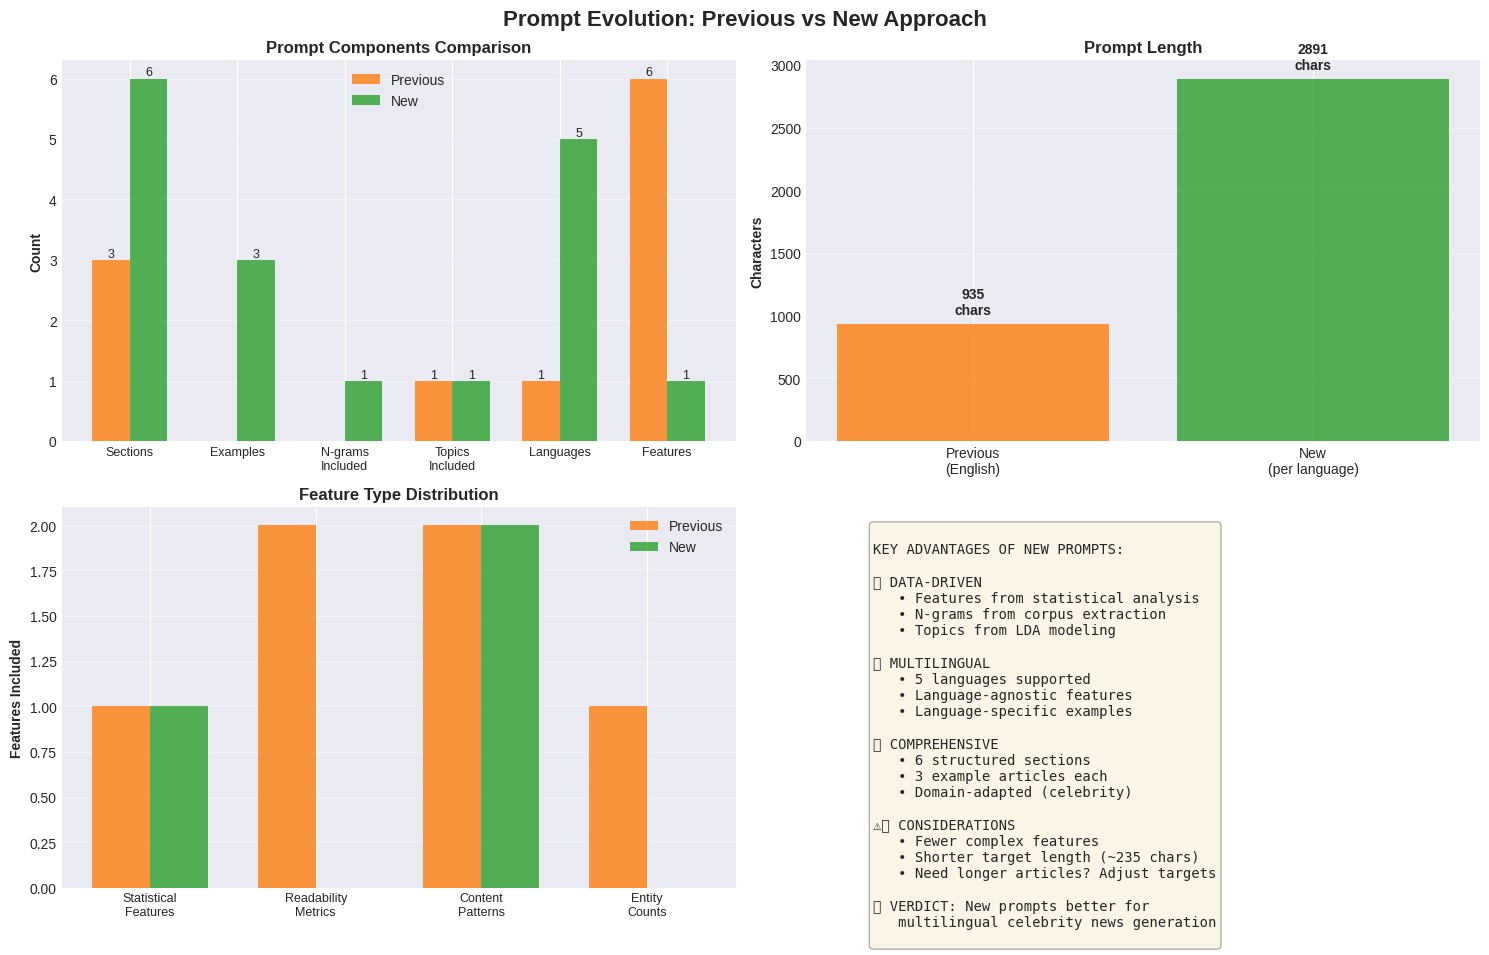


🎯 FINAL VERDICT

The NEW multilingual prompts are SUPERIOR for this task because:

1. **Scalability**: 5 languages vs 1
2. **Data Foundation**: Statistical analysis vs manual selection  
3. **Examples**: 3 real articles per language vs none
4. **Structure**: Clear 6-section format vs prose
5. **Domain Match**: Celebrity news vs political news

The PREVIOUS prompts had advantages in:
- More sophisticated features (readability, subjectivity)
- Longer article targets (better for full articles)
- Explicit stylistic guidance (interpretation vs facts)

💡 RECOMMENDATION: Use NEW prompts but consider adding:
   • Target word count (~400-500 words based on dataset)
   • Explicit "interpretive style" instruction
   • More guidance on tone and subjectivity if available

Ready to proceed with generation using the new prompts! ✅



In [71]:
# Visualize the comparison
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Prompt Evolution: Previous vs New Approach', fontsize=16, fontweight='bold')

# 1. Structure comparison
ax = axes[0, 0]
categories = ['Sections', 'Examples', 'N-grams\nIncluded', 'Topics\nIncluded', 'Languages', 'Features']
previous_vals = [3, 0, 0, 1, 1, 6]
new_vals = [6, 3, 1, 1, 5, 1]

x = np.arange(len(categories))
width = 0.35

bars1 = ax.bar(x - width/2, previous_vals, width, label='Previous', color='#ff7f0e', alpha=0.8)
bars2 = ax.bar(x + width/2, new_vals, width, label='New', color='#2ca02c', alpha=0.8)

ax.set_ylabel('Count', fontweight='bold')
ax.set_title('Prompt Components Comparison', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=0, ha='center', fontsize=9)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}',
                   ha='center', va='bottom', fontsize=9)

# 2. Prompt length comparison
ax = axes[0, 1]
approaches = ['Previous\n(English)', 'New\n(per language)']
lengths = [935, 2891]
colors = ['#ff7f0e', '#2ca02c']

bars = ax.bar(approaches, lengths, color=colors, alpha=0.8)
ax.set_ylabel('Characters', fontweight='bold')
ax.set_title('Prompt Length', fontweight='bold')
ax.grid(axis='y', alpha=0.3)

for i, (bar, length) in enumerate(zip(bars, lengths)):
    ax.text(bar.get_x() + bar.get_width()/2., length + 50,
           f'{length}\nchars',
           ha='center', va='bottom', fontsize=10, fontweight='bold')

# 3. Feature comparison breakdown
ax = axes[1, 0]
feature_types = ['Statistical\nFeatures', 'Readability\nMetrics', 'Content\nPatterns', 'Entity\nCounts']
previous_has = [1, 2, 2, 1]  # Commas, GunningFog+Subjectivity, Social media patterns, People/org counts
new_has = [1, 0, 2, 0]  # Exclamation ratio, none explicit, N-grams+Topics, not in prompts

x = np.arange(len(feature_types))
bars1 = ax.bar(x - width/2, previous_has, width, label='Previous', color='#ff7f0e', alpha=0.8)
bars2 = ax.bar(x + width/2, new_has, width, label='New', color='#2ca02c', alpha=0.8)

ax.set_ylabel('Features Included', fontweight='bold')
ax.set_title('Feature Type Distribution', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(feature_types, rotation=0, ha='center', fontsize=9)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# 4. Key advantages
ax = axes[1, 1]
ax.axis('off')

advantages_text = """
KEY ADVANTAGES OF NEW PROMPTS:

✅ DATA-DRIVEN
   • Features from statistical analysis
   • N-grams from corpus extraction
   • Topics from LDA modeling

✅ MULTILINGUAL
   • 5 languages supported
   • Language-agnostic features
   • Language-specific examples

✅ COMPREHENSIVE
   • 6 structured sections
   • 3 example articles each
   • Domain-adapted (celebrity)

⚠️ CONSIDERATIONS
   • Fewer complex features
   • Shorter target length (~235 chars)
   • Need longer articles? Adjust targets

📊 VERDICT: New prompts better for 
   multilingual celebrity news generation
"""

ax.text(0.1, 0.95, advantages_text, 
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()

# Save comparison
comparison_output = output_dir / 'prompt_comparison_analysis.png'
plt.savefig(comparison_output, dpi=300, bbox_inches='tight')
print(f"\n✅ Comparison visualization saved to: {comparison_output}")

plt.show()

print("\n" + "="*80)
print("🎯 FINAL VERDICT")
print("="*80)
print("""
The NEW multilingual prompts are SUPERIOR for this task because:

1. **Scalability**: 5 languages vs 1
2. **Data Foundation**: Statistical analysis vs manual selection  
3. **Examples**: 3 real articles per language vs none
4. **Structure**: Clear 6-section format vs prose
5. **Domain Match**: Celebrity news vs political news

The PREVIOUS prompts had advantages in:
- More sophisticated features (readability, subjectivity)
- Longer article targets (better for full articles)
- Explicit stylistic guidance (interpretation vs facts)

💡 RECOMMENDATION: Use NEW prompts but consider adding:
   • Target word count (~400-500 words based on dataset)
   • Explicit "interpretive style" instruction
   • More guidance on tone and subjectivity if available

Ready to proceed with generation using the new prompts! ✅
""")